In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('datasetFinancialNews/all-data.csv',encoding = "ISO-8859-1")
df.head()

,Sentiment,News Headline
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [2]:
df.describe()

,Sentiment,News Headline
count,4846,4846
unique,3,4838
top,neutral,The Group 's business is balanced by its broad...
freq,2879,2


In [24]:
df.isna().sum()

Sentiment        0
News Headline    0
dtype: int64

In [25]:
df['Sentiment'].value_counts()

neutral     2879
positive    1363
negative     604
Name: Sentiment, dtype: int64

In [26]:
# Defining our target value
y=df['Sentiment'].values
y.shape

(4846,)

In [27]:
# Defining our features (here we only have one i.e. News Headline)
x=df["News Headline"].values
x.shape

(4846,)

In [28]:
# Split the data into train and test sets(25 percent of overall data is in test set)
from sklearn.model_selection import train_test_split
(x_train,x_test,y_train,y_test)=train_test_split(x,y,test_size=0.25)
x_train.shape
y_train.shape
x_test.shape
y_test.shape

(1212,)

In [29]:
# Create train test dataframe 
df1 = pd.DataFrame(x_train)
df1 = df1.rename(columns={0:'news'})

In [30]:
df2=pd.DataFrame(y_train)
df2=df2.rename(columns={0:'sentiment'})
df_train=pd.concat([df1,df2],axis=1)

In [31]:
df_train.head()

,news,sentiment
0,Metso is a global supplier of sustainable tech...,neutral
1,Dopplr members share personal and business tra...,neutral
2,Net cash flow from operations is expected to r...,positive
3,Group EBIT for the first half was EUR13 .6 m U...,negative
4,"Operating profit , excluding non-recurring ite...",negative


In [32]:
# Create test set dataframe
df3=pd.DataFrame(x_test)
df3=df3.rename(columns={0:'news'})

In [33]:
df4=pd.DataFrame(y_test)
df4=df2.rename(columns={0:'sentiment'})
df_test=pd.concat([df3,df4],axis=1)

In [34]:
df_test.head()

,news,sentiment
0,ND = Not disclosed .,neutral
1,"The one dark spot on the horizon , however , w...",neutral
2,Nokia is requesting that the companies stop ma...,positive
3,Aspocomp intends to set up a plant to manufact...,negative
4,Olli-Pekka Laine has been appointed as the Cha...,negative


In [35]:
#removing punctuations
#library that contains punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [36]:
#defining the function to remove punctuation
def remove_punctuation(text):
  if(type(text)==float):
    return text
  ans=""  
  for i in text:     
    if i not in string.punctuation:
      ans+=i    
  return ans

In [37]:
#storing the puntuation free text in a new column called clean_msg
df_train['news']= df_train['news'].apply(lambda x:remove_punctuation(x))
df_test['news']= df_test['news'].apply(lambda x:remove_punctuation(x))

In [38]:
df_train.head()

,news,sentiment
0,Metso is a global supplier of sustainable tech...,neutral
1,Dopplr members share personal and business tra...,neutral
2,Net cash flow from operations is expected to r...,positive
3,Group EBIT for the first half was EUR13 6 m US...,negative
4,Operating profit excluding nonrecurring items...,negative


In [39]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
def generate_N_grams(text,ngram=1):
  words=[word for word in text.split(" ") if word not in set(stopwords.words('english'))]  
  print("Sentence after removing stopwords:",words)
  temp=zip(*[words[i:] for i in range(0,ngram)])
  ans=[' '.join(ngram) for ngram in temp]
  return ans

In [41]:
#unigram example text
generate_N_grams("The sun rises in the east",2)

Sentence after removing stopwords: ['The', 'sun', 'rises', 'east']


['The sun', 'sun rises', 'rises east']

In [42]:
from collections import defaultdict

In [43]:
positiveValues=defaultdict(int)
negativeValues=defaultdict(int)
neutralValues=defaultdict(int)

In [44]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].news:
  for word in generate_N_grams(text):
    positiveValues[word]+=1

Sentence after removing stopwords: ['Net', 'cash', 'flow', 'operations', 'expected', 'remain', 'positive', '']
Sentence after removing stopwords: ['', 'They', 'would', 'invest', 'physical', 'infrastructure', '', 'would', 'also', 'provide', 'knowhow', 'managing', 'developing', 'science', 'technology', 'parks', '', '', 'said', 'Sunrise', 'Valley', 'director', 'Andrius', 'Bagdonas', '']
Sentence after removing stopwords: ['', 'Overall', '', 'pleased', 'startup', 'curve', '', 'pleased', 'quality', 'paper', '', '', 'Stora', 'spokeswoman', 'Patricia', 'Dietz', 'said', 'Tuesday', '']
Sentence after removing stopwords: ['Both', 'net', 'sales', 'operating', 'profit', 'record', 'high', 'company', 'history', '']
Sentence after removing stopwords: ['Combining', 'deep', 'domain', 'expertise', 'Application', 'Service', 'Management', 'ASM', 'outsourcing', 'service', 'offerings', 'proved', 'winning', 'combination', '']
Sentence after removing stopwords: ['Finnish', 'KCI', 'Konecranes', 'awarded', 'ord

Sentence after removing stopwords: ['In', 'JanuarySeptember', '2009', '', 'Group', 'net', 'interest', 'income', 'increased', 'EUR', '1124', 'mn', 'EUR', '743', 'mn', 'JanuarySeptember', '2008', '']
Sentence after removing stopwords: ['', 'The', 'purchase', 'operations', 'part', 'YIT', 'strategy', 'expand', 'offering', 'building', 'system', 'services', 'geographically', '', '']
Sentence after removing stopwords: ['A', 'memorandum', 'understanding', 'cooperation', 'Finnish', 'Global', 'Chemical', 'Company', 'KEMIRA', 'Vietnam', 'National', 'Chemicals', 'Group', '', 'Vinachem', '', 'signed', 'occasion', '']
Sentence after removing stopwords: ['Cramo', 'Group', 'financial', 'targets', '20102013', 'sales', 'growth', 'higher', '10', 'percent', 'per', 'year', '', 'return', 'equity', '15', 'percent', '']
Sentence after removing stopwords: ['Mr', 'Kivimeister', 'said', 'John', 'Deer', 'former', 'Timberjack', 'stands', 'win', 'situation', '', 'controls', 'around', '60', '', 'Estonia', 'forest', 

Sentence after removing stopwords: ['It', 'therefore', 'seems', 'Finnish', 'shipping', 'company', 'Viking', 'Line', 'get', 'subsidy', 'needs', 'order', 'new', 'LNGfuelled', 'vessel', '']
Sentence after removing stopwords: ['Circulation', 'revenue', 'increased', '5', '', 'Finland', '4', '', 'Sweden', '2008', '']
Sentence after removing stopwords: ['SvyturysUtenos', 'Alus', '', 'controlled', 'Nordic', 'group', 'Baltic', 'Beverages', 'Holding', '', 'BBH', '', '', 'posted', '61', 'percent', 'growth', 'beer', 'sales', 'JanuarySeptember', '10199', 'million', 'liters', '']
Sentence after removing stopwords: ['The', 'Finnish', 'supplier', 'BSSOSS', 'VAS', 'telecom', 'operators', '', 'Tecnotree', '', 'received', 'expansion', 'orders', 'worth', 'total', 'US', '73', 'mn', 'convergent', 'charging', 'next', 'generation', 'messaging', 'solutions', 'Latin', 'America', '', 'company', 'announced', 'without', 'specifying', 'operators', 'placed', 'orders', '']
Sentence after removing stopwords: ['Thereby

Sentence after removing stopwords: ['This', 'new', 'representation', 'extends', 'Comptel', 'global', 'presence', 'total', '18', 'countries', '', 'serving', '250', 'customers', '80', 'countries', 'worldwide', '']
Sentence after removing stopwords: ['It', 'leading', 'private', 'road', 'ambulance', 'service', 'company', 'Finland', '']
Sentence after removing stopwords: ['Microsoft', 'also', 'churned', 'courtship', '', 'agreeing', 'use', 'Navteq', 'mapping', 'service', '', 'offered', 'company', 'Nokia', 'bought', '', '81', 'billion', 'years', 'ago', '']
Sentence after removing stopwords: ['It', 'focus', 'improving', 'profitability', 'next', 'year', 'streamlining', 'operations', '']
Sentence after removing stopwords: ['Satama', 'earned', 'Data', 'Management', 'Solutions', 'competency', 'Business', 'Intelligence', 'specialization', 'recentlyvia', 'acquisition', 'Fimentor', 'Oy', '']
Sentence after removing stopwords: ['Cost', 'cutting', 'measures', '', 'produced', 'around', 'EUR70m', 'saving

Sentence after removing stopwords: ['Operating', 'profit', 'improved', 'EUR', '203', 'mn', 'EUR', '114', 'mn', '']
Sentence after removing stopwords: ['MegaFon', 'subscriber', 'base', 'increased', '161', '', '2009', '505', 'million', 'users', 'December', '31', '', 'market', 'share', 'number', 'customers', 'amounted', '24', '', 'late', '2009', '', '23', '', 'late', '2008', '', 'according', 'TeliaSonera', 'estimates', '']
Sentence after removing stopwords: ['In', 'first', 'nine', 'months', '2010', '', 'company', 'net', 'loss', 'narrowed', 'EUR415', '000', 'EUR7', '4', 'corresponding', 'period', '2009', '']
Sentence after removing stopwords: ['At', 'time', 'I', 'delighted', 'fact', 'able', 'accomplish', 'organization', 'team', 'members', '']
Sentence after removing stopwords: ['In', 'JanuarySeptember', '2007', '', 'Finnlines', '', 'net', 'sales', 'rose', 'EUR', '5054', 'mn', 'EUR', '4735', 'mn', 'corresponding', 'period', '2006', '']
Sentence after removing stopwords: ['MANAVIGATORSeptemb

Sentence after removing stopwords: ['Uponor', 'made', 'operating', 'profit', 'EUR', '1510', 'mn', '', 'EUR', '1437', 'mn', '', 'made', '2007', 'record', 'year', '']
Sentence after removing stopwords: ['10', 'February', '2011', '', 'Finnish', 'media', 'company', 'Sanoma', 'Oyj', 'HEL', '', 'SAA1V', 'said', 'yesterday', '2010', 'net', 'profit', 'almost', 'tripled', 'EUR297', '3', 'EUR107', '1', '2009', 'announced', 'proposal', 'raised', 'payout', '']
Sentence after removing stopwords: ['The', 'fair', 'value', 'investment', 'properties', 'totalled', 'EUR', '22999', 'mn', '', 'compared', 'EUR', '22295', 'mn', 'corresponding', 'period', '2009', '']
Sentence after removing stopwords: ['Sales', 'Department', 'Store', 'Division', 'increased', '15', '', 'sales', 'clothing', 'store', 'subsidiary', 'Seppala', 'increased', '8', '', 'Meanwhile', 'sales', 'Hobby', 'Hall', 'decreased', '12', '', '']
Sentence after removing stopwords: ['Within', 'framework', 'partnership', '', 'Nokia', 'Siemens', 'Net

Sentence after removing stopwords: ['In', 'release', '', 'Company', 'said', 'Vocollect', 'T2', 'customers', 'North', 'America', 'take', 'advantage', 'Voice', 'Directed', 'Warehousing', 'solution', 'increase', 'warehouse', 'efficiency', 'productivity', 'gains', 'discounted', 'price', '']
Sentence after removing stopwords: ['Pretax', 'profit', 'rose', 'EUR', '1019', 'mn', 'EUR', '1007', 'corresponding', 'period', '2005', '']
Sentence after removing stopwords: ['Net', 'income', 'life', 'insurance', 'rose', 'EUR', '165', 'mn', 'EUR', '140', 'mn', '', 'net', 'income', 'nonlife', 'insurance', 'EUR', '226', 'mn', 'EUR', '152', 'mn', '2009', '']
Sentence after removing stopwords: ['Due', 'rapid', 'expansion', '', 'market', 'share', 'Tallink', 'terms', 'passenger', 'carriage', 'Tallinna', 'Sadam', 'Port', 'Tallinn', 'totaled', '55', 'percent', 'November', '457', 'percent', 'November', '2005', '']
Sentence after removing stopwords: ['Finnish', 'high', 'technology', 'provider', 'Vaahto', 'Group',

Sentence after removing stopwords: ['SysOpen', 'Digia', 'Plc', '', 'Press', 'release', '', '7', 'February', '2006', 'IBM', 'Finland', 'rewarded', 'distinguished', 'partner', 'companies', '2005', '']
Sentence after removing stopwords: ['Sales', 'Latin', 'America', 'increased', '42', '', 'EUR', '432mn', '', 'total', '87', 'mn', 'mobile', 'devices', 'sold', 'area', '', 'representing', 'increase', '32', '', 'corresponding', 'period', '2009', '']
Sentence after removing stopwords: ['Incap', 'Lankapaja', 'aim', 'enter', 'actual', 'agreement', 'transfer', 'sheetmetal', 'production', 'buyer', 'February', 'order', 'complete', 'transfer', '1', 'March', '2011', '']
Sentence after removing stopwords: ['Pioneer', 'Library', 'System', 'one', '127', 'libraries', '', 'municipalities', '', 'arts', '', 'culture', 'higher', 'education', 'science', 'organizations', 'awarded', 'grants', 'participate', 'The', 'Big', 'Read', '', 'largest', 'federal', 'reading', 'program', 'US', 'history', '']
Sentence after 

Sentence after removing stopwords: ['Outotec', 'said', 'new', 'orders', 'worth', '4929', 'mln', 'eur', 'quarter', '', 'compared', '2404', 'mln', 'eur', 'year', 'earlier', '']
Sentence after removing stopwords: ['However', '', 'broker', 'gave', '', 'outperform', '', 'recommendation', 'stock', '']
Sentence after removing stopwords: ['We', 'succeeded', 'increasing', 'market', 'share', 'sold', 'apartment', '', '', 'comments', 'Mr', 'Kari', 'Kauniskangas', '', 'Head', 'YIT', 'International', 'Construction', 'Services', '']
Sentence after removing stopwords: ['Significance', '', 'Teleste', 'emphasised', 'large', 'size', 'growing', 'economy', '', 'well', 'rapid', 'development', 'TV', 'services', 'distribution', 'industry', '', 'Poland', 'viewed', 'attractive', 'market', '']
Sentence after removing stopwords: ['HELSINKI', '', 'Thomson', 'Financial', '', '', 'Kone', 'said', 'four', 'orders', 'Saudi', 'Arabia', '', 'United', 'Arab', 'Emirates', 'Qatar', 'worth', '40', 'mln', 'eur', '']
Sentence 

Sentence after removing stopwords: ['The', 'agreement', 'strengthens', 'longterm', 'partnership', 'Nokia', 'Siemens', 'Networks', '']
Sentence after removing stopwords: ['Validating', 'fgVoIP', 'client', 'Symbian', 'Signed', 'represents', 'significant', 'step', 'forward', 'accomplishing', 'goal', '']
Sentence after removing stopwords: ['Both', 'operating', 'profit', 'net', 'sales', '12month', 'period', 'increased', '', 'respectively', 'EUR21', '5', 'EUR196', '1', '', 'compared', '2005', '']
Sentence after removing stopwords: ['The', 'two', 'companies', 'also', 'partner', 'developing', 'Raiso', 'cholesterol', 'lowering', 'brand', '', 'Benecol', '']
Sentence after removing stopwords: ['It', 'also', 'turned', 'earnings', 'per', 'share', '', 'EPS', '', 'EUR', '044', 'versus', 'loss', 'per', 'share', 'EUR', '226', '']
Sentence after removing stopwords: ['A', 'Helsinki', '', 'ELIiV', 'today', 'reported', 'EPS', 'EUR1', '13', '2009', '', 'increase', 'EPS', 'EUR1', '12', '2008', '']
Sentence a

Sentence after removing stopwords: ['Following', 'acquisition', '', 'Relacom', 'strengthen', 'presence', 'Finland', '', 'serving', 'operators', 'office', 'market', 'mobile', 'fixed', 'networks', 'construction', '', 'installation', 'maintenance', 'services', '']
Sentence after removing stopwords: ['', 'The', 'priority', '2009', 'strengthen', 'company', 'balance', 'sheet', 'increase', 'cash', 'flow', '', '', 'CEO', 'Hannu', 'Krook', 'said', '']
Sentence after removing stopwords: ['The', 'metal', 'gained', '41', 'percent', 'year', 'demand', 'China', '', 'world', 'largest', 'user', '', 'increased', '']
Sentence after removing stopwords: ['The', 'company', 'intends', 'raise', 'production', 'capacity', '2006', '']
Sentence after removing stopwords: ['', 'ADP', 'News', '', '', 'Oct', '29', '', '2008', '', 'Finnish', 'lifting', 'equipment', 'maker', 'Konecranes', 'Oyj', '', 'OMX', '', 'KCR1V', '', 'said', 'today', 'net', 'profit', 'rose', 'EUR', '1166', 'million', '', 'USD', '1491', '', 'first

Sentence after removing stopwords: ['According', 'ARehu', 'Managing', 'Director', '', 'Jouko', 'Lahtinen', '', 'project', 'stabilise', 'costs', 'improve', 'supply', 'security', '']
Sentence after removing stopwords: ['', 'Neste', 'Oil', 'responded', 'challenge', 'posed', 'European', 'Union', 'target', 'biofuels', 'accounting', '58', '', 'traffic', 'fuel', 'usage', 'EU', '2010', 'developing', 'NExBTL', 'technology', 'producing', 'diesel', 'fuel', 'renewables', '', '', 'federation', 'said', '']
Sentence after removing stopwords: ['The', 'company', 'recorded', 'revenues', 'E658', '1', 'million', 'fiscal', 'year', 'ended', 'December', '2007', '', 'increase', '23', '', '2006', '']
Sentence after removing stopwords: ['The', 'subdivision', 'made', 'sales', 'revenues', 'last', 'year', 'EUR', '4807', 'million', 'EUR', '4149', 'million', '2008', '', 'operating', 'profits', 'EUR', '445', 'million', 'EUR', '74', 'million', '']
Sentence after removing stopwords: ['Sanoma', 'Magazines', '', 'net', '

Sentence after removing stopwords: ['Finnish', 'Rautaruukki', 'awarded', 'contract', 'supply', 'install', 'steel', 'superstructures', 'Partihallsfï¿½rbindelsen', 'bridge', 'Gothenburg', 'Sweden']
Sentence after removing stopwords: ['Furthermore', '', 'Novator', 'Finland', 'Oy', 'entered', 'securities', 'lending', 'agreement', '', 'whereby', 'Novator', 'Finland', 'Oy', 'hold', 'directly', 'amount', 'shares', 'underlying', 'OMX', 'market', 'forwards', 'May', '23', 'May', '26', '', '2008', '']
Sentence after removing stopwords: ['HK', 'Ruokatalo', 'accounts', '50', '', 'poultry', 'sales', 'Finland', '', 'profitability', 'good', 'level', '']
Sentence after removing stopwords: ['The', 'new', 'agreement', '', 'expands', 'longestablished', 'cooperation', 'companies', '', 'involves', 'transfer', 'certain', 'engineering', 'documentation', 'functions', 'Larox', 'Etteplan', '']
Sentence after removing stopwords: ['Metsaliitto', 'said', 'book', 'minor', 'gain', 'less', 'EUR1', '0', 'transaction', 

Sentence after removing stopwords: ['8', 'May', '2009', '', 'Finnish', 'liquid', 'handling', 'products', 'diagnostic', 'test', 'systems', 'maker', 'Biohit', 'Oyj', '', 'HEL', '', 'BIOBV', '', 'said', 'today', '', '8', 'May', '2009', '', 'net', 'loss', 'narrowed', 'EUR0', '1', '', 'USD0', '14', '', 'first', 'quarter', '2009', 'EUR0', '4', 'period', '2008', '']
Sentence after removing stopwords: ['More', 'staff', 'recruited', 'Japan', 'complement', 'network', 'close', '50', 'service', 'locations', '20', 'countries', 'worldwide', '']
Sentence after removing stopwords: ['However', '', 'sales', 'volumes', 'food', 'industry', 'expected', 'remain', 'relatively', 'good', 'levels', 'Finland', 'Scandinavia', '', 'Atria', 'said', '']
Sentence after removing stopwords: ['Martela', 'said', 'plans', 'expand', 'recycled', 'furniture', 'business', 'elsewhere', 'Finland', '', '']
Sentence after removing stopwords: ['TELE2', 'Affarsvarlden', 'gave', '', 'buy', '', 'recommendation', 'mobile', 'operator',

Sentence after removing stopwords: ['The', 'company', 'reports', 'loss', 'period', 'EUR', '04', 'mn', 'compared', 'loss', 'EUR', '19', 'mn', 'corresponding', 'period', '2005', '']
Sentence after removing stopwords: ['Earnings', 'per', 'share', 'EPS', 'amounted', 'EUR0', '03', '', 'loss', 'EUR0', '08', '']
Sentence after removing stopwords: ['We', 'honored', 'recognized', 'Gartner', 'specialist', 'Business', 'Process', 'Modeling', 'Analysis', '', 'company', 'many', 'largest', 'software', 'vendors', 'world', '']
Sentence after removing stopwords: ['Net', 'sales', 'increased', 'EUR655m', 'April', 'June', '2010', 'EUR438m', 'year', 'earlier', '']
Sentence after removing stopwords: ['Recovery', 'evident', 'liquid', 'handling', 'business', '', 'particularly', 'areas', 'outside', 'Europe', 'primarily', 'North', 'America', 'Asia', '']
Sentence after removing stopwords: ['The', 'fair', 'value', 'company', 'investment', 'properties', 'grew', 'EUR', '2803', 'billion', 'end', 'March', '2009', 'EUR

Sentence after removing stopwords: ['Technopolis', 'St', 'Petersburg', 'government', 'signed', 'cooperation', 'memorandum', 'October', '2005', 'set', 'technopark', 'Neudorf', 'production', 'zone', 'village', 'Strelny', '', 'St', 'Petersburg', 'suburbs', '']
Sentence after removing stopwords: ['EBIT', 'margin', '14', '', '51', '', '']
Sentence after removing stopwords: ['A', 'purchase', 'agreement', '7200', 'tons', 'gasoline', 'delivery', 'Hamina', 'terminal', '', 'Finland', '', 'signed', 'Neste', 'Oil', 'OYj', 'average', 'Platts', 'index', 'September', 'plus', 'eight', 'US', 'dollars', 'per', 'month', '']
Sentence after removing stopwords: ['', 'This', 'vessel', 'order', 'help', 'Aspo', 'secure', 'longterm', 'competitiveness', 'fleet', '', 'terms', 'technology', 'pricing', '']
Sentence after removing stopwords: ['HELSINKI', '', 'Finland', '', 'Sept', '18', '', '2009', '', 'GLOBE', 'NEWSWIRE', '', '', 'Ixonos', 'Plc', 'expands', 'company', 'smartphone', 'RD', 'services', 'establishes', 

Sentence after removing stopwords: ['MADISON', '', 'Wis', '', 'Feb', '6', '', 'PRNewswire', '', '', 'Fiskars', 'announces', 'United', 'States', 'Patent', 'Trademark', 'Office', 'granted', 'trademark', 'registration', 'color', 'orange', 'iconic', 'scissor', 'handles', '']
Sentence after removing stopwords: ['The', 'company', 'still', 'expects', 'turnover', '2010', 'slightly', 'increase', 'level', '2009', '', 'adding', '', 'market', 'predictability', 'still', 'poor', 'trustworthy', 'forecasts', 'market', 'development', 'contract', 'manufacturing', 'business', 'current', 'year', '', '']
Sentence after removing stopwords: ['Finnish', 'Cargotec', 'Kalmar', 'received', 'significant', 'order', 'US', 'Department', 'Defense', '']
Sentence after removing stopwords: ['The', 'company', 'said', 'paper', 'demand', 'increased', 'main', 'markets', '', 'including', 'publication', 'papers', '', 'increased', 'average', 'paper', 'prices', '4', 'percent', 'compared', 'last', 'year', '']
Sentence after remo

Sentence after removing stopwords: ['', 'The', 'trend', 'sports', 'leisure', 'markets', 'favorable', 'first', 'months', 'year', '']
Sentence after removing stopwords: ['The', 'subscriptions', 'increase', 'Cargotec', 'share', 'capital', 'EUR', '27060', '']
Sentence after removing stopwords: ['The', 'company', '', 'makes', 'garden', 'tools', '', 'scissors', 'consumer', 'goods', '', 'said', 'earnings', 'boosted', '69', 'mln', 'eur', 'income', 'received', '167', 'pct', 'shareholding', 'Finnish', 'engineering', 'group', 'Wartsila', '']
Sentence after removing stopwords: ['Excluding', 'nonrecurring', 'items', '', 'pretax', 'profit', 'surged', '45', '', 'EUR80m', '']
Sentence after removing stopwords: ['The', 'stock', 'price', 'rose', '700', 'ores', '09', '', 'close', 'SEK77', '65', '', 'ending', 'twoday', 'streak', 'losses', '']
Sentence after removing stopwords: ['Upon', 'completion', '', 'Keskuskatu', 'form', 'backbone', 'Helsinki', 'pedestrianised', 'downtown', 'area', '', 'linking', 'cit

Sentence after removing stopwords: ['The', 'shopping', 'center', 'opened', 'St', 'Petersburg', '', 'Russia', 'November', '2010', 'turn', 'cash', 'flow', 'Finnish', 'department', 'store', 'chain', 'Stockmann', 'Russian', 'operations', 'positive', 'first', 'time', '2011', '']
Sentence after removing stopwords: ['We', 'pleased', 'fine', 'cooperation', 'two', 'countries', 'recent', 'times', '', 'said', '']
Sentence after removing stopwords: ['Operating', 'profit', 'totaled', 'EUR', '825mn', '', 'EUR', '763mn', '2004', '']
Sentence after removing stopwords: ['Sales', 'improved', 'SEK', '1553', 'mn', '', 'compared', 'SEK', '1408', 'mn', '']
Sentence after removing stopwords: ['Nordea', 'sees', 'return', 'positive', 'growth', 'Baltic', 'countries', '2011', '']
Sentence after removing stopwords: ['Panostaja', 'Oyj', '', 'Panostaja', '', 'Board', 'Directors', 'decided', '16', 'December', '2010', 'new', 'longterm', 'incentive', 'commitment', 'plan', 'members', 'management', 'team', '']
Sentence 

Sentence after removing stopwords: ['21', 'October', '2010', '', 'Finnish', 'fishing', 'tackle', 'company', 'Rapala', 'VMC', 'Corp', '', 'HEL', '', 'RAP1V', '', 'said', 'today', 'net', 'profit', 'rose', 'EUR18', '9', 'first', 'nine', 'months', '2010', 'EUR15', '1', 'period', 'year', 'earlier', '']
Sentence after removing stopwords: ['Demand', 'brisk', 'expected', 'order', 'levels', 'remained', 'high', '']
Sentence after removing stopwords: ['Meanwhile', '', 'Nokia', 'said', 'able', 'deliver', 'complete', 'range', 'services', 'deployment', 'operations', 'consulting', 'integration', 'managed', 'services', 'result', 'buyout', '']
Sentence after removing stopwords: ['Juha', 'Jordan', '', 'chief', 'engineer', 'Glaston', '', 'said', 'one', 'reasons', 'choosing', 'Vacon', 'global', 'AC', 'drives', 'supplier', 'service', 'support', 'centres', 'countries', 'Glaston', 'operates', '']
Sentence after removing stopwords: ['Via', 'move', '', 'company', 'aims', 'annual', 'savings', 'EUR', '3', 'milli

Sentence after removing stopwords: ['Wartsila', 'contract', 'October', '2007', 'plant', 'installed', 'Manturovo', 'Kostroma', 'region', 'Russia', '', '600', 'km', 'northeast', 'Moscow', '', 'Russia', '']
Sentence after removing stopwords: ['The', '5050', 'joint', 'venture', '', 'called', 'Nokia', 'Siemens', 'Networks', '', 'comprised', 'Nokia', 'network', 'business', 'group', 'Siemens', '', 'carrierrelated', 'operations', '', 'creating', 'estimated', 'synergies', '15', 'billion', 'euros', '', '', '19', 'billion', '', '2010', '', 'Nokia', 'said', '']
Sentence after removing stopwords: ['Combining', 'two', 'producers', 'create', 'strong', 'EUbased', 'fertilizer', 'industry', 'capable', 'meeting', 'global', 'competition', '', 'added', '']
Sentence after removing stopwords: ['3', 'February', '2011', '', 'Finnish', 'broadband', 'data', 'communication', 'systems', 'provider', 'Teleste', 'Oyj', 'HEL', '', 'TLT1V', 'said', 'yesterday', 'net', 'profit', 'rocketed', 'EUR4', '8', '2010', 'EUR416'

In [45]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].news:
  for word in generate_N_grams(text):
    negativeValues[word]+=1

Sentence after removing stopwords: ['Group', 'EBIT', 'first', 'half', 'EUR13', '6', 'US', '178', '', 'falling', 'short', 'EUR22', '5', 'posted', 'period', '2009', '']
Sentence after removing stopwords: ['Operating', 'profit', '', 'excluding', 'nonrecurring', 'items', '', 'totalled', 'EUR', '10', 'mn', '', 'EUR', '16', 'mn', '']
Sentence after removing stopwords: ['In', 'addition', '', '29', 'employees', 'laid', 'notice', 'whole', 'workforce', 'laid', 'short', 'periods', 'needed', '']
Sentence after removing stopwords: ['Compared', 'FTSE', '100', 'index', '', 'rose', '367', 'points', '', '06', '', '', 'day', '', 'relative', 'price', 'change', '02', '', '']
Sentence after removing stopwords: ['A', 'survey', 'conducted', 'Taloustutkimus', 'Sampo', 'Life', 'shows', 'companies', 'badly', 'prepared', 'losing', 'key', 'staff', 'members', '']
Sentence after removing stopwords: ['Cencorp', 'net', 'sales', 'first', 'quarter', 'estimated', 'EUR091', '2', '', 'compared', 'EUR4', '5', 'first', 'qua

Sentence after removing stopwords: ['Operating', 'profit', 'continuing', 'operations', 'fell', 'EUR', '483', 'mn', 'EUR', '724', 'mn', 'first', 'half', '2007', '']
Sentence after removing stopwords: ['In', 'JulySeptember', '2009', '', 'Konecranes', '', 'sales', 'decreased', 'EUR', '3687', 'mn', 'EUR', '5204', 'mn', 'JulySeptember', '2008', '']
Sentence after removing stopwords: ['The', 'number', 'bodily', 'injury', 'cases', 'quadrupled', '20002006', '']
Sentence after removing stopwords: ['Scanfil', '', 'systems', 'supplier', 'contract', 'manufacturer', 'communications', 'sector', '', 'start', 'personnel', 'negotiations', 'Oulu', '', 'Finland', '', 'lay', 'staff', 'temporarily', '']
Sentence after removing stopwords: ['A', 'total', '140', 'jobs', 'reduced', 'Raahe', 'Steel', 'Works', '']
Sentence after removing stopwords: ['notified', 'result', 'Company', 'issuing', '14432000', 'new', 'shares', 'directed', 'offering', '', 'joint', 'holdings', 'Pequot', 'decreased', '110', '963', '', 't

Sentence after removing stopwords: ['However', '', 'company', 'saw', 'net', 'profit', 'third', 'quarter', 'EUR', '14', 'million', 'EUR', '15', 'million', 'corresponding', 'period', '2009', '']
Sentence after removing stopwords: ['Finnish', 'IT', 'solutions', 'provider', 'Affecto', 'Oyj', 'HEL', '', 'AFE1V', 'said', 'today', 'slipped', 'net', 'loss', 'EUR', '115000', 'USD', '152000', 'second', 'quarter', '2010', 'profit', 'EUR', '845000', 'corresponding', 'period', 'year', 'earlier', '']
Sentence after removing stopwords: ['The', 'Finnish', 'daily', 'Kauppalehti', 'surmises', 'Finnish', 'supplier', 'Rautaruukki', 'raised', 'prices', 'Aker', 'comfort', 'zone', '']
Sentence after removing stopwords: ['Operating', 'loss', 'totaled', 'EUR', '08', 'mn', '', 'compared', 'profit', 'EUR', '05', 'mn', '']
Sentence after removing stopwords: ['Orion', 'net', 'profit', 'third', 'quarter', '2007', 'decreased', '365', 'mln', 'euro', '', '', '521', 'mln', '', '403', 'mln', 'euro', '', '', '575', 'mln'

Sentence after removing stopwords: ['JP', 'Morgan', 'expects', 'Scala', 'lower', 'Nobel', 'Biocare', 'growth', 'forecast', '2007', 'current', 'guidance', '2325', 'pct', '', 'well', 'operating', 'margin', 'target', 'current', '3435', 'pct', '']
Sentence after removing stopwords: ['', 'ADP', 'News', '', '', 'Feb', '4', '', '2009', '', 'Finnish', 'broadband', 'data', 'communication', 'systems', 'solutions', 'company', 'Teleste', 'Oyj', '', 'HEL', '', 'TLT1V', '', 'said', 'today', 'net', 'profit', 'decreased', 'EUR', '55', 'million', '', 'USD', '72', '', '2008', 'EUR', '94', 'million', '200']
Sentence after removing stopwords: ['It', 'disappointment', 'see', 'plan', 'folded', '']
Sentence after removing stopwords: ['In', 'Q1', '2009', '', 'company', 'result', 'taxes', 'continuing', 'operations', '', 'excluding', 'nonrecurring', 'items', '', 'totalled', 'EUR', '04', 'mn', '', 'compared', 'EUR', '01', 'mn', 'corresponding', 'period', '2008', '']
Sentence after removing stopwords: ['More', 't

Sentence after removing stopwords: ['ADPnews', '', 'Sep', '28', '', '2009', '', 'Finnish', 'silicon', 'wafers', 'maker', 'Okmetic', 'Oyj', 'HEL', '', 'OKM1V', 'said', 'reduce', 'number', 'clerical', 'workers', '22', 'worldwide', 'result', 'personnel', 'negotiations', 'completed', 'today', '']
Sentence after removing stopwords: ['As', 'result', '', 'company', 'temporarily', 'layoff', '25', '', 'whole', 'personnel', '', 'approximately', '270', 'persons', 'Kirkkonummi', 'Nivala', 'factories', '']
Sentence after removing stopwords: ['Operating', 'profit', 'decreased', 'EUR', '112', 'mn', 'EUR', '166', 'mn', '']
Sentence after removing stopwords: ['The', 'measures', 'result', 'weak', 'demand', 'shipbuilding', 'industry', '']
Sentence after removing stopwords: ['Making', 'matters', 'difficult', '', 'company', 'said', 'grappling', 'higher', 'oil', 'gas', 'prices', '', 'pushed', 'cost', 'energy', '', 'raw', 'materials', 'transportation', '']
Sentence after removing stopwords: ['Finnish', 'powe

Sentence after removing stopwords: ['Asian', 'traffic', 'declined', '34', 'per', 'cent', '']
Sentence after removing stopwords: ['Production', 'levels', 'agreed', 'producers', 'long', 'time', 'ago', '', 'fall', 'consumption', 'lead', 'losses', '']
Sentence after removing stopwords: ['In', 'Finland', '', 'city', 'Forssa', 'said', 'pay', 'compensation', 'food', 'industry', 'companies', 'HK', 'Ruokatalo', 'Atria', 'lye', 'leak', 'tap', 'water', 'occurred', 'March', '2008', '']
Sentence after removing stopwords: ['As', 'result', 'negotiations', 'company', 'decided', 'make', '45', 'people', 'redundant', 'financial', 'production', 'grounds', '']
Sentence after removing stopwords: ['Operating', 'profit', 'excluding', 'nonrecurring', 'items', 'amounted', 'EUR', '406', 'mn', '', 'EUR', '573', 'mn', 'yearonyear', '']
Sentence after removing stopwords: ['The', 'company', 'said', 'fall', 'turnover', 'planned', '']
Sentence after removing stopwords: ['Scanfil', '', 'systems', 'supplier', 'contract'

Sentence after removing stopwords: ['Operating', 'profit', 'fell', 'EUR', '203', 'mn', 'EUR', '742', 'mn', 'second', 'quarter', '2008', '']
Sentence after removing stopwords: ['ADPnews', '', 'Jul', '17', '', '2009', '', 'Finlandbased', 'steel', 'maker', 'Rautaruukki', 'Oyj', 'Ruukki', 'HEL', '', 'RTRKS', 'said', 'today', 'slipped', 'net', 'loss', 'EUR', '184', 'million', 'USD', '2597', 'first', 'half', '2009', 'net', 'profit', 'EUR', '2']
Sentence after removing stopwords: ['Jan', '6', '', 'Ford', 'struggling', 'face', 'slowing', 'truck', 'SUV', 'sales', 'surfeit', 'uptodate', '', 'gottahave', 'cars', '']
Sentence after removing stopwords: ['', 'However', '', 'rapidly', 'increasing', 'costs', 'strengthening', 'euro', 'challenging', 'whole', 'industry', '', 'impacted', 'results', '', '']
Sentence after removing stopwords: ['All', 'ferries', 'run', 'trouble', 'outside', 'Stockholm', 'archipelago', '', 'made', '20000', 'islands', '']
Sentence after removing stopwords: ['The', 'liquidity',

Sentence after removing stopwords: ['Sales', 'Tiimari', 'business', 'went', '8', '', 'EUR', '118', 'million', '', 'Gallerix', 'stores', 'saw', '29', '', 'growth', 'EUR', '2', 'million', '']
Sentence after removing stopwords: ['Qualcomm', 'estimated', 'firstquarter', 'profit', '46', '50', 'cents', 'share', '', 'excluding', 'certain', 'items', '', 'analyst', 'estimate', '61', 'cents', 'share', '']
Sentence after removing stopwords: ['Samsung', 'currently', 'occupies', 'third', 'place', 'lost', 'ground', 'quarter', '', 'dropping', '18', '', '111', '', 'share', 'overall', '']
Sentence after removing stopwords: ['According', 'Latvian', 'business', 'register', '', 'Uponor', 'Latvia', 'closed', 'red', 'LVL', '99000', 'EUR', '13953817', 'USD', '19455648', 'turnover', 'LVL', '2346', 'mn', '2009', '']
Sentence after removing stopwords: ['Nokia', 'certainly', 'disagree', 'Qualcomm', 'views', 'patent', 'situation', '']
Sentence after removing stopwords: ['The', 'production', 'liquidated', 'June', 

Sentence after removing stopwords: ['Profit', 'taxes', 'EUR', '40', 'mn', '', 'EUR', '49', 'mn', '']
Sentence after removing stopwords: ['Operating', 'profit', 'totalled', 'EUR', '90', 'mn', '', 'EUR', '97', 'mn', 'first', 'half', '2008', '']
Sentence after removing stopwords: ['The', 'offer', '', 'deemed', 'low', 'Finnlines', '', 'board', '', 'stands', '4', 'pm', 'tomorrow', '']
Sentence after removing stopwords: ['The', 'real', 'estate', 'company', 'posted', 'net', 'loss', 'ï¿½', '', 'x201a', 'ï¿½', '593', 'million', 'ï¿½', '', 'x201a', 'ï¿½', '021', 'per', 'share', 'compared', 'net', 'profit', 'ï¿½', '', 'x201a', 'ï¿½', '31', 'million', 'ï¿½', '', 'x201a', 'ï¿½', '011', 'per', 'share', 'corresponding', 'q']
Sentence after removing stopwords: ['Tornio', 'Works', 'employs', '2300', '1800', 'scope', 'fixedperiod', 'parttime', 'temporary', 'layoffs', 'AprilOctober', 'period', '']
Sentence after removing stopwords: ['Finnish', 'plumbing', 'heating', 'systems', 'supplier', 'Uponor', 'net'

In [46]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].news:
  for word in generate_N_grams(text):
    neutralValues[word]+=1

Sentence after removing stopwords: ['Metso', 'global', 'supplier', 'sustainable', 'technology', 'services', 'mining', '', 'construction', '', 'power', 'generation', '', 'automation', '', 'recycling', 'pulp', 'paper', 'industries', '']
Sentence after removing stopwords: ['Dopplr', 'members', 'share', 'personal', 'business', 'travel', 'plans', 'privately', 'networks', '', 'highlight', 'interesting', 'places', 'stay', '', 'eat', 'explore', 'cities', 'around', 'world', '']
Sentence after removing stopwords: ['ALEXANDRIA', '', 'Va', '', 'July', '11', '', 'Hannu', 'Kahonen', 'Juuka', '', 'Finland', '', 'developed', 'ornamental', 'design', 'handle', 'fire', 'pit', 'door', '', 'US', 'Patent', '', 'Trademark', 'Office', 'announced', '']
Sentence after removing stopwords: ['According', 'product', 'manager', 'Lassi', 'Hietanen', '', 'building', 'power', 'plant', 'burns', 'mixed', 'waste', 'Helsinki', 'may', 'good', 'idea', 'reduces', 'production', 'combined', 'power', 'plants', 'using', 'natural'

Sentence after removing stopwords: ['TietoEnator', 'signed', 'agreement', 'acquire', 'Indian', 'research', 'development', '', 'RD', '', 'services', 'provider', 'turnkey', 'software', 'solutions', 'developer', 'Fortuna', 'Technologies', 'Pvt', 'Ltd', '21', 'mln', 'euro', '', '', '303', 'mln', '', 'September', '2007', '']
Sentence after removing stopwords: ['More', '80', 'special', 'events', 'three', 'counties', 'four', 'months', 'hosted', 'library', 'system', 'nine', 'branch', 'libraries', '']
Sentence after removing stopwords: ['It', '30', 'offices', 'worldwide', '90', 'pct', 'net', 'sales', 'generated', 'outside', 'Finland', '']
Sentence after removing stopwords: ['Tekla', 'Group', 'net', 'sales', '2006', 'approximately', '50', 'million', 'euros', 'operating', 'result', '136', 'million', 'euros', '']
Sentence after removing stopwords: ['Being', 'successful', 'requires', 'providing', 'level', 'quality', 'satisfies', 'customers', 'partners', '']
Sentence after removing stopwords: ['ALEX

Sentence after removing stopwords: ['', 'After', 'transaction', '', 'Tikkurila', 'powder', 'coatingsrelated', 'operations', '', '', 'company', 'said', '']
Sentence after removing stopwords: ['Incap', 'Corporation', 'Stock', 'Exchange', 'Announcement', '29', 'April', '2010', '1', 'pm', 'INVITATION', 'TO', 'A', 'NEWS', 'CONFERENCE', 'ON', 'INCAP', 'S', 'INTERIM', 'REPORT', 'Q12010', 'Incap', 'publish', 'interim', 'report', 'JanuaryMarch', '2010', 'Wednesday', '', '5', 'May', '2010', '']
Sentence after removing stopwords: ['It', 'first', 'oil', 'company', 'join', 'RSPO', 'commits', 'fully', 'sustainable', 'sourcing', 'feedstocks', 'production', 'NExBTL', 'biodiesel', '', 'said', '']
Sentence after removing stopwords: ['The', 'platform', 'would', 'continue', 'development', 'framework', 'Symbian', 'MeeGo', '']
Sentence after removing stopwords: ['The', 'smaller', 'molecules', 'improve', 'grip', 'tyre', 'topspeed', 'driving', '']
Sentence after removing stopwords: ['The', 'transaction', '', 

Sentence after removing stopwords: ['According', 'shipping', 'company', 'Viking', 'Line', '', 'EU', 'decision', 'significant', 'financial', 'impact', '']
Sentence after removing stopwords: ['As', 'July', '2', '', '2007', '', 'market', 'cap', 'segments', 'updated', 'according', 'average', 'price', 'May', '2007', '']
Sentence after removing stopwords: ['A', 'merger', 'UPM', 'FinnishSwedish', 'Stora', 'Enso', 'likely', 'either', '']
Sentence after removing stopwords: ['Status', '', 'Agreed']
Sentence after removing stopwords: ['Swedish', 'telco', 'TeliaSonera', 'teaming', 'Friends', '', 'Swedish', 'organization', 'bullying', '', 'fight', 'bullying', 'children', 'teenagers', 'via', 'electronic', 'channels', '']
Sentence after removing stopwords: ['Elsewhere', '', 'tendency', 'towards', 'developed', 'packaging', '']
Sentence after removing stopwords: ['The', 'significant', 'challengers', 'market', 'Logset', 'SampoRosenlew', '']
Sentence after removing stopwords: ['Even', '', 'Tulikivi', 'em

Sentence after removing stopwords: ['Teollisuuden', 'Voima', 'Oyj', '', 'Finnish', 'utility', 'known', 'TVO', '', 'said', 'shortlisted', 'Mitsubishi', 'Heavy', 'EUAPWR', 'model', 'along', 'reactors', 'Areva', '', 'Toshiba', 'Corp', '', 'GE', 'Hitachi', 'Nuclear', 'Energy', 'Korea', 'Hydro', '', 'Nuclear', 'Power', 'Co', '']
Sentence after removing stopwords: ['Nokia', 'said', 'still', 'expects', 'sell', '150', 'million', 'Symbian', 'devices', 'years', 'come', '', 'giving', 'indication', 'expects', 'Phone', '7', 'handoff', 'work', '']
Sentence after removing stopwords: ['In', 'Finland', '', 'Alma', 'Media', 'focus', 'quality', 'developing', 'chain', 'operations', '']
Sentence after removing stopwords: ['The', 'company', 'build', 'altogether', '130', 'new', 'substations', 'end', 'year', '']
Sentence after removing stopwords: ['Teleste', '30', 'offices', 'worldwide', 'listed', 'Nordic', 'Exchange', 'Helsinki', '']
Sentence after removing stopwords: ['The', 'StoneGate', 'product', 'family'

Sentence after removing stopwords: ['Due', 'Pirkka', 'beer', '', 'Olvi', 'brewery', 'Iisalmi', 'moving', '7day', '', '24hour', 'work', 'shifts', '']
Sentence after removing stopwords: ['', 'Of', 'course', '', 'talks', 'coming', 'new', 'projects', 'involve', 'material', 'handling', '', '', 'Konecranes', 'President', 'CEO', 'Pekka', 'Lundmark', 'said', '', 'asked', 'whether', 'talking', 'Reliance', 'Industries', 'supplying', 'equipment', 'upcoming', 'refinery', 'Jamnagar', '']
Sentence after removing stopwords: ['In', 'sinter', 'plant', '', 'limestone', 'coke', 'breeze', 'mixed', 'iron', 'ore', 'concentrate', 'sintered', 'lump', 'form', 'sinter', 'use', 'blast', 'furnaces', 'raw', 'material', 'ironmaking', '']
Sentence after removing stopwords: ['The', 'company', 'expects', 'net', 'sales', '65', 'mln', 'euro', '', '', '851', 'mln', '', '2006', '']
Sentence after removing stopwords: ['On', 'basis', 'competitive', 'bidding', 'OOO', 'Kitai', 'Stroi', '', 'Russian', 'subsidiary', 'China', 'S

Sentence after removing stopwords: ['The', 'company', 'plant', 'Russia', 'continue', 'make', 'tyres', 'near', 'markets', '', 'plant', 'Nokia', 'Finland', 'manufacture', 'tyres', 'markets', '']
Sentence after removing stopwords: ['A', 'replay', 'available', '27', 'October', '2006', 'following', 'numbers', '', 'US', 'callers', '', '1', '617ï¿½801ï¿½6888', '', 'nonUS', 'callers', '', '44', '20', '7365', '8427', '', 'access', 'code', '', '2659', '54']
Sentence after removing stopwords: ['LONDON', '', 'AFX', '', '', 'Intertek', 'Group', 'PLC', '', 'testing', 'inspection', 'company', '', 'said', 'commercial', 'electrical', 'division', 'bought', 'Finlandbased', 'company', 'Natlabs', 'Oy', 'Etteplan', 'Oyj', '13', 'mln', 'eur', 'cash', '']
Sentence after removing stopwords: ['City', 'CU', 'Welcomes', 'DART', 'Members', 'DALLASCity', 'CU', 'welcomes', 'members', 'DART', 'FCU', 'merge', 'City', 'CU', '']
Sentence after removing stopwords: ['Neste', 'Oil', 'extended', 'yesterday', 'gains', 'put',

Sentence after removing stopwords: ['The', 'construction', 'project', 'scheduled', 'start', 'second', 'quarter', '2009', 'new', 'building', 'scheduled', 'place', 'end', '2010', '']
Sentence after removing stopwords: ['The', 'authorization', 'force', 'period', '18', 'months', 'resolution', 'General', 'Meeting', '']
Sentence after removing stopwords: ['A', 'maximum', '20', 'employees', '', 'work', 'Karttakeskus', 'responsible', 'producing', 'Geographic', 'Information', 'Services', '', 'affected', '', 'company', 'added', '']
Sentence after removing stopwords: ['The', 'sellers', 'EOSS', 'Innovationsmanagement', 'group', 'private', 'individuals', '']
Sentence after removing stopwords: ['Panostaja', 'Oyj', 'Board', 'also', 'decided', 'organisational', 'meeting', 'held', 'upon', 'completion', 'AGM', 'implement', 'AGM', 'decision', 'concerning', 'Board', 'member', 'fees', 'paid', 'shares', 'way', 'shares', 'transferred', 'quarterly', 'basis', 'date', 'following', 'publication', 'quarterlyannua

Sentence after removing stopwords: ['According', 'Tyrvï¿½inen', 'estimation', '', 'Japan', 'essential', 'location', 'terms', 'Finnair', 'Asian', 'strategy']
Sentence after removing stopwords: ['Finnish', 'Civil', 'Aviation', 'Administration', 'decided', 'temporarily', 'reopen', 'Finnish', 'capital', 'Helsinki', 'airport', 'since', '3', 'pm', '11', 'pm', 'Monday', 'local', 'time', '']
Sentence after removing stopwords: ['UPMKymmene', 'wwwupmkymmenecom', 'produces', 'magazine', 'papers', 'newsprint', '', 'well', 'fine', 'specialty', 'papers', '', 'converting', 'materials', 'wood', 'products', '']
Sentence after removing stopwords: ['Lï¿½nnen', 'Tehtaat', 'Food', 'Division', 'reorganised', 'two', 'strategic', 'business', 'units', '', 'Apetit', 'Frozen', 'Foods', 'Jams', '', 'Apetit', 'Fish']
Sentence after removing stopwords: ['Under', 'changes', 'envisaged', '', 'HK', 'Ruokatalo', 'would', 'reduce', 'number', 'industrial', 'places', 'business', 'Finland', 'eight', 'six', '']
Sentence aft

Sentence after removing stopwords: ['Operating', 'profit', 'sixmonth', 'period', 'decreased', 'EUR111', '9', '', 'sales', 'increased', 'EUR1', '275', '', 'compared', 'corresponding', 'period', '2006', '']
Sentence after removing stopwords: ['The', 'total', 'value', 'contract', 'EUR', '8', 'million', '']
Sentence after removing stopwords: ['Private', 'equity', 'investor', 'CapMan', '', 'owner', 'Finnish', 'Lumene', 'cosmetics', 'company', '', 'planning', 'list', 'Lumene', '']
Sentence after removing stopwords: ['', 'It', 'testament', 'quality', 'LTE', 'solution', 'commitment', 'Japanese', 'market', '', '', 'added', '']
Sentence after removing stopwords: ['Boomerang', 'Boats', 'net', 'sales', 'EUR', '41', 'mn', 'made', 'operating', 'profit', 'EUR', '04', 'mn', '2006', '']
Sentence after removing stopwords: ['Member', 'HK', 'Ruokatalo', 'Group', 'Finland', '', 'Scan', '', 'launching', 'joint', 'venture', 'slaughterhouse', 'Team', 'Ugglarp', 'Skne', '', 'southern', 'Sweden', '']
Sentence a

Sentence after removing stopwords: ['In', 'way', '', 'industry', 'starting', 'point', 'consumers', '', 'needs', '']
Sentence after removing stopwords: ['LONDON', 'AFX', '', 'Fortum', 'said', 'agreed', 'sell', 'industrial', 'maintenance', 'service', 'operations', 'funds', 'managed', 'CapMan', 'undisclosed', 'sum', '']
Sentence after removing stopwords: ['Under', 'Finnish', 'law', '', 'Parliament', 'grants', 'licences', 'build', 'nuclear', 'power', 'plants', '']
Sentence after removing stopwords: ['Outotec', 'delivery', 'covers', 'engineering', '', 'supply', 'construction', 'circulating', 'fluid', 'bed', 'calcination', 'plant', 'capacity', '1600', 'tons', 'alumina', 'per', 'day', '']
Sentence after removing stopwords: ['The', 'Group', 'consolidated', 'net', 'sales', '2009', 'totaled', '15', 'billion', 'euros', 'employs', 'approximately', '10000', 'persons', '']
Sentence after removing stopwords: ['The', 'vessels', 'largest', 'fastest', 'ropax', 'vessels', 'world', 'built', 'Fincantieri',

Sentence after removing stopwords: ['Finnish', 'energy', 'company', 'Fortum', 'set', 'new', 'stricter', 'target', 'limits', 'shortterm', 'carbon', 'dioxide', 'emissions', 'heat', 'electricity', 'production', '']
Sentence after removing stopwords: ['The', 'Division', 'also', 'includes', 'joint', 'sales', '', 'marketing', 'controlling', 'functions', 'units', '']
Sentence after removing stopwords: ['The', 'selling', 'consortium', 'includes', 'funds', 'managed', 'OKO', 'Bank', 'venture', 'capital', 'unit', '', 'Bio', 'Fund', 'Management', 'Finnish', 'Industry', 'Investment', '', 'governmentowned', 'investment', 'group', '']
Sentence after removing stopwords: ['BasWare', 'Invoice', 'Processing', '', 'BasWare', 'Contract', 'Matching', '', 'BasWare', 'Order', 'Matching', 'BasWare', 'KPI', 'Reporting', 'Tool', 'part', 'BasWare', 'Enterprise', 'Purchase', 'Pay', 'solution', 'suite', '']
Sentence after removing stopwords: ['Mr', 'Koistinen', 'joins', 'Nokia', 'Siemens', 'Networks', 'held', 'vari

Sentence after removing stopwords: ['The', 'Board', 'established', 'Remuneration', 'Committee', 'following', 'members', '', '', 'Sari', 'Baldauf', 'Chairman', '', 'Tapio', 'Hintikka', '', 'Heikki', 'Westerlund', 'In', 'addition', '', 'Board', 'decided', 'appoint', 'Nomination', 'Committee', 'later', 'stage', '']
Sentence after removing stopwords: ['mr', 'Bakman', 'sees', 'also', 'expansion', 'options', 'TallinnHelisnki', 'link', '', 'claiming', 'however', '', 'operating', 'link', 'single', 'ship', 'enough', '']
Sentence after removing stopwords: ['The', 'hull', 'vessel', 'built', 'one', 'block', 'time', 'Ruukki', 'delivered', 'plate', 'material', 'block', 'construction', 'progressed', '']
Sentence after removing stopwords: ['A', 'employees', 'would', 'remain', 'Oulu', 'plant', 'support', 'functions', 'group', 'units', '']
Sentence after removing stopwords: ['A', 'local', 'waste', 'management', 'company', '', 'Turun', 'Seudun', 'Jï¿½tehuolto', '', 'planned', 'set', '150000', 'tonne', 'w

Sentence after removing stopwords: ['You', 'hear', 'latest', 'insights', 'updates', 'Citycon', 'strategy', 'well', 'latest', 'news', 'business', 'units', '']
Sentence after removing stopwords: ['The', 'share', 'issue', '', 'derogating', 'preemptive', 'right', 'shareholders', 'comprising', 'six', 'million', 'new', 'shares', 'market', 'price', '', 'offered', 'subscription', 'shareholders', '', 'holders', 'capital', 'notes', 'professional', 'clients', '']
Sentence after removing stopwords: ['VNH', 'generates', 'annual', 'net', 'sales', '5', 'mln', 'eur', 'employs', '21', 'people', '']
Sentence after removing stopwords: ['The', 'organization', 'member', 'Russian', 'auto', 'sector', 'union', 'MPRA', 'become', 'active', 'since', 'Tikkurila', 'acquired', 'Russian', 'paint', 'company', 'Kraski', 'Teks', '2006', '']
Sentence after removing stopwords: ['COMPTEL', 'CORPORATION', 'Sami', 'Ervio', 'President', 'CEO', 'Distribution', '', 'NASDAQ', 'OMX', 'Helsinki', 'Major', 'media', 'Comptel', 'Dyn

Sentence after removing stopwords: ['According', 'Honka', 'Japan', 'Managing', 'Director', 'Marko', 'Saarelainen', '', 'Honkarakenne', 'exports', '200', 'ready', 'made', 'log', 'houses', 'Japan', 'year', '']
Sentence after removing stopwords: ['Each', 'option', 'right', 'entitles', 'holder', 'subscribe', 'one', 'new', 'share', 'subscription', 'price', 'EUR0', '045', 'subscription', 'period', 'ends', '31', 'December', '2013', '']
Sentence after removing stopwords: ['No', 'financial', 'information', 'provided', '']
Sentence after removing stopwords: ['The', 'divested', 'activities', 'net', 'sales', 'EUR', '1451', 'million', '2009', 'operating', 'profit', 'EUR', '89', 'million', '']
Sentence after removing stopwords: ['According', 'CapMan', 'Plc', 'Corporate', 'Governance', '', 'majority', 'committees', '', 'members', 'shall', 'independent', 'Company', '']
Sentence after removing stopwords: ['What', 'think', '']
Sentence after removing stopwords: ['Simultaneously', '', 'Alma', 'Media', 'p

Sentence after removing stopwords: ['Capitex', 'Kalmar', 'continue', 'responsible', 'maintenance', 'technical', 'development', 'services', '']
Sentence after removing stopwords: ['The', 'outsourced', 'Scan', 'Capture', 'solutions', 'transfer', 'paper', 'invoices', 'electronic', 'format', '', 'Basware', 'Business', 'Transactions', 'Service', 'allows', 'customer', 'receive', 'send', 'invoices', 'electronic', 'format', '']
Sentence after removing stopwords: ['Componenta', 'metal', 'sector', 'company', 'international', 'operations', 'production', 'plants', 'located', 'Finland', '', 'Netherlands', '', 'Sweden', 'Turkey', '']
Sentence after removing stopwords: ['Mreal', 'plans', 'discontinue', 'production', 'standard', 'coated', 'fine', 'paper', 'Hallein', 'Gohrsmhle', 'mills', '']
Sentence after removing stopwords: ['Poyry', 'global', 'consulting', 'engineering', 'firm', 'focusing', 'energy', '', 'forest', 'industry', 'infrastructure', '', 'environment', 'sectors', '']
Sentence after removi

Sentence after removing stopwords: ['Our', 'purchase', 'pay', 'solutions', 'enable', 'companies', 'gain', 'visibility', 'control', 'businesscritical', 'financial', 'processes', '']
Sentence after removing stopwords: ['The', 'project', 'expected', 'completed', '2009', '']
Sentence after removing stopwords: ['Oka', 'specialises', 'new', 'construction', '', 'renovation', 'work', 'residential', 'nonresidential', 'building', 'well', 'premises', 'industrial', 'logistical', 'use', '']
Sentence after removing stopwords: ['Fiskars', 'undertaking', 'community', 'projects', 'throughout', 'UK', 'also', 'lookout', 'local', 'volunteers', 'interested', 'helping', 'selected', 'restoration', 'projects', '']
Sentence after removing stopwords: ['Finnish', 'Konecranes', 'trying', 'acquire', 'Italian', 'Fantuzzi', '', 'manufacturer', 'gantry', 'cranes', 'reach', 'stackers', '']
Sentence after removing stopwords: ['The', 'ongoing', 'project', 'Tekla', 'Structures', 'used', 'Vashi', 'Exhibition', 'Centre', '

Sentence after removing stopwords: ['As', 'world', 'leaders', 'developing', 'UV', 'technology', 'municipal', 'wastewater', '', 'drinking', 'water', '', 'industrial', 'water', 'treatment', 'systems', '', 'Trojan', 'Technologies', 'logical', 'partner', 'providing', 'Wï¿½rtsilï¿½', 'UV', 'technology', 'ballast', 'water', 'treatme']
Sentence after removing stopwords: ['We', 'bring', 'new', '', 'committed', 'leadership', 'business', 'strategic', 'knowhow', 'company', 'buy', '']
Sentence after removing stopwords: ['He', 'joins', 'Technopolis', 'KONE', 'held', 'various', 'positions', 'within', 'Group', '', 'recently', 'Director', 'Service', 'Business', 'Business', 'Development', 'KONE', 'Middle', 'Eastern', 'operations', '']
Sentence after removing stopwords: ['On', 'Dec', '1', '', 'Grimaldi', 'acquired', '15', 'million', 'shares', '501percent', 'stake', 'Finnlines', '']
Sentence after removing stopwords: ['The', 'plant', 'expected', 'start', 'production', 'first', 'half', '2007', '']
Sentenc

Sentence after removing stopwords: ['Janno', 'Reiljan', '', 'member', 'Eesti', 'Energia', 'supervisory', 'board', '', 'said', 'owners', 'Narva', 'Power', 'Grid', 'informed', 'Eesti', 'Energia', 'wish', 'sell', '']
Sentence after removing stopwords: ['Nokia', 'inaugurated', 'manufacturing', 'plant', 'near', 'Chennai', '11', 'Mar', '2006', '']
Sentence after removing stopwords: ['Unlisted', 'British', 'Biologicals', 'makes', 'B', '', 'D', '', 'proteins', '', 'diseasespecific', 'supplements', 'cover', 'diabetes', '', 'hepatitis', '', 'asthma', 'cardiovascular', 'ailments', '']
Sentence after removing stopwords: ['Ahlstrom', '5800', 'employees', 'serve', 'customers', 'via', 'sales', 'offices', 'production', 'facilities', '20', 'countries', 'six', 'continents', '']
Sentence after removing stopwords: ['', 'People', 'enjoy', 'mobile', 'games', 'often', 'customers', 'enjoy', 'experimenting', 'new', 'mobile', 'services', 'content', '']
Sentence after removing stopwords: ['So', 'far', 'known', '

Sentence after removing stopwords: ['According', 'company', '', 'layoffs', 'temporary', '']
Sentence after removing stopwords: ['The', 'construction', 'large', 'woodworking', 'facility', 'Sheksna', 'district', 'Vologda', 'Region', '', 'northwest', 'Russia', '', 'begin', '2009', '', 'plant', 'start', 'production', '2011', '']
Sentence after removing stopwords: ['Finnish', 'industrial', 'group', 'Ruukki', 'Group', 'Plc', 'OMX', 'Helsinki', '', 'RUG1V', 'said', 'Friday', '14', 'November', 'furniture', 'business', 'segment', 'Incap', 'Furniture', 'concluded', 'personnel', 'negotiations', 'started', 'end', 'September', '']
Sentence after removing stopwords: ['Joint', 'procurement', 'later', 'extended', 'factories', 'Baltic', 'countries', '']
Sentence after removing stopwords: ['It', 'also', 'process', 'taking', 'seat', 'CapMan', 'board', '', 'course', 'support', 'CapMan', 'management', '']
Sentence after removing stopwords: ['Motorola', 'Inc', 'United', 'States', 'came', 'second', 'shipment

Sentence after removing stopwords: ['The', 'financial', 'details', 'acquisition', 'disclosed', '']
Sentence after removing stopwords: ['The', 'deal', 'also', 'includes', 'tenyear', 'maintenance', 'agreement', '']
Sentence after removing stopwords: ['Via', 'plant', '', 'Belgian', 'company', 'feed', '84', 'MW', 'electricity', 'distribution', 'grid', 'able', 'deliver', '14', 'MW', 'heat', '']
Sentence after removing stopwords: ['The', 'equipment', 'designated', 'Bollore', 'Africa', 'Logistics', 'terminal', 'Societe', 'dExploitation', 'du', 'Terminal', 'de', 'Vridi', 'SETV', 'Abidjan', '', 'Ivory', 'Coast', 'delivery', 'scheduled', 'start', 'March', '2010', '']
Sentence after removing stopwords: ['The', 'report', 'profiles', '158', 'companies', 'including', 'many', 'key', 'niche', 'players', 'including', 'major', 'Nonwovens', 'manufacturers', 'Ahlstrom', 'Corporation', '', 'Asahi', 'Kasei', 'Corporation', '', 'Buckeye', 'Technologies', '', 'Inc', '', 'EI', '']
Sentence after removing stopw

Sentence after removing stopwords: ['At', '337', 'pm', 'Eastern', 'time', '', 'block', '2400', 'contracts', 'changed', 'hands', 'bid', 'price', '', '045', '']
Sentence after removing stopwords: ['The', 'number', 'customers', 'one', 'important', 'parameters', 'determining', 'price', 'electricity', 'networks', '']
Sentence after removing stopwords: ['The', 'machinery', 'ordered', 'placed', 'new', 'mill', 'annual', 'production', 'capacity', '40', '000', 'm3', 'overlaid', 'birch', 'plywood', '']
Sentence after removing stopwords: ['No', 'pricing', 'details', 'disclosed', '']
Sentence after removing stopwords: ['Kirsi', 'Rantanen', 'previously', 'development', 'director', 'HK', 'Ruokatalo', 'poultry', 'business', '']
Sentence after removing stopwords: ['Elcoteq', 'global', 'service', 'offering', 'covers', 'entire', 'lifecycle', 'products', '', 'product', 'development', 'aftermarket', 'services', '']
Sentence after removing stopwords: ['Vaisala', 'board', 'directors', 'propose', 'dividend', 

Sentence after removing stopwords: ['Nokia', 'enough', 'users', 'well', '']
Sentence after removing stopwords: ['Earnings', 'per', 'share', 'EPS', '2005', 'amounted', 'loss', 'EUR1', '26', '']
Sentence after removing stopwords: ['Elcoteq', 'Dongguan', 'established', '1999', 'Nancheng', 'District', 'Dongguan', '', 'China', 'one', 'Elcoteq', 'four', 'volume', 'manufacturing', 'plants', 'AsiaPacific', 'region', '']
Sentence after removing stopwords: ['Since', 'inception', '1999', '', 'Access', '', 'stable', 'management', 'team', 'remained', 'disciplined', 'focused', 'proactive', 'screening', '', 'selection', 'management', 'European', 'small', 'midmarket', 'buyout', 'funds', 'funds', 'mandates', '']
Sentence after removing stopwords: ['OPPohjola', 'Group', 'capital', 'adequacy', 'ratio', 'Act', 'Credit', 'Institutions', 'stood', '121', '', 'Tier', '1', 'ratio', '121', '', '']
Sentence after removing stopwords: ['As', 'part', 'plan', '', 'Board', 'Directors', 'decided', 'transfer', 'maximum

Sentence after removing stopwords: ['The', 'offer', '30', 'million', 'shares', 'aimed', 'raise', '', 'x20ac', '500', 'million', 'US', '640', 'million', '', 'expected', 'completed', 'Oct', '9', '', 'Outokumpu', 'said', '']
Sentence after removing stopwords: ['Fortum', 'considering', 'taking', 'part', 'nuclear', 'energy', 'projects', 'outside', 'Finland', '']
Sentence after removing stopwords: ['The', 'bank', 'also', 'expects', 'additional', 'costs', '', 'related', 'Dash', '8', '', 'Q400', 'jets', '', 'group', 'shelved', 'October', '2007', '']
Sentence after removing stopwords: ['A', 'meeting', 'Glisten', 'shareholders', 'vote', 'bid', 'held', '12', 'March', '']
Sentence after removing stopwords: ['The', 'operations', 'sold', 'include', 'manufacturing', 'units', 'Finland', '', 'France', '', 'Poland', 'Turkey', '', 'well', 'sales', 'units', 'Germany', 'Lithuania', '']
Sentence after removing stopwords: ['BG', 'Crane', 'strong', 'customer', 'base', 'onroad', 'load', 'handling', 'related', 

Sentence after removing stopwords: ['EQ', 'Bank', 'forecasts', 'Olvi', 'net', 'sales', 'EUR', '67mn', 'second', 'quarter', '2009', '', 'operating', 'profit', 'EUR', '64', 'mn', '']
Sentence after removing stopwords: ['Pohjola', 'act', 'manager', 'issue', 'bond', 'listed', 'NASDAQ', 'OMX', 'Helsinki', 'Ltd', '']
Sentence after removing stopwords: ['Other', 'potential', 'clients', 'include', 'public', 'administration', 'organizations', 'investing', 'utility', 'networks', 'services', '']
Sentence after removing stopwords: ['The', 'figure', 'includes', 'change', 'fair', 'value', 'property', 'portfolio', '', 'EUR', '262', 'million', '']
Sentence after removing stopwords: ['According', 'company', '', 'decision', 'issue', 'made', 'summer', '2010', '', 'earliest', '', 'summer', '2011', '', 'latest', '']
Sentence after removing stopwords: ['The', 'adjustments', 'concern', 'staff', 'Specialty', 'Papers', 'Fiber', 'Composites', 'segments', '']
Sentence after removing stopwords: ['The', 'prerequis

Sentence after removing stopwords: ['LT', 'also', 'acquired', '50', 'pct', 'stake', 'local', 'sector', 'company', 'Salvor', 'Oy', 'beginning', 'September', '2007', '']
Sentence after removing stopwords: ['says', 'Brian', 'Burton', '', 'Head', 'IT', 'Security', '', 'Vodafone', 'UK', '']
Sentence after removing stopwords: ['One', 'also', 'apply', 'jobs', 'directly', 'iPad', '', 'select', 'CV', 'attach', 'covering', 'letter', 'appropriate', 'position', '']
Sentence after removing stopwords: ['The', 'company', 'operating', 'profit', '2006', 'stood', '396', 'mln', 'euro', '', '', '579', 'mln', '', '']
Sentence after removing stopwords: ['OriolaKD', '', 'headquartered', 'Espoo', '', 'Finland', '', 'leading', 'distributor', 'pharmaceutical', 'healthcare', 'products', '1300', 'employees', 'Nordic', 'Baltic', 'countries', '']
Sentence after removing stopwords: ['Creating', 'interfaces', 'similar', 'interactions', 'real', 'world', 'enable', 'experiences', 'natural', 'intuitive', '', 'way', 'mode

Sentence after removing stopwords: ['PGE', 'Belchatow', 'runs', '444', 'GW', 'Belchatow', 'coalfired', 'power', 'plant', '', 'Fortum', 'intentions', 'start', 'CCS', 'demonstration', 'project', 'jointly', 'Teollisuuden', 'Voima', 'Oyj', '', 'TVO', '', '', 'another', 'Finnish', 'utility', '', 'jointly', 'owned', '565MW', 'MeriPori', 'coalfired', 'facility', '']
Sentence after removing stopwords: ['The', 'nonrecurring', 'costs', 'caused', 'Talentum', 'Premedia', 'business', 'area', 'restructuring', 'amount', '20', 'mln', 'euro', '', '27', 'mln', 'included', 'company', 'financial', 'results', 'second', 'quarter', '2007', '']
Sentence after removing stopwords: ['We', 'make', 'available', 'following', 'brandnew', 'market', 'analyses', '', 'Cement', '', 'UK', 'Cement', '', 'Poland', 'Cement', '', 'Belgium', 'These', 'analyses', 'give', 'clear', 'overview', 'actual', 'situation', 'future', 'outlook', 'cement', 'industry', 'European', 'countries', '']
Sentence after removing stopwords: ['The', 

Sentence after removing stopwords: ['Two', 'contracts', 'turntable', 'anode', 'vibrocompactors', 'delivered', 'Gansu', 'Hualu', 'Aluminum', 'Co', 'Ltd', 'another', 'unnamed', 'costumer', '']
Sentence after removing stopwords: ['For', 'new', 'shares', 'subscribed', 'stock', 'options', 'shareholder', 'rights', 'commence', 'date', 'entered', 'Trade', 'Register', '']
Sentence after removing stopwords: ['Ingen', 'established', 'medical', 'device', 'manufacturer', 'emerging', 'new', 'medical', 'product', 'line', 'respiratory', 'market', 'worth', 'estimated', '', '4', 'billion', 'US', '', '8', 'billion', 'globally', '']
Sentence after removing stopwords: ['The', 'company', 'use', 'money', 'product', 'development', 'research', 'activities', '2013', 'key', 'markets', 'Finland', '', 'Germany', '', 'Italy', 'France', '']
Sentence after removing stopwords: ['Previously', '', 'projected', 'figure', 'slightly', 'lower', '2009', '']
Sentence after removing stopwords: ['The', 'acquisition', 'price', '

Sentence after removing stopwords: ['Cramo', '', 'headquartered', 'Vantaa', '', 'Finland', '', 'rents', 'construction', 'machinery', 'equipment', '', 'well', 'rents', 'sells', 'modular', 'space', '']
Sentence after removing stopwords: ['SSH', 'Establishes', 'New', 'Global', 'Sales', 'Marketing', 'Group', 'led', 'George', 'Adams', '', 'Adams', 'Establishes', 'Global', 'Sales', 'Marketing', 'Group', 'Drive', 'Worldwide', 'Programs', 'Supporting', 'SSH', 'Tectia', 'Enterprise', 'Security', 'Solutions']
Sentence after removing stopwords: ['In', 'addition', 'Tulikivi', 'Corporation', '', 'also', 'currently', 'member', 'Board', 'following', 'companies', '', 'Altia', 'Corporation', '', 'Jï¿½rviSuomen', 'Portti', 'Osuuskunta', '', 'Osuuskunta', 'KPY', '', 'Profile', 'Vehicles', 'Oy', 'Voimatel', 'Oy']
Sentence after removing stopwords: ['wwwcountryelementscouk', 'Designed', 'Patricia', 'Burt', '', 'one', 'selection', 'distinctive', 'hooked', 'rugs', 'created', 'recycled', 'materials', 'dyed', 

Sentence after removing stopwords: ['Finnish', 'Honkarakenne', 'specialises', 'building', 'log', 'houses', 'planning', 'use', 'pine', 'Russian', 'Karelia', '']
Sentence after removing stopwords: ['Export', 'accounts', 'one', 'tenth', 'company', 'annual', 'turnover', 'one', 'billion', 'kroons', '']
Sentence after removing stopwords: ['The', 'contract', 'also', 'includes', 'cutting', 'edging', 'wagon', 'parts', 'Ruukki', 'steel', 'service', 'centres', 'Seinajoki', 'Raahe', '', 'delivered', 'VR', 'welding', 'assembly', '']
Sentence after removing stopwords: ['The', 'total', 'value', 'deliveries', 'EUR65m', '']
Sentence after removing stopwords: ['KONE', '', 'headquartered', 'Espoo', '', 'Finland', '', 'one', 'world', 'leading', 'elevator', 'escalator', 'companies', '']
Sentence after removing stopwords: ['Following', 'payment', 'made', 'April', '', 'company', 'total', 'EUR', '230', 'million', 'loans', 'financial', 'institutions', '']
Sentence after removing stopwords: ['The', 'first', 'ph

Sentence after removing stopwords: ['The', 'business', 'organised', '', 'February', '1', '', '2011', '', 'way', 'production', 'design', 'services', 'combined', 'one', 'entity', '', 'Etteplan', 'Operations', '']
Sentence after removing stopwords: ['GyPSii', 'service', 'supports', 'ten', 'different', 'languages', 'including', 'Korean', 'Russian', '']
Sentence after removing stopwords: ['The', 'prices', 'stainless', 'steel', 'also', 'rose', 'Europe', '']
Sentence after removing stopwords: ['In', '2007', 'Etteplan', 'reported', 'turnover', 'EUR125', '2']
Sentence after removing stopwords: ['Fortum', 'previously', 'bought', 'stateheld', 'stake', 'TGK10', 'RAO', 'UES', 'reform', '']
Sentence after removing stopwords: ['The', 'measures', 'taken', 'cause', 'onetime', 'costs', 'final', 'part', '2006', '']
Sentence after removing stopwords: ['The', 'payment', 'date', 'March', '25', '', '2010', '']
Sentence after removing stopwords: ['The', 'Stena', 'Poseidon', 'socalled', 'Panamax', 'tanker', ''

Sentence after removing stopwords: ['Back', '', 'Tikkurila', 'former', 'owner', '', 'Finnish', 'chemicals', 'company', 'Kemira', 'Oyj', 'HEL', '', 'KRA1V', '', 'distributed', '86', '', 'stake', 'Kemira', 'shareholders', 'facilitate', 'divestment', 'listing', 'Tikkurila', '']
Sentence after removing stopwords: ['Tecnomen', 'system', 'features', 'new', 'range', 'valueadded', 'services', 'prepaid', 'postpaid', 'billing', '', 'charging', 'rating', 'voice', 'calls', '', 'data', 'traffic', '', 'kind', 'content', 'services', 'mobile', 'fixed', 'networks', '']
Sentence after removing stopwords: ['An', 'earnout', 'payment', '40', 'mln', 'euro', '', '', '53', 'mln', '', 'also', 'paid', 'depending', 'Intellibis', 'financial', 'performance', '2007', '']
Sentence after removing stopwords: ['', 'Directors', 'shareholders', 'alike', 'ask', 'practices', 'allowed', 'continue', '', '']
Sentence after removing stopwords: ['Finnish', 'food', 'company', 'Raisio', 'Oyj', 'HEL', '', 'RAIVV', 'said', 'Friday'

Sentence after removing stopwords: ['Nurminen', 'Logistics', 'provides', 'highquality', 'logistics', 'services', '', 'railway', 'transports', '', 'terminal', 'services', '', 'forwarding', '', 'special', 'heavy', 'transports', 'medical', 'transports', '']
Sentence after removing stopwords: ['Aspo', 'Group', 'structure', 'business', 'operations', 'developed', 'persistently', 'without', 'predefined', 'schedules', '']
Sentence after removing stopwords: ['The', 'contracts', 'awarded', 'date', '', 'connection', 'system', '', 'amount', 'total', 'EUR', '36', 'million', '']
Sentence after removing stopwords: ['TeliaSonera', 'subsidiary', '', 'mobile', 'operator', 'EMT', 'Estonia', '', 'created', 'world', 'first', 'mobile', 'identification', 'service', 'makes', 'possible', 'vote', 'via', 'mobile', 'phone', '']
Sentence after removing stopwords: ['Raisio', 'site', 'main', 'production', 'plants', 'well', 'company', 'headquarters', '']
Sentence after removing stopwords: ['The', 'address', 'location

Sentence after removing stopwords: ['Following', 'demerger', '', 'vice', 'president', 'group', 'pharmaceutical', 'trade', 'Finland', '', 'Jukka', 'Niemi', '', 'appointed', 'managing', 'director', 'Oriola', 'addition', 'current', 'responsibilities', '']
Sentence after removing stopwords: ['As', 'result', 'share', 'issue', '', 'number', 'company', 'shares', 'increases', '391630', 'shares', 'share', 'capital', 'total', 'EUR', '1566520', '']
Sentence after removing stopwords: ['Sampo', 'Group', 'become', 'major', 'shareholder', 'Nordea', 'owns', 'TrygVesta', 'main', 'competitor', '', 'If', 'P', '', 'C', 'Insurance', '']
Sentence after removing stopwords: ['In', 'video', 'Marimekko', 'design', 'manager', '', 'Noora', 'Niiininoski', '', 'explains', 'brands', 'natural', 'fit', 'timeless', 'style', '']
Sentence after removing stopwords: ['Neste', 'Oil', 'said', 'build', 'biodiesel', 'production', 'facility', 'Rotterdam', '', 'Netherlands', '', 'estimated', 'cost', '670', 'million', 'euros', ''

Sentence after removing stopwords: ['Karachi', '', 'Sept', '14', '', 'Ixonos', '', 'world', 'leader', 'development', 'integration', 'solutions', 'handheld', 'devices', '', 'announced', 'implementing', 'touch', 'screen', 'mobile', 'user', 'interface', 'solution', 'Intel', 'Atom', 'processor', 'Z6xx', 'based', 'smartphones', '']
Sentence after removing stopwords: ['Technopolis', '', 'St', 'Petersburg', 'Telecommunications', 'University', 'Russian', 'Support', 'Fund', 'Legislative', 'Initiatives', 'signed', 'protocol', 'intent', 'May', 'year', 'set', 'technopark', 'St', 'Petersburg', 'base', 'St', 'Petersburg', 'Telecommunications', 'University', '']
Sentence after removing stopwords: ['The', 'fixed', 'acquisition', 'price', 'amounts', 'NOK', '70', '', 'approximately', 'EUR', '87', '', 'million', 'additional', 'price', 'NOK', '15', '', 'EUR', '18', '', 'million', 'maximum', '']
Sentence after removing stopwords: ['Finnish', 'property', 'investor', 'Sponda', 'said', 'agreed', '100', 'mln',

Sentence after removing stopwords: ['Neste', 'Shipping', 'likely', 'remain', 'Finnish', 'oil', 'sector', 'transports', 'significant', 'emergency', 'supply', '']
Sentence after removing stopwords: ['No', 'price', 'given', 'transaction', '', 'merges', 'two', 'London', 'companies', 'worked', 'together', 'number', 'projects', 'including', 'delivery', 'timetables', 'Britain', 'National', 'Express', 'East', 'Coast', 'rail', 'networks', '']
Sentence after removing stopwords: ['In', '2006', '', '452', 'million', 'tonnes', 'CO2', 'EUA', '', 'EU', 'Allowance', '', 'emissions', 'credit', 'EU', '', 'traded', 'underlying', 'market', 'value', 'approx', '']
Sentence after removing stopwords: ['The', 'program', '', 'started', 'summer', '2007', '', 'originally', 'estimated', 'last', 'approximately', 'two', 'years', '']
Sentence after removing stopwords: ['Finnish', 'navigation', 'device', 'manufacturer', 'Benefon', 'changing', 'name', 'GeoSentric', 'reports', 'net', 'sales', 'EUR', '11', 'mn', 'second'

Sentence after removing stopwords: ['At', 'first', '', 'Solteq', 'services', 'companies', 'operating', 'St', 'Petersburg', 'area', 'include', 'maintenance', 'material', 'management', 'systems', 'data', 'collection', 'solutions', '']
Sentence after removing stopwords: ['The', 'company', 'also', 'said', 'sell', 'approximately', '150', 'hectares', 'land', 'city', 'Valkeakoski', 'end', 'year', 'part', '', 'From', 'job', 'job', '', 'program', '']
Sentence after removing stopwords: ['LT', 'operative', 'Finland', '', 'Sweden', '', 'Latvia', '', 'Russia', 'Norway', '']
Sentence after removing stopwords: ['The', 'fine', 'print', '']
Sentence after removing stopwords: ['Nordstjernan', 'used', 'option', 'buy', 'another', '224', '', 'stake', 'Salcomp', 'shares', 'votes', '']
Sentence after removing stopwords: ['Raffles', 'Equities', 'Ltd', 'became', 'substantial', 'holder', 'Archer', 'Exploration', 'Ltd', 'January', '12', '117', 'million', 'shares', '', '182', 'pc', '', '']
Sentence after removing

Sentence after removing stopwords: ['Vacon', 'supply', 'drives', 'Ruselprom', 'power', 'range', '200', 'kW', '2', 'MW', '']
Sentence after removing stopwords: ['The', 'new', 'apartment', 'block', 'going', 'close', 'city', 'center', '', 'explained', 'Chairman', 'Board', 'AS', 'YIT', 'Ehitus', 'Priit', 'Sauk', '']
Sentence after removing stopwords: ['The', 'opportunity', 'available', 'employees', '', 'however', '']
Sentence after removing stopwords: ['The', 'maximum', 'grade', 'veneer', 'yield', 'calculated', '', 'based', 'dimensions', 'grades', 'veneer', 'products', '', 'well', 'iterating', 'places', 'peeling', 'axes', 'simulating', 'peeling', 'process', '']
Sentence after removing stopwords: ['In', 'Baltic', 'countries', '', 'Atria', 'target', 'organic', 'growth', '']
Sentence after removing stopwords: ['Tampere', 'Science', 'Parks', 'Finnish', 'company', 'owns', '', 'leases', 'builds', 'office', 'properties', 'specialises', 'facilities', 'technologyoriented', 'businesses', '']
Sentenc

In [47]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues
df_positive=pd.DataFrame(sorted(positiveValues.items(),key=lambda x:x[1],reverse=True))
df_negative=pd.DataFrame(sorted(negativeValues.items(),key=lambda x:x[1],reverse=True))
df_neutral=pd.DataFrame(sorted(neutralValues.items(),key=lambda x:x[1],reverse=True))

In [48]:
pd1=df_positive[0][:10]
pd2=df_positive[1][:10]

In [49]:
pd2=df_positive[1][:10]
ned1=df_negative[0][:10]
ned2=df_negative[1][:10]

In [50]:
nud1=df_neutral[0][:10]
nud2=df_neutral[1][:10]

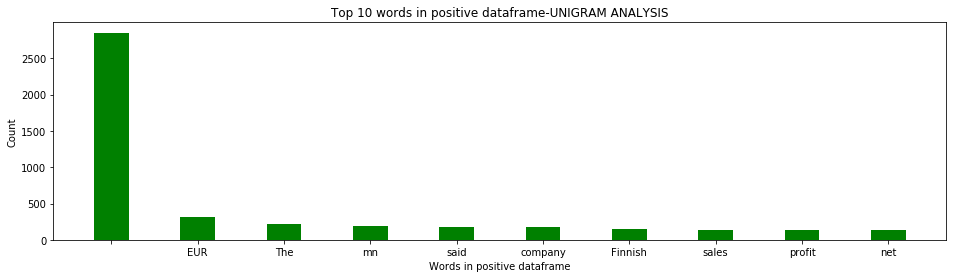

In [51]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1,pd2, color ='green',
        width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-UNIGRAM ANALYSIS")
plt.savefig("positive-unigram.png")
plt.show()

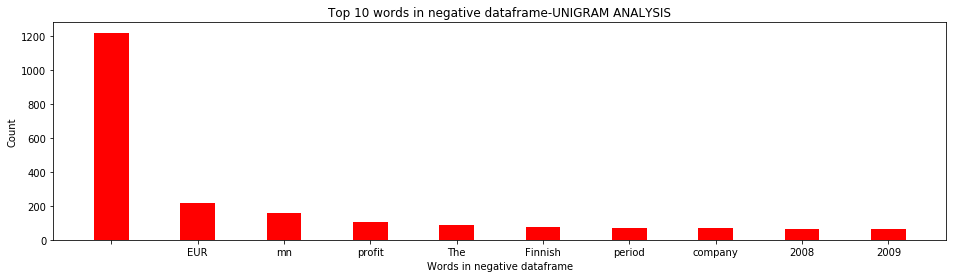

In [89]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1,ned2, color ='red',
        width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-UNIGRAM ANALYSIS")
plt.savefig("negative-unigram.png")
plt.show()

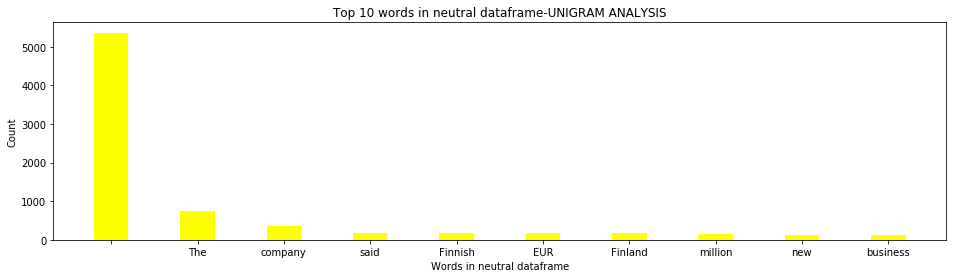

In [84]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1,nud2, color ='yellow',
        width = 0.4)
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-UNIGRAM ANALYSIS")
plt.savefig("neutral-unigram.png")
plt.show()

In [53]:
# Creating bigrams
positiveValues2=defaultdict(int)
negativeValues2=defaultdict(int)
neutralValues2=defaultdict(int)

In [54]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].news:
  for word in generate_N_grams(text,2):
    positiveValues2[word]+=1

Sentence after removing stopwords: ['Net', 'cash', 'flow', 'operations', 'expected', 'remain', 'positive', '']
Sentence after removing stopwords: ['', 'They', 'would', 'invest', 'physical', 'infrastructure', '', 'would', 'also', 'provide', 'knowhow', 'managing', 'developing', 'science', 'technology', 'parks', '', '', 'said', 'Sunrise', 'Valley', 'director', 'Andrius', 'Bagdonas', '']
Sentence after removing stopwords: ['', 'Overall', '', 'pleased', 'startup', 'curve', '', 'pleased', 'quality', 'paper', '', '', 'Stora', 'spokeswoman', 'Patricia', 'Dietz', 'said', 'Tuesday', '']
Sentence after removing stopwords: ['Both', 'net', 'sales', 'operating', 'profit', 'record', 'high', 'company', 'history', '']
Sentence after removing stopwords: ['Combining', 'deep', 'domain', 'expertise', 'Application', 'Service', 'Management', 'ASM', 'outsourcing', 'service', 'offerings', 'proved', 'winning', 'combination', '']
Sentence after removing stopwords: ['Finnish', 'KCI', 'Konecranes', 'awarded', 'ord

Sentence after removing stopwords: ['However', '', 'expects', 'banks', 'provide', 'alternative', 'financing', '']
Sentence after removing stopwords: ['Luxembourgregistered', 'investment', 'fund', 'Amber', 'Trust', 'II', 'final', 'approval', 'Lithuania', 'Competition', 'Council', 'acquire', '296', 'percent', 'Sanitas', '', 'country', 'largest', 'pharmaceutical', 'producer', '']
Sentence after removing stopwords: ['1', 'February', '2011', '', 'Finnish', 'textile', 'clothing', 'company', 'Marimekko', 'Oyj', 'HEL', '', 'MMO1V', 'said', 'today', 'preliminary', 'operating', 'profit', 'grew', 'EUR8', '2', '2010', 'EUR6', '3', '2009', '']
Sentence after removing stopwords: ['In', 'January', '', 'traffic', '', 'measured', 'revenue', 'passenger', 'kilometres', 'RPK', '', 'went', '32', '', 'capacity', '', 'measured', 'available', 'seat', 'kilometres', 'ASK', '', 'rose', '122', '', '']
Sentence after removing stopwords: ['EPS', 'continuing', 'operations', 'came', '030', 'eur', '', '017', '']
Sente

Sentence after removing stopwords: ['Under', 'terms', 'offtake', 'agreement', 'Talvivaara', '', 'Cameco', 'provide', 'upfront', 'investment', '', 'maximum', '', '60', 'million', '', 'cover', 'construction', 'cost', 'uranium', 'extraction', 'circuit', '']
Sentence after removing stopwords: ['', 'The', 'Government', 'professional', 'approach', 'assessing', 'offer', '']
Sentence after removing stopwords: ['comparable', 'operating', 'profit', 'totaled', 'EUR', '854mn', '', 'EUR', '730mn', '2004', '']
Sentence after removing stopwords: ['', 'Several', 'growth', 'initiatives', 'chosen', 'geographic', 'areas', 'already', 'ongoing', '', '', 'continued', '', 'noting', 'Lindex', 'opened', 'first', 'store', 'Czech', 'Republic', 'autumn', 'Brno', '']
Sentence after removing stopwords: ['Finnish', 'investment', 'group', 'Panostaja', 'Oyj', 'said', 'net', 'profit', 'went', '86', 'mln', 'euro', '', '114', 'mln', 'fiscal', '200506', '', 'ended', 'October', '31', '', '2006', '', '28', 'mln', 'euro', ''

Sentence after removing stopwords: ['The', 'company', 'booked', 'AprilJune', 'new', 'orders', 'worth', '949', 'mln', 'eur', '', 'compared', '786', 'mln', 'eur', 'period', 'year', 'ago', '']
Sentence after removing stopwords: ['Ruukki', 'forecast', '1520', '', 'annual', 'sales', 'growth', 'positive', 'pretax', 'result', '2010', '']
Sentence after removing stopwords: ['Previously', '', 'EB', 'delivered', 'custom', 'solution', 'LG', 'Electronics', 'making', 'commercially', 'available', 'mobile', 'terminal', 'vendors', 'well', 'wireless', 'operators', '']
Sentence after removing stopwords: ['The', 'acquisition', 'immediate', 'positive', 'impact', 'Aspocomp', 'financial', 'result', '']
Sentence after removing stopwords: ['', 'Operating', 'profit', 'rose', '269', '', 'EUR', '1058', '', '834', '', 'million', '']
Sentence after removing stopwords: ['As', 'result', '', 'Russia', 'import', 'restrictions', 'Finnish', 'dairy', 'companies', 'canceled', '6', 'August', '2010', '']
Sentence after remo

Sentence after removing stopwords: ['Its', 'board', 'directors', 'propose', 'dividend', 'EUR0', '12', 'per', 'share', '2010', '', 'EUR0', '08', 'per', 'share', 'paid', '2009', '']
Sentence after removing stopwords: ['Finnish', 'Outokumpu', 'Technology', 'awarded', 'several', 'new', 'grinding', 'technology', 'contracts', '']
Sentence after removing stopwords: ['Latvenergo', 'ordered', 'significant', 'expansion', 'Tekla', 'Xpower', 'network', 'information', 'system', '']
Sentence after removing stopwords: ['Q1', '2010', '18', 'May', '2010', '', 'Finnish', 'electrical', 'components', 'maker', 'Salcomp', 'Oy', '', 'HEL', '', 'SAL1V', '', 'said', 'today', 'turned', 'net', 'profit', 'EUR1', '6', 'first', 'quarter', '2010', 'versus', 'loss', 'EUR2m', 'corresponding', 'period', 'last', 'year', '']
Sentence after removing stopwords: ['Profit', 'per', 'share', 'EUR', '103', '', 'EUR', '087', '']
Sentence after removing stopwords: ['The', 'company', 'estimates', 'trend', 'demand', 'sports', 'equi

Sentence after removing stopwords: ['Diluted', 'earnings', 'per', 'share', '', 'EPS', '', 'rose', 'EUR', '029', 'EUR', '005', '']
Sentence after removing stopwords: ['Finnish', 'Raisio', '', 'Diagnostics', '', 'launching', 'new', 'DNAbased', 'quick', 'tests', 'ensure', 'safety', 'food', '']
Sentence after removing stopwords: ['Under', 'contract', 'Cramo', 'Sverige', 'subcontractor', 'Brinkab', 'AB', 'provide', 'scaffolding', 'installations', 'LKAB', 'new', 'pellets', 'plant', 'Kiruna', 'northern', 'Sweden', '']
Sentence after removing stopwords: ['The', 'pipeline', 'strong', '']
Sentence after removing stopwords: ['Consumption', 'forecast', 'grow', '2', '', '']
Sentence after removing stopwords: ['The', 'negotiations', 'carried', 'constructive', 'manner', '', 'parties', 'tried', 'find', 'solution', 'situation', '']
Sentence after removing stopwords: ['Of', 'sales', 'price', '', 'sales', 'gain', '31', 'mln', 'euro', '', '', '45', 'mln', '', 'recognized', 'Incap', 'earnings', '2007', '']

Sentence after removing stopwords: ['Net', 'sales', 'rose', '255', '', 'yearonyear', 'EUR59', '6', '', 'number', 'chargers', 'delivered', 'went', '41', '', '659', 'million', 'pieces', '']
Sentence after removing stopwords: ['It', 'also', 'said', 'third', 'quarter', 'diluted', 'EPS', 'came', '034', 'eur', 'compared', '016', 'eur', 'quarter', 'year', 'ago', '']
Sentence after removing stopwords: ['Operating', 'profit', 'threemonth', 'period', 'increased', 'EUR1', '2', '', 'revenue', 'increased', 'EUR20', '2', '', 'compared', 'corresponding', 'period', '2005', '']
Sentence after removing stopwords: ['Kai', 'Tulonen', '', 'Chief', 'Technology', 'Officer', '', 'SysOpen', 'Digia', 'says', '', '', 'We', 'using', 'Corporate', 'Phonebook', 'inside', 'SysOpen', 'Digia', 'extensively', 'since', 'last', 'fall', '', 'satisfied', 'results', '']
Sentence after removing stopwords: ['Finnish', 'Bank', 'land', 'reports', 'operating', 'profit', 'rose', 'EUR', '213', 'mn', 'second', 'quarter', '2009', 'EU

Sentence after removing stopwords: ['Instead', '', 'Elcoteq', 'signed', 'nonbinding', 'Letter', 'Intent', 'another', 'Asian', 'strategic', 'investor', '']
Sentence after removing stopwords: ['Profit', 'taxes', 'EUR', '01', 'mn', '', 'compared', 'EUR', '04', 'mn', 'previous', 'year', '']
Sentence after removing stopwords: ['The', 'volumes', 'expected', 'increase', 'next', 'years', '']
Sentence after removing stopwords: ['Rapala', 'estimates', 'net', 'sales', '2008', 'increase', '80', 'pct', '12', 'pct', 'assuming', '2007', 'exchange', 'rates', '']
Sentence after removing stopwords: ['In', 'China', '', 'Finnish', 'Kone', 'provides', 'elevators', '', 'escalators', '', 'solutions', 'modernisation', 'maintenance', 'build', '342', 'escalators', 'installed', 'highspeed', 'railway', 'section', 'Beijing', 'Shanghai', '15', 'years', '', 'time', '']
Sentence after removing stopwords: ['Production', 'capacity', 'rise', 'gradually', '170000', 'tonnes', '215000', 'tonnes', '']
Sentence after removin

Sentence after removing stopwords: ['SOUTHFIELD', '', 'Mich', '', 'Central', 'Corporate', 'Credit', 'Union', 'distribute', 'patronage', 'dividends', 'members', 'waiving', 'service', 'fees', 'incurred', 'months', 'July', 'November', '2008', '', 'tune', 'estimated', '', '1', 'million', '']
Sentence after removing stopwords: ['Kesko', 'Agro', 'Eesti', '', 'retailer', 'wholesaler', 'grain', '', 'agricultural', 'warehousing', 'machinery', 'accessories', '', 'net', 'sales', '81', 'million', 'euros', '2007', '', 'increase', 'onetenth', 'preceding', 'year', '']
Sentence after removing stopwords: ['In', 'December', 'alone', '', 'members', 'Lithuanian', 'Brewers', '', 'Association', 'sold', 'total', '203', 'million', 'liters', 'beer', '', 'increase', '19', 'percent', 'sales', '1992', 'million', 'liters', 'December', '2004', '']
Sentence after removing stopwords: ['The', '2015', 'target', 'net', 'sales', 'set', 'EUR', '1bn', 'target', 'return', 'investment', '20', '', '']
Sentence after removing 

Sentence after removing stopwords: ['However', '', 'Simdax', 'remain', 'available', 'markets', 'already', 'approved', 'marketing', 'authorisations', 'submitted', 'applications', '40', 'countries', '', 'Orion', 'added', '']
Sentence after removing stopwords: ['Thanksto', 'improvements', 'demand', 'adjustments', 'made', '', 'theutilization', 'rates', 'Cramo', 'fleet', 'substantiallyimproved', '', '']
Sentence after removing stopwords: ['This', 'truly', 'takes', 'efficiency', 'new', 'heights', '', '', 'Mr', 'Metso', 'adds', '']
Sentence after removing stopwords: ['The', 'broker', 'initiated', 'Palfinger', 'AG', 'Konecranes', 'OYJ', '', 'buy', '', 'recommendations', '', '51', '42', 'eur', 'price', 'targets', 'respectively', '']
Sentence after removing stopwords: ['Consolidated', 'operating', 'profit', 'excluding', 'oneoff', 'items', 'EUR', '306', 'mn', '', 'EUR', '296', 'mn', 'year', 'earlier', '']
Sentence after removing stopwords: ['Compared', 'FTSE', '100', 'index', '', 'rose', '283', '

Sentence after removing stopwords: ['', 'Our', 'customers', 'chance', 'make', 'bookings', 'services', 'want', 'one', 'location', '', '', 'said', 'Mikko', 'Tuomainen', '', 'incharge', 'Finnair', 'Internet', '', 'sales', '', '']
Sentence after removing stopwords: ['Lithuanian', 'beer', 'makers', 'sold', '25688', 'million', 'liters', 'beer', '2005', '', 'rise', '45', 'per', 'cent', 'yearearlier', 'figure', '24592', 'million', 'liters', '']
Sentence after removing stopwords: ['', 'We', 'significant', 'experience', 'smartphone', 'functionality', '', 'development', 'mobile', 'Internet', 'services', '', 'uniting', 'two', 'smooth', 'user', 'experience', '']
Sentence after removing stopwords: ['Airvana', 'UMTS', 'Home', 'Base', 'Station', 'femto', 'cell', 'uses', 'softwarebased', 'functionality', 'offtheshelf', 'silicon', 'accelerate', 'feature', 'development', 'reduce', 'product', 'cost', '']
Sentence after removing stopwords: ['The', 'launch', 'plant', 'June', 'went', 'well', '', 'producing',

Sentence after removing stopwords: ['Suominen', 'Corporation', 'estimates', 'costcutting', 'program', 'started', 'autumn', '2005', '', 'higher', 'sales', 'prices', '', 'expected', 'growth', 'volume', 'Wet', 'Wipes', '', 'make', 'company', 'operations', 'profitable', '']
Sentence after removing stopwords: ['Paper', 'maker', 'Stora', 'Enso', 'Oyj', 'said', 'Friday', 'acquitted', 'charges', 'participated', 'paper', 'pricefixing', 'conspiracy', 'United', 'States', '']
Sentence after removing stopwords: ['Vacon', 'cash', 'flow', 'operations', 'grew', 'EUR', '371', 'mn', 'EUR', '219', 'mn', 'year', 'ago', '']
Sentence after removing stopwords: ['Upgrades', 'include', 'five', 'megapixel', 'camera', '', 'voice', 'control', '', 'looks', 'optical', 'mouse', 'instead', 'Dpad', '', 'upgrade', 'clickhappy', 'S60', 'needed', 'forever', '']
Sentence after removing stopwords: ['', 'We', 'proud', 'contribute', 'creation', 'worldclass', 'airport', 'facility', 'KONE', 'innovative', 'People', 'Flow', 'TM'

Sentence after removing stopwords: ['GeoSentric', 'Oyj', 'GeoSolutions', 'Business', 'Unit', 'GyPSii', '', 'mobile', 'digital', 'lifestyle', 'application', 'geomobility', 'social', 'networking', 'platform', '', 'signed', 'agreement', 'Nanjing', 'MyNet', 'make', 'GyPSii', 'mobile', 'social', 'networking', 'platform', 'available', 'customers', 'China', 'Mobile', '']
Sentence after removing stopwords: ['The', 'seminar', 'introduced', 'modern', '', 'clean', 'technologies', 'products', '', 'financial', 'tools', 'sponsorship', 'programs', 'energy', 'environment', 'projects', 'well', 'potential', 'develop', 'clean', 'energy', 'Vietnam', '']
Sentence after removing stopwords: ['Other', 'carriers', 'handset', 'makers', 'spin', 'positive', 'event', 'raise', 'interest', 'higherend', 'phones', 'pricier', 'data', 'plans', '']
Sentence after removing stopwords: ['The', 'company', 'said', 'investments', 'new', 'market', 'areas', 'resulted', 'sales', 'increase', 'Sweden', '', 'Poland', '', 'Russia', '

Sentence after removing stopwords: ['The', 'Basware', 'Connectivity', 'services', 'allow', 'companies', 'handle', 'purchase', 'pay', 'processes', 'online', 'make', 'internal', 'processes', 'efficient', '', '', 'said', 'CEO', 'Ilkka', 'Sihvo', '', 'Basware', 'Corporation', '']
Sentence after removing stopwords: ['Earnings', 'per', 'share', '', 'EPS', '', 'EUR0', '03', '', 'loss', 'EUR0', '083', '']
Sentence after removing stopwords: ['SvyturysUtenos', 'Alus', '', 'controlled', 'Nordic', 'group', 'Baltic', 'Beverages', 'Holding', '', 'BBH', '', '', 'posted', '47percent', 'growth', 'beer', 'sales', 'JanuaryMay', '4622', 'million', 'litres', '']
Sentence after removing stopwords: ['', 'We', 'pleased', 'working', 'Fujitsu', 'NTT', 'DoCoMo', 'advance', 'progress', 'LTE', '', '', 'said', 'Juergen', 'Walter', '', 'Head', 'Converged', 'Core', '', 'Nokia', 'Siemens', 'Networks', '']
Sentence after removing stopwords: ['', 'Filippova', '', 'A', 'trilateral', 'agreement', 'investment', 'constructi

Sentence after removing stopwords: ['The', 'company', 'well', 'positioned', 'Brazil', 'Uruguay', '']
Sentence after removing stopwords: ['Then', '', 'said', 'contract', 'estimated', 'contribute', 'EUR150m', 'net', 'sales', '2010', '']
Sentence after removing stopwords: ['According', 'Olvi', 'Managing', 'Director', 'Lasse', 'Aho', '', 'company', 'ongoing', 'MMX', 'Plus', 'project', 'aims', 'find', 'growth', 'outside', 'Finland', '']
Sentence after removing stopwords: ['In', 'fourth', 'quarter', '2009', '', 'Orion', 'net', 'profit', 'went', '338', '', 'yearonyear', 'EUR33m', '']
Sentence after removing stopwords: ['', 'We', 'continued', 'actively', 'focus', 'RD', 'position', 'offering', 'away', 'point', 'solutions', 'towards', 'dynamic', 'endtoend', 'solutions', '', '', 'Ervio', 'stated', '']
Sentence after removing stopwords: ['Also', 'Lemminkï¿½inen', 'profit', 'accounting', 'period', 'went', 'EUR', '31', 'mn', 'EUR', '245', 'mn', 'year', 'ago']
Sentence after removing stopwords: ['Cas

Sentence after removing stopwords: ['The', 'sale', '', 'result', 'gain', 'EUR', '60', 'million', 'second', 'quarter', '2010', 'OriolaKD', '', 'supports', 'Finnish', 'company', 'strategy', 'focus', 'pharmaceutical', 'wholesale', 'retail', 'operations', '']
Sentence after removing stopwords: ['EPS', 'quarter', 'came', '036', 'eur', '', '033', 'eur', 'year', 'ago', 'ahead', 'forecast', '033', 'eur', '']
Sentence after removing stopwords: ['In', 'reporting', 'period', '', 'net', 'sales', 'rose', '8', '', 'yearonyear', 'EUR64', '3', '', 'due', 'business', 'acquisitions', 'realized', 'first', 'half', '200809', '', 'effect', 'EUR10', '9', 'review', 'period', '']
Sentence after removing stopwords: ['There', 'recovery', 'base', 'metals', 'prices', 'increased', 'demand', 'metals', 'China', '', 'however', '']
Sentence after removing stopwords: ['Kaupthing', 'forecasts', 'significant', 'price', 'increase', 'printing', 'paper', '2007', '']
Sentence after removing stopwords: ['Operating', 'profit', 

Sentence after removing stopwords: ['LONDON', 'MarketWatch', '', 'Nokia', 'nok', 'said', 'fiveyear', 'services', 'contract', 'run', 'Hutchison', 'Essar', 'network', 'operations', 'nine', 'locations', 'India', '']
Sentence after removing stopwords: ['Net', 'income', 'life', 'insurance', 'doubled', 'EUR', '68', 'mn', 'EUR', '32', 'mn', '', 'net', 'income', 'nonlife', 'insurance', 'rose', 'EUR', '52', 'mn', 'EUR', '15', 'mn', 'corresponding', 'period', '2009', '']
Sentence after removing stopwords: ['21', 'December', '2010', '', 'Finnish', 'industrial', 'machinery', 'company', 'Wartsila', 'Oyj', 'Abp', 'HEL', '', 'WRT1V', 'said', 'yesterday', 'order', 'design', 'liquefied', 'natural', 'gas', 'LNG', 'powered', 'platform', 'supply', 'vessel', 'PSV', 'Norwegian', 'oil', 'service', 'provider', 'Eidesvik', 'Offshore', 'ASA', 'OSL', '', 'EIOF', '']
Sentence after removing stopwords: ['', 'The', 'combined', 'activities', 'create', 'value', 'shareholders', 'good', 'employees', 'customers', '']
Se

Sentence after removing stopwords: ['Fiskars', '', '360yearold', 'global', 'business', 'best', 'known', 'orangehandled', 'scissors', '', 'expects', 'derive', 'synergies', 'EUR5', 'million', 'year', 'consolidating', 'certain', 'parts', 'housewares', 'division', 'two', 'compete', '']
Sentence after removing stopwords: ['', 'In', 'newly', 'formed', 'company', 'YIT', 'Stavo', 'local', 'contact', 'network', '', 'expertise', 'market', 'know', 'Euro', 'Stavokonsult', 'combined', 'YIT', 'housing', 'concept', '', '', 'said', 'Juha', 'Kostiainen', '', 'Yit', 'Vice', 'President', '', 'Corporate', 'Communications', 'Business', 'Development', '']
Sentence after removing stopwords: ['Operating', 'profit', 'improved', '399', '', 'EUR', '180', 'mn', 'EUR12', '8', 'mn', '']
Sentence after removing stopwords: ['We', 'look', 'forward', 'helping', 'company', 'develop', 'operational', 'services', 'digitalize', 'services', 'customers', '', '']
Sentence after removing stopwords: ['Growth', 'strongest', 'FSec

Sentence after removing stopwords: ['The', 'Group', 'business', 'balanced', 'broad', 'portfolio', 'sports', 'presence', 'major', 'markets', '']
Sentence after removing stopwords: ['The', 'shopping', 'center', 'opened', 'St', 'Petersburg', '', 'Russia', 'November', '2010', 'turn', 'cash', 'flow', 'Finnish', 'department', 'store', 'chain', 'Stockmann', 'Russian', 'operations', 'positive', 'first', 'time', '2011', '']
Sentence after removing stopwords: ['We', 'pleased', 'fine', 'cooperation', 'two', 'countries', 'recent', 'times', '', 'said', '']
Sentence after removing stopwords: ['Operating', 'profit', 'totaled', 'EUR', '825mn', '', 'EUR', '763mn', '2004', '']
Sentence after removing stopwords: ['Sales', 'improved', 'SEK', '1553', 'mn', '', 'compared', 'SEK', '1408', 'mn', '']
Sentence after removing stopwords: ['Nordea', 'sees', 'return', 'positive', 'growth', 'Baltic', 'countries', '2011', '']
Sentence after removing stopwords: ['Panostaja', 'Oyj', '', 'Panostaja', '', 'Board', 'Direc

Sentence after removing stopwords: ['Juha', 'Jordan', '', 'chief', 'engineer', 'Glaston', '', 'said', 'one', 'reasons', 'choosing', 'Vacon', 'global', 'AC', 'drives', 'supplier', 'service', 'support', 'centres', 'countries', 'Glaston', 'operates', '']
Sentence after removing stopwords: ['Via', 'move', '', 'company', 'aims', 'annual', 'savings', 'EUR', '3', 'million', 'USD', '43', '', 'main', 'part', 'expected', 'realized', 'year', '']
Sentence after removing stopwords: ['SRV', 'raise', 'holding', 'company', 'summer', '2008', '', 'majority', '']
Sentence after removing stopwords: ['', 'The', 'additional', 'flight', 'linking', 'Mumbai', 'Helsinki', 'dictated', 'strong', 'traffic', 'demand', 'Asia', 'Europe', '']
Sentence after removing stopwords: ['Swiss', 'franc', 'surged', 'record', '142', 'euros', 'reported', 'sharpest', 'gain', 'manufacturing', 'March', '']
Sentence after removing stopwords: ['Operating', 'profit', 'rose', 'EUR', '47', 'mn', 'EUR', '36', 'mn', '']
Sentence after remo

Sentence after removing stopwords: ['By', 'cutting', 'number', 'plants', '', 'group', 'trim', 'fixed', 'costs', '']
Sentence after removing stopwords: ['According', 'HKScan', 'Finland', '', 'plan', 'increase', 'Jï¿½rviSuomen', 'Portti', 'net', 'sales', 'EUR', '80mn', 'EUR', '100mn']
Sentence after removing stopwords: ['Progress', 'Group', '', 'QPR', 'representative', 'Saudi', 'Arabia', 'North', 'Africa', '', 'signed', 'framework', 'agreement', 'long', 'term', 'strategic', 'relationship', 'ISE', '']
Sentence after removing stopwords: ['Operating', 'profit', 'Asian', 'plants', 'grew', 'markedly', '']
Sentence after removing stopwords: ['Return', 'investment', '50', '', '', 'compared', 'negative', '41', '', '2009', '']
Sentence after removing stopwords: ['The', 'social', 'plan', 'negotiations', 'part', 'three', 'year', 'turnaround', 'program', 'expected', 'ensure', 'Salomon', 'future', 'competitiveness', '']
Sentence after removing stopwords: ['EuroChem', 'CFO', 'Andrey', 'Ilyin', 'said',

In [55]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].news:
  for word in generate_N_grams(text,2):
    negativeValues2[word]+=1

Sentence after removing stopwords: ['Group', 'EBIT', 'first', 'half', 'EUR13', '6', 'US', '178', '', 'falling', 'short', 'EUR22', '5', 'posted', 'period', '2009', '']
Sentence after removing stopwords: ['Operating', 'profit', '', 'excluding', 'nonrecurring', 'items', '', 'totalled', 'EUR', '10', 'mn', '', 'EUR', '16', 'mn', '']
Sentence after removing stopwords: ['In', 'addition', '', '29', 'employees', 'laid', 'notice', 'whole', 'workforce', 'laid', 'short', 'periods', 'needed', '']
Sentence after removing stopwords: ['Compared', 'FTSE', '100', 'index', '', 'rose', '367', 'points', '', '06', '', '', 'day', '', 'relative', 'price', 'change', '02', '', '']
Sentence after removing stopwords: ['A', 'survey', 'conducted', 'Taloustutkimus', 'Sampo', 'Life', 'shows', 'companies', 'badly', 'prepared', 'losing', 'key', 'staff', 'members', '']
Sentence after removing stopwords: ['Cencorp', 'net', 'sales', 'first', 'quarter', 'estimated', 'EUR091', '2', '', 'compared', 'EUR4', '5', 'first', 'qua

Sentence after removing stopwords: ['Sampo', 'Bank', 'market', 'share', 'lending', '136', '', '', '144', '', 'first', 'quarter', '2008', '']
Sentence after removing stopwords: ['Revenue', 'quarter', 'fell', '8', 'percent', '', 'EURO', '', '24', 'billion', 'compared', 'year', 'earlier', '']
Sentence after removing stopwords: ['Glaston', 'net', 'profit', 'third', 'quarter', '2007', 'dropped', '24', 'mln', 'euro', '', '', '35', 'mln', '', '35', 'mln', 'euro', '', '', '51', 'mln', '', 'corresponding', 'period', '2006', '']
Sentence after removing stopwords: ['The', 'terms', 'aforementioned', 'funding', 'considerably', 'Bank', 'current', 'CDS', 'levels', 'market', 'maturity', 'ranging', '1', '75', 'years', '']
Sentence after removing stopwords: ['', 'ADPnews', '', '', 'Dec', '1', '', '2009', '', 'Finnish', 'cutlery', 'hand', 'tools', 'maker', 'Fiskars', 'Oyj', 'Abp', '', 'HEL', '', 'FISAS', '', 'said', 'today', 'make', 'redundant', 'total', '18', 'office', 'management', 'staff', 'members', 

Sentence after removing stopwords: ['The', 'company', 'expects', 'net', 'sales', 'whole', '2009', 'remain', '2008', 'level', '']
Sentence after removing stopwords: ['Finnish', 'investment', 'group', 'Norvestia', 'Oyj', 'said', 'net', 'profit', 'fell', '235', 'mln', 'euro', '', '306', 'mln', '2006', '335', 'mln', 'euro', '', '436', 'mln', '2005', '']
Sentence after removing stopwords: ['17', 'March', '2011', '', 'Goldman', 'Sachs', 'estimates', 'negative', 'prospects', 'Norwegian', 'mobile', 'operations', 'Norway', 'Telenor', 'ASA', 'OSL', '', 'TEL', 'Sweden', 'TeliaSonera', 'AB', 'STO', '', 'TLSN', 'short', 'term', '']
Sentence after removing stopwords: ['The', 'stock', 'hit', 'profit', 'warning', 'Finnish', 'rival', 'Rautaruukki', 'Oyj', '', 'OMX', '', 'RTRKS', '', '']
Sentence after removing stopwords: ['In', 'fourth', 'quarter', '2008', '', 'net', 'sales', 'decreased', 'EUR', '1214', 'mn', 'EUR', '1655', 'mn', 'fourth', 'quarter', '2007', '']
Sentence after removing stopwords: ['Com

Sentence after removing stopwords: ['The', 'company', 'plans', 'close', 'two', 'three', 'lines', 'plant', '', '450', 'jobs', 'threat', '']
Sentence after removing stopwords: ['Finnish', 'industrial', 'group', 'Ruukki', 'Group', 'brought', 'counter', 'action', 'Finnish', 'metal', 'company', 'Rautaruukki', 'dispute', 'concerning', 'names', 'companies', '']
Sentence after removing stopwords: ['The', 'currency', 'effect', '30', 'pct', '', '20', 'mln', 'euro', '', '', '313', 'mln', '', '', 'negative', 'impact', 'revenue', '']
Sentence after removing stopwords: ['', 'ADP', 'News', '', '', 'Feb', '12', '', '2009', '', 'Finnish', 'construction', 'company', 'Lemminkainen', 'Oyj', '', 'HEL', '', 'LEM1S', '', 'said', 'today', 'net', 'profit', 'decreased', 'EUR', '635', 'million', '', 'USD', '811', '', '2008', 'EUR', '806', 'million', '2007', '']
Sentence after removing stopwords: ['Net', 'cash', 'operating', 'activities', 'negative', 'EUR', '03', 'mn', '', 'compared', 'EUR', '309', 'mn', '2009', 

Sentence after removing stopwords: ['Finnish', 'power', 'supply', 'solutions', 'systems', 'provider', 'Efore', 'Oyj', 'said', 'net', 'loss', 'widened', '32', 'mln', 'euro', '', '42', 'mln', 'first', 'quarter', 'fiscal', '20062007', 'ending', 'October', '31', '', '2007', '900000', 'euro', '', '12', 'mln', 'period', 'fiscal', '200506', '']
Sentence after removing stopwords: ['The', 'pulp', 'production', 'Finnish', 'Kemijï¿½rvi', 'also', 'liquidated', '1100', 'employees', 'loose', 'jobs']
Sentence after removing stopwords: ['Cuts', 'equivalent', 'costs', '3545', 'employees', 'target', '', 'company', 'said', '']
Sentence after removing stopwords: ['11', 'August', '2010', '', 'Finnish', 'measuring', 'equipment', 'maker', 'Vaisala', 'Oyj', 'HEL', '', 'VAIAS', 'said', 'today', 'net', 'loss', 'widened', 'EUR4', '8', 'first', 'half', '2010', 'EUR2', '3', 'corresponding', 'period', 'year', 'earlier', '']
Sentence after removing stopwords: ['Finnish', 'media', 'group', 'Talentum', 'issued', 'prof

Sentence after removing stopwords: ['Finnish', 'management', 'software', 'solutions', 'provider', 'Ixonos', 'Oyj', 'net', 'profit', 'decreased', '369000', 'euro', '', '', '575000', '', 'first', 'quarter', '2008', '669000', 'euro', '', '', '10', 'mln', '', 'period', '2007', '']
Sentence after removing stopwords: ['However', '', 'orders', 'received', 'period', 'review', 'fell', '17', '', 'quarteronquarter', 'EUR', '213', 'million', 'recorded', 'second', 'quarter', '2010', '']
Sentence after removing stopwords: ['Pretax', 'profit', 'totaled', 'EUR', '90', 'mn', '', 'EUR', '363', 'mn', '2007', '']
Sentence after removing stopwords: ['Since', 'association', 'data', 'cover', 'sales', 'figures', '100', 'small', 'local', 'breweries', 'sales', 'imported', 'beer', 'products', '', 'actual', 'market', 'shares', 'members', 'smaller', 'given', 'report', '']
Sentence after removing stopwords: ['Finnish', 'metal', 'products', 'company', 'Componenta', 'Oyj', 'net', 'profit', 'went', 'slightly', '251', 

Sentence after removing stopwords: ['', 'ADPnews', '', '', 'Feb', '3', '', '2010', '', 'Finlandbased', 'steel', 'maker', 'Rautaruukki', 'Oyj', '', 'HEL', '', 'RTRKS', '', '', 'Ruukki', '', 'said', 'today', 'slipped', 'largerthanexpected', 'pretax', 'loss', 'EUR', '46', 'million', '', 'USD', '645', '', 'fourth', 'quarter', '2009']
Sentence after removing stopwords: ['The', 'EU', 'Commission', 'said', 'earlier', 'fined', 'ThyssenKrupp', '', 'United', 'Technologies', 'Corp', 'Otis', '', 'Schindler', 'AG', 'Kone', 'Oyj', 'total', '9923', 'mln', 'eur', 'alleged', 'cartel', 'activity', 'lift', 'market', 'going', 'back', 'twelve', 'years', '']
Sentence after removing stopwords: ['The', 'negotiation', 'resulted', 'reduction', '80', 'people', 'regular', 'employment', '', 'around', 'half', 'covered', 'pension', 'arrangements', '']
Sentence after removing stopwords: ['Finnish', 'software', 'hardware', 'developer', 'Elektrobit', 'Oyj', 'HEL', '', 'EBG1V', '', 'EB', '', 'said', 'today', 'temporaril

Sentence after removing stopwords: ['Finnish', 'electronics', 'manufacturing', 'services', 'EMS', 'company', 'Elcoteq', 'SE', 'posted', 'net', 'loss', '664', 'mln', 'euro', '', '912', 'mln', 'first', 'half', '2007', '', 'compared', 'net', 'profit', '71', 'mln', 'euro', '', '98', 'mln', 'period', '2006', '']
Sentence after removing stopwords: ['Raute', 'reported', 'loss', 'per', 'share', 'EUR0', '86', 'first', 'half', '2009', '', 'EPS', 'EUR0', '74', 'corresponding', 'period', '2008', '']
Sentence after removing stopwords: ['In', 'building', 'home', 'improvement', 'trade', '', 'net', 'sales', 'totalled', 'EUR', '1173', 'mn', '', 'EUR', '1566', 'mn', 'year', 'earlier', '']
Sentence after removing stopwords: ['Salcomp', 'Oyj', '', 'Finnish', 'maker', 'mobile', 'phone', 'chargers', '', 'Monday', 'posted', 'EUR1', '49', 'million', 'loss', 'second', 'quarter', 'compared', '170', 'million', 'profit', 'period', 'previous', 'year', '']
Sentence after removing stopwords: ['Fullyear', 'operating'

Sentence after removing stopwords: ['Scanfil', 'also', 'issued', 'profit', 'warning', '']
Sentence after removing stopwords: ['Metso', 'Foundries', 'Jyvaskyla', '', 'Inc', 'begin', 'personnel', 'negotiations', 'temporary', 'layoffs', 'personnel', 'reductions', 'Jyvaskyla', '', 'Finland', '']
Sentence after removing stopwords: ['Possible', 'personnel', 'reductions', 'concern', 'approximately', '104', 'people', '']
Sentence after removing stopwords: ['Elisa', 'CEO', 'Sami', 'Seppanen', 'said', 'EMT', 'slogan', '', 'Best', 'coverage', 'across', 'Estonia', '', 'clearly', 'gives', 'misleading', 'information', 'consumers', '']
Sentence after removing stopwords: ['ArcelorMittal', 'Chief', 'Executive', 'Officer', 'Lakshmi', 'Mittal', 'already', 'cut', 'output', 'furnaces', '']
Sentence after removing stopwords: ['Result', 'taxes', 'decreased', 'nearly', 'EUR', '145', 'mn', '', 'compared', 'nearly', 'EUR', '20mn', 'previous', 'accounting', 'period', '']
Sentence after removing stopwords: ['When

In [56]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].news:
  for word in generate_N_grams(text,2):
    neutralValues2[word]+=1

Sentence after removing stopwords: ['Metso', 'global', 'supplier', 'sustainable', 'technology', 'services', 'mining', '', 'construction', '', 'power', 'generation', '', 'automation', '', 'recycling', 'pulp', 'paper', 'industries', '']
Sentence after removing stopwords: ['Dopplr', 'members', 'share', 'personal', 'business', 'travel', 'plans', 'privately', 'networks', '', 'highlight', 'interesting', 'places', 'stay', '', 'eat', 'explore', 'cities', 'around', 'world', '']
Sentence after removing stopwords: ['ALEXANDRIA', '', 'Va', '', 'July', '11', '', 'Hannu', 'Kahonen', 'Juuka', '', 'Finland', '', 'developed', 'ornamental', 'design', 'handle', 'fire', 'pit', 'door', '', 'US', 'Patent', '', 'Trademark', 'Office', 'announced', '']
Sentence after removing stopwords: ['According', 'product', 'manager', 'Lassi', 'Hietanen', '', 'building', 'power', 'plant', 'burns', 'mixed', 'waste', 'Helsinki', 'may', 'good', 'idea', 'reduces', 'production', 'combined', 'power', 'plants', 'using', 'natural'

Sentence after removing stopwords: ['GUANGDONG', '', 'October', '26', '', 'SinoCast', '', 'Nokia', 'Telecommunications', 'Dongguan', 'branch', 'entered', 'letter', 'intent', 'open', 'Nokia', 'Class', 'Qingyuan', 'Polytechnic', '', 'Qingyuan', 'City', 'Guangdong', 'Province', '']
Sentence after removing stopwords: ['In', 'end', '', 'Sanoma', 'News', 'wants', 'secure', 'foundation', 'savings', '']
Sentence after removing stopwords: ['TietoEnator', 'signed', 'agreement', 'acquire', 'Indian', 'research', 'development', '', 'RD', '', 'services', 'provider', 'turnkey', 'software', 'solutions', 'developer', 'Fortuna', 'Technologies', 'Pvt', 'Ltd', '21', 'mln', 'euro', '', '', '303', 'mln', '', 'September', '2007', '']
Sentence after removing stopwords: ['More', '80', 'special', 'events', 'three', 'counties', 'four', 'months', 'hosted', 'library', 'system', 'nine', 'branch', 'libraries', '']
Sentence after removing stopwords: ['It', '30', 'offices', 'worldwide', '90', 'pct', 'net', 'sales', 'g

Sentence after removing stopwords: ['LT', 'also', 'made', 'commitment', 'redeem', 'remaining', 'shares', 'end', '2011', '']
Sentence after removing stopwords: ['The', 'mentioned', 'shareholders', 'suggest', 'monthly', 'salary', 'EUR', '1400', 'would', 'paid', 'Board', 'members', 'outside', 'company', '']
Sentence after removing stopwords: ['Founded', '1985', '', 'Quatrocon', 'clientele', 'consists', 'public', 'sector', 'builders', '', 'central', 'trading', 'companies', 'major', 'construction', 'firms', '']
Sentence after removing stopwords: ['Around', '250', 'reductions', 'implemented', 'pension', 'arrangements', '']
Sentence after removing stopwords: ['The', 'deal', 'line', 'Etteplan', 'strategy', 'operate', 'partner', 'global', 'customers', 'provide', 'industrial', 'technology', 'design', 'services', '']
Sentence after removing stopwords: ['The', '3C', 'Expo', 'signature', 'show', 'Dongguan', '', 'supported', 'Dongguan', 'Municipal', 'Government', 'every', 'year', '', 'featuring', 'c

Sentence after removing stopwords: ['Competition', 'authorities', 'approve', 'deal', 'finalized', '']
Sentence after removing stopwords: ['KONE', 'listed', 'Nordic', 'Exchange', 'Helsinki', '']
Sentence after removing stopwords: ['A', 'total', '131000', 'Talvivaara', 'Mining', 'Company', 'Plc', 'new', 'shares', 'subscribed', 'period', 'May', '1', '', '2010', 'June', '30', '', '2010', 'company', 'stock', 'option', 'rights', '2007A', '']
Sentence after removing stopwords: ['Of', 'Bavelloni', 'NST', 'joint', 'ventures', '', 'Bavelloni', 'Tools', '', 'completes', 'semiproducts', 'produced', 'Italy', 'highquality', 'tools', 'sold', 'DiaPol', 'brand', '']
Sentence after removing stopwords: ['Glaston', '', 'headquartered', 'Tampere', '', 'Finland', '', 'growing', 'international', 'glass', 'technology', 'company', '']
Sentence after removing stopwords: ['The', 'product', 'frontedge', 'folding', 'maximizes', 'weather', 'resilience', 'enables', 'seamless', 'roof', 'finish', '']
Sentence after re

Sentence after removing stopwords: ['The', 'total', 'value', 'project', 'estimated', '30', 'mln', 'euro', '', '44', 'mln', '', 'services', '20', 'mln', 'euro', '', '29', 'mln', 'thirdparty', 'licences', '10', 'mln', 'euro', '', '15', 'mln', '']
Sentence after removing stopwords: ['', 'There', 'room', 'modify', 'share', 'component', 'already', 'indicated', '', '']
Sentence after removing stopwords: ['Lemminkainen', 'Oyj', 'said', 'signed', 'credit', 'agreements', 'Nordea', 'Bank', 'STO', '', 'NDA', '', 'Pohjola', 'Bank', 'HEL', '', 'POH1S', '', 'Sampo', 'Bank', 'HEL', '', 'SAMAS', 'Svenska', 'Handelsbanken', 'STO', '', 'SHB', 'A', '']
Sentence after removing stopwords: ['The', 'company', 'net', 'sales', 'EUR', '198', 'mn', 'pretax', 'profit', 'EUR', '18', 'mn', '2005', '']
Sentence after removing stopwords: ['', 'Provides', 'summary', 'medical', 'equipment', 'pipeline', 'products', 'company', 'developing', '']
Sentence after removing stopwords: ['The', 'negotiations', 'concern', '246', 

Sentence after removing stopwords: ['The', 'maximum', 'number', 'new', 'shares', 'offered', '22', 'million', '']
Sentence after removing stopwords: ['The', 'turbines', 'expected', 'launched', 'end', '2012', '']
Sentence after removing stopwords: ['The', 'company', 'also', 'supplied', '200', 'MW', 'power', 'generating', 'equipment', 'number', 'projects', 'Papua', 'New', 'Guinea', '', 'including', '12', 'engines', 'Wartsila', '32', 'type', 'Lihir', 'Gold', '']
Sentence after removing stopwords: ['Finnish', 'diversified', 'holding', 'company', 'Aspo', 'Oyj', 'said', 'September', '8', '', '2008', 'sell', 'Finnish', 'tape', 'business', 'Kaukomarkkinat', 'unit', 'local', 'Oy', 'Telpak', 'Ab', '']
Sentence after removing stopwords: ['Based', 'design', 'previous', 'handsets', '', 'Nokia', 'E72', 'Nokia', 'E63', 'Symbianbased', 'model', 'promised', 'offer', 'direct', 'access', '90', 'per', 'cent', 'world', 'corporate', 'email', 'Mail', 'Exchange', 'IBM', 'Lotus', 'Notes', 'Traveler', '']
Senten

Sentence after removing stopwords: ['The', 'executive', 'said', 'countries', 'Brazil', '', 'Chile', '', 'Argentina', 'Mexico', 'lead', 'adoption', 'business', 'Ethernet', 'services', 'segment', '', 'Brazil', 'Mexico', 'early', 'adopters', 'carrier', 'Ethernet', 'mobile', 'backhaul', '']
Sentence after removing stopwords: ['The', 'Financial', 'Statements', 'Interim', 'Reports', 'released', 'around', '900', '', 'Finnish', 'time', '', 'given', 'dates', '']
Sentence after removing stopwords: ['The', 'company', 'net', 'sales', '2010', 'totalled', 'MEUR', '3114', 'operating', 'margin', '139', 'per', 'cent', '']
Sentence after removing stopwords: ['Both', 'sources', 'said', 'Nokia', 'would', 'unveil', 'new', 'phone', 'codenamed', '', 'Tube', '', 'Oct', '2', 'analyst', 'media', 'event', 'London', '']
Sentence after removing stopwords: ['Following', 'registration', '', 'share', 'capital', 'Biotie', 'EUR', '5255667810', '']
Sentence after removing stopwords: ['The', 'figure', 'include', 'food', 

Sentence after removing stopwords: ['Conference', 'Call', 'To', 'participate', 'via', 'conference', 'call', '', 'please', 'dial', '510', 'minutes', 'beginning', 'event', '', '44', '0', '20', '7162', '0025', 'Europe', '1', '334ï¿½323ï¿½6201', 'U']
Sentence after removing stopwords: ['Under', 'agreement', '', 'Japrotek', 'deliver', 'nine', 'storage', 'tanks', 'volume', 'range', '1000', 'cu', '3000', 'cu', 'included', 'agitators', '']
Sentence after removing stopwords: ['Poyry', 'net', 'sales', '2007', 'amounted', 'EUR', '720', 'million', 'employs', '7400', 'experts', '']
Sentence after removing stopwords: ['The', 'cranes', 'would', 'installed', 'onboard', 'two', 'freighters', 'ordered', 'Singaporean', 'ship', 'owner', 'Masterbulk', '']
Sentence after removing stopwords: ['The', 'company', 'give', 'palm', 'oil', 'altogether', '', 'however', '']
Sentence after removing stopwords: ['Cramo', 'manager', 'Jarmo', 'Laasanen', 'said', 'hiring', 'equipment', 'machinery', 'Lithuania', 'differs', '

Sentence after removing stopwords: ['First', 'Industrial', 'seek', 'LEED', 'designation', 'Uponor', 'new', 'building', '282000', 'squarefoot', 'speculative', 'distribution', 'center', 'First', 'Park', 'Lakeville', '']
Sentence after removing stopwords: ['Finnish', 'investment', 'company', 'Neomarkka', 'main', 'owner', 'Kuitu', 'Finland', 'successor', '']
Sentence after removing stopwords: ['As', 'reported', 'June', '26', '', '', 'circuits', 'continued', 'alternately', 'report', 'track', 'vacant', 'occupied', 'almost', 'constantly', 'June', '17', '', 'part', 'track', 'signaling', 'device', 'replaced', '', 'time', 'crash', '', 'according', 'Metro', 'source', '', '']
Sentence after removing stopwords: ['Finnish', 'plastic', 'pipe', 'maker', 'Uponor', 'selling', 'Irish', 'UK', 'infrastructure', 'businesses', 'private', 'equity', 'company', '3i', '']
Sentence after removing stopwords: ['', 'We', 'want', 'serve', 'Kcitymarket', 'customers', 'offering', 'interesting', 'topical', 'selections',

Sentence after removing stopwords: ['SRV', 'also', 'build', 'aqua', 'park', 'wellness', 'area', '', 'restaurant', 'multifunctional', 'ice', 'arena', '']
Sentence after removing stopwords: ['Finnish', 'beverage', 'company', 'Olvi', 'introducing', 'new', 'long', 'drink', 'Olvi', 'Kultalonkero', '', '', 'golden', 'long', 'drink', '', '', 'market', 'Finland', 'spring', '2009', '']
Sentence after removing stopwords: ['Analysts', 'surveyed', 'Thomson', 'Financial', 'expected', 'revenue', '', '69', 'million', 'quarter', '']
Sentence after removing stopwords: ['The', 'mill', 'capacity', 'produce', '500000', 'tonnes', 'pulp', 'per', 'year', '']
Sentence after removing stopwords: ['Of', 'course', '', 'direct', 'access', 'Nokia', 'Ovi', 'store', '', 'lots', 'fun', 'downloading', 'favorite', 'media', '']
Sentence after removing stopwords: ['The', 'Tecnomen', 'Convergent', 'Charging', 'solution', 'includes', 'functionality', 'prepaid', 'postpaid', 'billing', '', 'charging', 'rating', 'voice', 'call

Sentence after removing stopwords: ['Nordea', 'Bank', 'large', 'share', 'vast', 'experience', 'Nordic', 'credit', 'card', 'market', '']
Sentence after removing stopwords: ['The', 'contract', 'covers', 'supply', 'temporary', 'heating', 'equipment', 'LKAB', 'new', 'pellet', 'plant', 'Kiruna', '', 'northern', 'Sweden', '']
Sentence after removing stopwords: ['In', 'turn', 'Fradkov', 'said', 'Russia', 'interested', 'adopting', 'Finnish', 'experience', 'forming', 'technology', 'parks', 'framework', 'implementing', 'law', 'special', 'economic', 'zone', '']
Sentence after removing stopwords: ['No', 'financial', 'details', 'reported', '']
Sentence after removing stopwords: ['Tekla', 'provides', '3D', 'software', 'building', 'infrastructure', 'engineering', '', 'focus', 'building', 'information', 'modelling', 'steel', 'concrete', 'structures', 'design', 'construction', '']
Sentence after removing stopwords: ['The', 'flagship', 'open', 'fall', 'Manhattan', 'Flatiron', 'District', '', 'Toy', 'Bui

Sentence after removing stopwords: ['In', 'next', 'years', '', 'ICT', 'sector', 'share', 'electricity', 'consumption', 'raised', 'increase', 'popularity', 'smartphones', '']
Sentence after removing stopwords: ['It', 'said', 'Comptel', 'delivers', 'reliable', 'provisioning', 'activation', 'solutions', 'improve', 'fulfilment', 'processes', 'operators', '']
Sentence after removing stopwords: ['Changes', 'asbuilt', 'models', 'design', 'communicated', 'subcontractors', 'accommodate', 'steel', 'GRC', 'glass', 'reinforced', 'concrete', 'fabrication', 'process', '']
Sentence after removing stopwords: ['The', 'works', 'include', 'laying', 'natural', 'stone', 'pavements', 'installation', 'underground', 'heating', '', 'surface', 'water', 'drainage', 'systems', '']
Sentence after removing stopwords: ['The', 'agreement', 'JM', 'one', 'series', 'contracts', 'TeliaSonera', 'signed', 'recent', 'months', 'residential', 'construction', 'real', 'estate', 'management', 'companies', 'Sweden', '']
Sentence 

Sentence after removing stopwords: ['The', 'EB', 'Tough', 'VoIP', 'Field', 'Phone', 'equipped', 'integrated', 'speaker', '', 'Ethernet', 'SHDSL', 'connectivity', '', 'enables', 'several', 'innovative', 'applications', '']
Sentence after removing stopwords: ['Finnish', 'drug', 'distributor', 'wholesaler', 'OriolaKD', 'Oyj', 'said', 'October', '11', '', '2006', 'named', 'Anne', 'Kariniemi', 'vice', 'president', 'Logistics', 'Sourcing', 'department', 'January', '15', '', '2007', '']
Sentence after removing stopwords: ['The', 'company', 'distribute', 'dividend', '2005', '']
Sentence after removing stopwords: ['', 'Subscribers', 'browse', 'free', 'numbers', 'handset', '', 'select', 'numbers', '', 'packages', 'services', 'prefer', 'activating', 'phone', '']
Sentence after removing stopwords: ['Exel', 'wants', 'serve', 'industrial', 'customers', 'individual', 'products', '']
Sentence after removing stopwords: ['In', 'June', 'sold', '30', 'percent', 'stake', 'Nordstjernan', '', 'investment', '

Sentence after removing stopwords: ['mr', 'Bakman', 'sees', 'also', 'expansion', 'options', 'TallinnHelisnki', 'link', '', 'claiming', 'however', '', 'operating', 'link', 'single', 'ship', 'enough', '']
Sentence after removing stopwords: ['The', 'hull', 'vessel', 'built', 'one', 'block', 'time', 'Ruukki', 'delivered', 'plate', 'material', 'block', 'construction', 'progressed', '']
Sentence after removing stopwords: ['A', 'employees', 'would', 'remain', 'Oulu', 'plant', 'support', 'functions', 'group', 'units', '']
Sentence after removing stopwords: ['A', 'local', 'waste', 'management', 'company', '', 'Turun', 'Seudun', 'Jï¿½tehuolto', '', 'planned', 'set', '150000', 'tonne', 'wasteburning', 'facility']
Sentence after removing stopwords: ['The', 'EUR17m', 'contract', 'includes', 'design', 'construction', 'works', '']
Sentence after removing stopwords: ['The', 'following', 'information', 'released', 'Comptel', '', 'Tomorrow', 'Chairman', 'Federal', 'Communications', 'Commission', 'schedu

Sentence after removing stopwords: ['Market', 'data', 'analytics', 'derived', 'primary', 'secondary', 'research', '']
Sentence after removing stopwords: ['Total', 'two', 'offers', 'received', 'Contracting', 'Authority', 'participating', 'contract', '', 'however', 'contract', 'allotted', 'Affecto', 'Finland', 'Oy', '']
Sentence after removing stopwords: ['The', 'proposal', 'shareholders', 'elect', 'Mr', 'Hannu', 'Krogerus', 'Board', 'based', 'long', 'unrivalled', 'experience', 'knowledge', 'matters', 'related', 'Elcoteq', '']
Sentence after removing stopwords: ['A', 'total', 'six', 'polled', 'analysts', 'rated', 'Mreal', '', 'two', 'gave', '', 'buy', '', '', '', 'accumulate', '', '', 'three', 'gave', '', 'hold', '', 'one', 'gave', '', 'sell', '', '']
Sentence after removing stopwords: ['You', 'hear', 'latest', 'insights', 'updates', 'Citycon', 'strategy', 'well', 'latest', 'news', 'business', 'units', '']
Sentence after removing stopwords: ['The', 'share', 'issue', '', 'derogating', 'pr

Sentence after removing stopwords: ['The', 'dividend', 'paid', 'April', '15', '', '2008', 'shareholders', 'record', 'date', 'April', '8', '', '2008', 'entered', 'list', 'shareholders', 'kept', 'Finnish', 'Central', 'Securities', 'Depository', 'Ltd', '']
Sentence after removing stopwords: ['In', 'addition', '', 'nine', 'fixedterm', 'employment', 'contracts', 'extended', 'two', 'people', 'leave', 'company', 'pension', 'arrangements', '']
Sentence after removing stopwords: ['Stora', 'Enso', 'Oyj', 'said', 'Friday', 'sell', 'North', 'American', 'unit', 'NewPage', '', 'deal', 'valued', 'euro1', '82', 'billion', 'US', '252', 'million', '']
Sentence after removing stopwords: ['The', 'contract', 'value', 'amounts', 'EUR', '24', 'million', '']
Sentence after removing stopwords: ['Tyrvï¿½inen', 'opinion', 'airline', 'repeating', 'time', 'already', '', 'however']
Sentence after removing stopwords: ['', 'Nordic', 'infrastructure', 'construction', 'one', 'strategic', 'growth', 'areas', '']
Sentence

Sentence after removing stopwords: ['Coffee', 'served', 'starting', '1430', 'EET', 'well', 'event', '']
Sentence after removing stopwords: ['This', 'ideally', 'placed', 'position', 'tap', 'potential', 'clean', 'technology', '']
Sentence after removing stopwords: ['Last', 'July', '', 'group', 'said', 'intended', 'relocate', 'warehouse', 'office', 'space', 'Loudeac', 'Saint', 'Marcel', 'Morvillars', '', 'east', 'France', '', 'already', 'operates', 'hook', 'manufacturing', 'distribution', 'unit', '']
Sentence after removing stopwords: ['The', 'earnings', 'comparative', 'period', 'included', 'capital', 'gain', 'EUR', '8mn', 'sale', 'OMX', 'shares', '']
Sentence after removing stopwords: ['Also', 'Ruukki', 'Construction', '', 'Rautaruukki', 'construction', 'division', '', 'initiating', 'employeremployee', 'negotiations', 'sites', 'Alajï¿½rvi', '', 'Vimpeli', 'Perï¿½seinï¿½joki', 'Fin']
Sentence after removing stopwords: ['They', 'sunk', 'depth', '360380', 'metres', 'fixed', 'bottom', 'mud',

Sentence after removing stopwords: ['Yvonne', 'Jones', 'owner', 'Chameleon', 'Interiors', '']
Sentence after removing stopwords: ['However', '', 'brokers', '', 'ratings', 'stock', 'differ', '']
Sentence after removing stopwords: ['It', 'handpainted', 'resin', 'real', '140', 'trebles', '75cm', 'long', '25cm', 'deep', 'top', 'bottom', 'middle', 'hook', '']
Sentence after removing stopwords: ['The', 'company', 'charge', 'natural', 'gas', 'storage', 'activities', 'France', '', 'Great', 'Britain', '', 'Germany', '']
Sentence after removing stopwords: ['Comptel', 'Corporation', 'publish', 'financial', 'statements', '2008', '12', 'February', '2009', '']
Sentence after removing stopwords: ['After', 'restructuring', '', 'UPM', 'average', 'paper', 'machine', 'capacity', 'Europe', '320000', 'tons', '', '350000', 'short', 'tons', '', 'coated', 'magazine', 'paper', '420000', 'tons', '', '460000', 'short', 'tons', '', 'coated', 'fine', 'paper', '']
Sentence after removing stopwords: ['The', 'report'

Sentence after removing stopwords: ['The', 'total', 'number', 'shares', 'company', '585236987', 'Innofactor', 'group', 'Innofactor', 'offers', 'customers', 'comprehensive', 'solutions', 'Microsoft', 'environment', '']
Sentence after removing stopwords: ['Loudeye', 'Corp', '', '', '256', '', '433', 'Nokia', 'Corp', '', '10', 'cents', '', '1946', 'Nokia', 'agreed', 'buy', 'digital', 'music', 'distributor', '', '60', 'million', '']
Sentence after removing stopwords: ['The', 'plant', 'scheduled', 'completion', 'late', 'February', '2007', 'hand', 'areas', 'January', 'Two', 'suppliers', 'Nokia', '', 'Aspocomp', 'Group', 'Oyj', 'Perlos', '', 'announced', 'plans', 'establish', 'plants', 'within', 'Nokia', 'complex', 'Together', '', 'invest', 'Rs', '365', 'crore', '']
Sentence after removing stopwords: ['', 'The', 'biggest', 'challenge', 'make', 'piece', 'look', 'raw', '', '', 'Hansen', 'said', '']
Sentence after removing stopwords: ['The', 'share', 'subscription', 'period', 'expire', '30', 'Se

Sentence after removing stopwords: ['In', '2009', '', 'reported', 'net', 'sales', 'approximately', 'EUR', '6mn', '']
Sentence after removing stopwords: ['The', 'last', 'job', 'losses', 'related', 'reductions', 'take', 'place', '2010', '']
Sentence after removing stopwords: ['Cargotec', 'also', 'move', 'HallbergIvarsson', 'service', 'installation', 'business', 'roof', 'service', 'center', 'Kalmar', 'MacGregor', 'solutions', 'Gothenburg', '']
Sentence after removing stopwords: ['The', 'full', 'MidnightTrader', 'extendedhours', 'trading', 'analysis', 'news', 'service', 'available', 'realtime', 'COMTEX', '']
Sentence after removing stopwords: ['The', 'group', 'net', 'sales', '2007', 'EUR683', '6']
Sentence after removing stopwords: ['Neste', 'Oil', 'Corporation', 'refining', 'marketing', 'company', 'concentrating', 'clean', '', 'highquality', 'traffic', 'fuels', '']
Sentence after removing stopwords: ['Strong', 'brand', 'visibility', 'nationally', 'regionally', 'primary', 'importance', 'ho

Sentence after removing stopwords: ['Almost', 'entire', 'office', 'building', 'occupied', 'Metso', '']
Sentence after removing stopwords: ['The', 'markets', 'expect', 'Heineken', 'sell', 'Hartwall', 'whole', 'parts', '']
Sentence after removing stopwords: ['Fortum', 'needs', 'clear', 'signal', 'commitment', 'Government', 'permit', 'available', 'company', 'start', 'next', 'round', '', 'Kuula', 'says', '']
Sentence after removing stopwords: ['Founded', '1923', '', 'Finnair', 'one', 'world', 'oldest', 'airlines', 'flies', '60', 'destinations', 'fleet', '63', 'aircraft', '', 'employing', '9500', 'people', '']
Sentence after removing stopwords: ['This', 'includes', 'EUR', '395', 'mn', 'change', 'fair', 'value', 'investment', 'properties', '']
Sentence after removing stopwords: ['It', 'expected', 'completed', 'end', '2007', '']
Sentence after removing stopwords: ['The', 'EBRD', 'using', 'funds', 'provide', '216', 'million', 'A', 'loan', 'B', 'portion', '10', 'million', 'Euros', 'syndicated',

Sentence after removing stopwords: ['All', 'reproduction', 'distribution', 'prohibited', '']
Sentence after removing stopwords: ['The', 'previous', 'offer', '34', '', 'voting', 'rights', '123', '', 'capital', '']
Sentence after removing stopwords: ['The', 'total', 'scholarship', 'amount', '40000', 'euros', 'recipients', 'chosen', 'recommendation', 'fine', 'arts', 'universities', 'sports', 'associations', '']
Sentence after removing stopwords: ['Aspocomp', 'said', 'spin', 'Chinese', 'Indian', 'units', '', 'equipment', 'Salo', 'plant', 'Finland', '', 'newlyformed', 'unit', '', 'sell', 'Hong', 'Konglisted', 'Meadville', '']
Sentence after removing stopwords: ['The', 'first', 'installment', 'Cinema', 'Series', 'concludes', 'profile', 'Finnish', 'inventor', 'Olavi', 'Linden', '', 'whose', 'personal', 'artistic', 'journey', 'work', 'Fiskars', 'led', 'dozens', 'design', 'awards', '']
Sentence after removing stopwords: ['The', 'report', 'profiles', '614', 'companies', 'including', 'many', 'key

Sentence after removing stopwords: ['The', 'presentation', 'material', 'viewed', 'company', 'website', 'English', 'conference', '']
Sentence after removing stopwords: ['The', 'exercise', 'originated', 'Finland', 'early', '1930s', 'training', 'method', 'crosscountry', 'skiers', '']
Sentence after removing stopwords: ['The', 'business', 'goals', '2009', 'realize', 'temporary', 'layoffs', 'carried', 'summer', '2009', '', 'savings', 'measures', '']
Sentence after removing stopwords: ['STUK', 'today', 'full', 'service', 'house', 'expert', 'radiation', 'nuclear', 'safety', 'issues', '']
Sentence after removing stopwords: ['The', 'company', 'equipment', 'rental', 'portfolio', 'consists', 'primarily', 'tools', 'small', 'midsized', 'customers', 'construction', 'industry', '']
Sentence after removing stopwords: ['The', 'sale', '', 'comprising', 'margarine', 'business', 'Finland', 'Poland', '', 'follows', 'approval', 'Polish', 'competition', 'authorities', 'earlier', 'October', '']
Sentence after

Sentence after removing stopwords: ['Valga', 'Lihatoostus', 'markets', 'products', 'Maks', '', 'Moorits', 'trademark', '']
Sentence after removing stopwords: ['It', 'inspects', 'companys', 'strategic', 'strengths', 'weaknesses', '']
Sentence after removing stopwords: ['Also', '', 'Technopolis', 'plans', 'build', '100', 'million', 'euro', 'technology', 'park', 'special', 'economic', 'zone', 'Neudorf', 'St', 'Petersburg', '', 'St', 'Petersburg', 'government', 'said', 'February', '']
Sentence after removing stopwords: ['According', 'notification', '', 'holdings', 'Ameriprice', 'Inc', 'group', 'companies', 'total', '808973', 'shares', '', 'represent', '3582', '', 'Tekla', 'ï¿½', 'shares', 'voting', 'rights']
Sentence after removing stopwords: ['M2', 'Communications', 'disclaims', 'liability', 'information', 'provided', 'within', 'information', 'world', 'wide', 'web', '']
Sentence after removing stopwords: ['The', 'service', 'also', 'enables', 'users', 'watch', 'emails', 'HTML', 'format', '

Sentence after removing stopwords: ['The', 'deal', 'subject', 'approval', 'Norwegian', 'competition', 'authorities', '']
Sentence after removing stopwords: ['Elisa', 'expand', 'use', 'technology', 'provided', 'pilot', 'proves', 'successful', '']
Sentence after removing stopwords: ['Trading', 'new', 'shares', '', 'right', 'dividends', 'distributions', 'funds', '', 'start', 'exchange', 'Helsinki', 'tomorrow', '']
Sentence after removing stopwords: ['Empresa', 'de', 'Desarrollo', 'Urbano', 'de', 'Quito', '', 'INNOVARUIO', '', 'Ecuador', 'commissioned', 'Poyry', 'prepare', 'feasibility', 'study', 'new', 'urban', 'rapid', 'mass', 'transit', 'system', '']
Sentence after removing stopwords: ['The', 'first', 'two', 'project', 'phases', 'expected', 'completed', 'end', '2012', '']
Sentence after removing stopwords: ['An', 'Apple', 'spokeswoman', 'said', 'company', 'declined', 'comment', '']
Sentence after removing stopwords: ['Additionally', '', 'information', 'business', 'segments', '', 'compet

Sentence after removing stopwords: ['ABN', 'Amro', 'Capital', 'agreed', 'sell', 'Helsinkibased', 'designer', 'homeware', 'producer', '', 'Iittala', 'Oyj', '', 'crosstown', 'consumer', 'products', 'group', 'Fiskars', 'Corp', '', 'EUR230', 'million', 'EUR235', 'million', '', '', '310', 'million', '', '316', 'million', '', '']
Sentence after removing stopwords: ['Entire', 'paper', 'mills', 'may', 'set', '', 'especially', 'new', 'EU', 'member', 'states', '']
Sentence after removing stopwords: ['The', 'new', 'company', 'buy', 'Baltic', 'Pearl', 'CJSC', 'lease', 'right', '81', 'hectares', 'construction', 'mall', 'gross', 'area', '140000', 'sq', '15', 'million', 'sq', 'ft', '']
Sentence after removing stopwords: ['Kaupthing', 'Bank', 'publish', 'annual', 'results', '2007', 'markets', 'open', 'Thursday', '31', 'January', '']
Sentence after removing stopwords: ['Niina', 'Nenonen', '', 'Marimekko', 'current', 'director', 'clothing', '', 'bags', 'accessories', 'lines', '', 'take', 'role', '']
Sen

Sentence after removing stopwords: ['AffectoGenimap', 'builds', 'highly', 'customised', 'IT', 'solutions', 'customers', 'Finland', 'Baltic', 'countries', '']
Sentence after removing stopwords: ['A', '2001', 'agreement', 'expired', 'earlier', 'month', '']
Sentence after removing stopwords: ['Cargotec', 'share', 'capital', 'increase', 'totals', '64046460', 'euros', '']
Sentence after removing stopwords: ['The', 'ten', 'year', 'rent', 'contract', 'right', 'prolongation', 'existing', 'terms', '', 'signed', 'Stockmann', 'owner', 'shopping', 'center', '1998', '']
Sentence after removing stopwords: ['The', 'company', 'reported', 'net', 'sales', 'EUR550m', '2005', '3200', 'employees', '']
Sentence after removing stopwords: ['COPYRIGHT', 'AFX', 'News', 'AFX', 'Financial', 'News', 'Logo', 'registered', 'trademarks', 'AFX', 'News', 'Limited']
Sentence after removing stopwords: ['', 'So', '', 'sales', 'growth', 'cars', 'considerably', 'influence', 'tires', 'market', '', '']
Sentence after removing

Sentence after removing stopwords: ['Some', 'recent', 'technology', 'deliveries', 'include', 'refinery', 'technology', 'Anrak', 'Aluminium', '', 'iron', 'ore', 'pelletizing', 'plant', 'Tata', 'Steel', 'iron', 'ore', 'sintering', 'plants', 'Bhushan', 'Steel', '']
Sentence after removing stopwords: ['The', 'port', 'facilities', '', 'throughput', '250000', 'TEUs', '75', 'mln', 'tons', 'general', 'cargo', '']
Sentence after removing stopwords: ['LT', 'also', 'acquired', '50', 'pct', 'stake', 'local', 'sector', 'company', 'Salvor', 'Oy', 'beginning', 'September', '2007', '']
Sentence after removing stopwords: ['says', 'Brian', 'Burton', '', 'Head', 'IT', 'Security', '', 'Vodafone', 'UK', '']
Sentence after removing stopwords: ['One', 'also', 'apply', 'jobs', 'directly', 'iPad', '', 'select', 'CV', 'attach', 'covering', 'letter', 'appropriate', 'position', '']
Sentence after removing stopwords: ['The', 'company', 'operating', 'profit', '2006', 'stood', '396', 'mln', 'euro', '', '', '579', 'm

Sentence after removing stopwords: ['PGE', 'Belchatow', 'runs', '444', 'GW', 'Belchatow', 'coalfired', 'power', 'plant', '', 'Fortum', 'intentions', 'start', 'CCS', 'demonstration', 'project', 'jointly', 'Teollisuuden', 'Voima', 'Oyj', '', 'TVO', '', '', 'another', 'Finnish', 'utility', '', 'jointly', 'owned', '565MW', 'MeriPori', 'coalfired', 'facility', '']
Sentence after removing stopwords: ['The', 'nonrecurring', 'costs', 'caused', 'Talentum', 'Premedia', 'business', 'area', 'restructuring', 'amount', '20', 'mln', 'euro', '', '27', 'mln', 'included', 'company', 'financial', 'results', 'second', 'quarter', '2007', '']
Sentence after removing stopwords: ['We', 'make', 'available', 'following', 'brandnew', 'market', 'analyses', '', 'Cement', '', 'UK', 'Cement', '', 'Poland', 'Cement', '', 'Belgium', 'These', 'analyses', 'give', 'clear', 'overview', 'actual', 'situation', 'future', 'outlook', 'cement', 'industry', 'European', 'countries', '']
Sentence after removing stopwords: ['The', 

Sentence after removing stopwords: ['Pharmaceuticals', '', 'Belgium', 'This', 'brandnew', 'market', 'analysis', 'gives', 'clear', 'overview', 'actual', 'situation', 'future', 'outlook', 'pharmaceutical', 'market', 'Belgium', '']
Sentence after removing stopwords: ['The', 'contract', 'involves', 'refurbishing', 'bathrooms', '189', 'units', 'well', 'replumbing', 'water', 'sewer', 'pipes', '']
Sentence after removing stopwords: ['As', 'result', '', 'started', 'negotiations', 'banks', 'provisional', 'amendments', 'concerning', 'covenants', 'credit', 'terms', '']
Sentence after removing stopwords: ['Niam', 'offer', 'financial', 'investors', 'high', 'return', 'via', 'investments', 'funds', 'turn', 'invest', 'types', 'properties', '']
Sentence after removing stopwords: ['Marimekko', 'makes', 'sorts', 'colorful', 'little', 'impulse', 'buys', '', 'umbrellas', '', 'baby', 'bibs', '', 'change', 'purses', '', 'sale', '', 'better', 'take', 'advantage', 'shoppers', 'ca', 'nt', 'commit', 'furniture',

Sentence after removing stopwords: ['Prior', 'transaction', '', 'whose', 'financial', 'terms', 'disclosed', '', 'Alma', 'Media', 'owned', '40', '', 'Kotikokki', 'net', '']
Sentence after removing stopwords: ['The', 'unit', 'clients', 'mainly', 'field', 'specialist', 'convenience', 'goods', '', 'well', 'textile', '', 'shoe', 'furniture', 'businesses', '']
Sentence after removing stopwords: ['Currency', 'conversions', 'based', 'exchange', 'rates', 'time', 'deal', '']
Sentence after removing stopwords: ['FSecure', 'Internet', 'Security', '2010', 'security', 'service', 'surfing', 'web', '', 'online', 'banking', 'shopping', '', 'email', '', 'online', 'activities', '']
Sentence after removing stopwords: ['The', 'continued', 'operations', 'mean', 'structure', 'restructuring', 'Aspocomp', 'group', 'including', 'Aspocomp', 'Oulu', 'headquarter', 'operations', '']
Sentence after removing stopwords: ['Construction', 'work', 'Helsinki', 'Music', 'Centre', 'start', 'autumn', '', 'total', 'cost', 'p

Sentence after removing stopwords: ['Sponda', 'plans', 'renovate', 'old', 'real', 'estate', 'develop', 'new', 'property', '']
Sentence after removing stopwords: ['Neste', 'Oil', 'said', 'results', 'biomass', '3', 'liquids', 'demonstration', 'plant', '', 'commissioned', 'June', '2009', '', 'promising', '', 'decision', 'commercial', 'plant', 'taken', '']
Sentence after removing stopwords: ['The', 'value', 'order', 'EUR', '30mn', '']
Sentence after removing stopwords: ['Upon', 'completion', 'transactions', '', 'Metso', 'stake', 'amount', '60', '', '']
Sentence after removing stopwords: ['Kemira', '', 'headquartered', 'Helsinki', '', 'Finland', '', 'international', 'chemicals', 'group', 'comprising', 'business', 'areas', 'Kemira', 'Pulp', '', 'Paper', '', 'Kemira', 'Water', '', 'Kemira', 'Specialty', 'Kemira', 'Coatings', '']
Sentence after removing stopwords: ['No', 'financial', 'details', 'revealed', '']
Sentence after removing stopwords: ['When', 'dialing', '', 'participants', 'quote', 

Sentence after removing stopwords: ['Operating', 'profit', '12month', 'period', 'decreased', 'EUR9', '6', 'net', 'sales', 'increased', 'EUR69', '0', '', 'compared', '2005', '']
Sentence after removing stopwords: ['The', 'contract', 'next', 'year', '']
Sentence after removing stopwords: ['Radiation', 'today', 'full', 'service', 'house', 'expert', 'radiation', 'nuclear', 'safety', 'issues', '']
Sentence after removing stopwords: ['The', 'proposed', 'consolidation', 'activities', 'impact', 'approximately', '30', 'positions', '']
Sentence after removing stopwords: ['Ramirent', 'Finland', 'domestic', 'unit', 'machinery', 'rental', 'company', 'Ramirent', 'Oyj', 'HEL', '', 'RMR1V', '']
Sentence after removing stopwords: ['The', 'mall', 'financed', 'parity', 'basis', 'Pearl', 'Plaza', 'LLC', '', 'joint', 'venture', 'company', 'established', 'Chinese', 'investor', 'Shanghai', 'Industrial', 'Investment', 'Holdings', 'Co', 'Ltd', '', 'SRV', 'Group', '']
Sentence after removing stopwords: ['Finnis

Sentence after removing stopwords: ['ALEXANDRIA', '', 'Va', '', 'Dec', '17', '', 'Reijo', 'Salovaara', '', 'Nastola', '', 'Finland', '', 'developed', 'veneer', 'cutter', '']
Sentence after removing stopwords: ['NetCom', 'expects', 'complete', 'Turbo', '3G', 'deployment', 'areas', 'year', '']
Sentence after removing stopwords: ['There', 'substitutes', 'AC', 'drives', '']
Sentence after removing stopwords: ['The', 'subsidiary', 'setting', 'facility', 'manufacturing', 'highdensity', 'interconnection', 'printed', 'circuit', 'boards', 'PCBs', 'Nokia', 'special', 'economic', 'zone', 'Sriperumbudur', 'near', 'Chennai', '']
Sentence after removing stopwords: ['The', 'total', 'investment', 'company', 'EUR58m', '', 'Wartsila', 'share', 'EUR29m', '']
Sentence after removing stopwords: ['TVO', 'twounit', '1740', 'MW', 'Olkiluoto', 'plant', 'generated', '142', 'TWh', 'operating', 'ratio', 'across', 'reactors', '935', '', '', 'company', 'described', '', 'high', 'international', 'standards', '', '']


Sentence after removing stopwords: ['The', 'GeoSolutions', 'team', 'provides', 'intriguing', 'new', 'technology', 'combining', 'GPS', 'Mobilebased', 'technologies', 'together', 'Internetbased', 'social', 'networking', '']
Sentence after removing stopwords: ['Thus', 'group', 'balance', 'sheet', 'EUR', '258', 'million', 'goodwill', '', 'company', 'added', '']
Sentence after removing stopwords: ['Besides', '', 'PitProdukt', 'enter', 'new', 'segments', '']
Sentence after removing stopwords: ['The', 'start', 'negotiations', '', 'relating', 'Glaston', 'efficiency', 'program', '', 'announced', 'October', '']
Sentence after removing stopwords: ['In', 'note', 'clients', 'published', '', 'Dutch', 'broker', 'described', 'company', 'third', 'quarter', 'results', '', 'soft', '', '', 'although', 'also', 'noted', 'Elcoteq', 'retained', 'guidance', '', 'dealers', 'said', '']
Sentence after removing stopwords: ['The', 'port', 'operator', '', 'however', '', 'favors', 'retaining', 'port', 'fees', '2010',

Sentence after removing stopwords: ['This', 'PC', 'application', 'allows', 'users', 'copy', 'files', 'data', 'Nokia', 'mobile', 'device', 'computer', 'well', 'create', 'backup', 'content', '']
Sentence after removing stopwords: ['We', 'adjusting', 'present', 'situation', 'cutting', 'capacity', 'costs', 'without', '', 'however', '', 'jeopardising', 'Asia', 'strategy', 'longer', 'term', '']
Sentence after removing stopwords: ['The', 'Liquid', 'Handling', 'segment', 'offers', 'laboratory', 'equipment', 'accessories', '', 'including', 'mechanical', 'electronic', 'pipettes', '', 'disposable', 'tips', 'used', 'research', 'institutions', '', 'universities', '', 'hospitals', '', 'well', 'pharmaceutical', '', 'food', '', 'industries', 'Biohit', 'brand', '']
Sentence after removing stopwords: ['This', 'company', 'first', 'contract', 'abroad', '']
Sentence after removing stopwords: ['Finnish', 'property', 'investment', 'company', 'Citycon', 'plans', 'issue', 'directed', 'subordinated', 'convertib

Sentence after removing stopwords: ['A', 'downloadable', 'instruction', 'sheet', '', 'instructional', 'video', '', 'project', 'ideas', 'awardwinning', 'Everywhere', 'Punch', 'TM', 'Window', 'System', 'found', 'wwwfiskarscom', '']
Sentence after removing stopwords: ['Solteq', 'Plc', 'ANNOUNCEMENT', '16122010', 'SHARE', 'REPURCHASE', '16122010', 'In', 'Helsinki', 'Stock', 'Exchange', 'Solteq', 'Plc', 'holds', 'total', '486969', 'shares', 'including', 'shares', 'repurchased', '16122010', '']
Sentence after removing stopwords: ['The', 'inventor', 'issued', 'US', 'Patent', 'No', '']
Sentence after removing stopwords: ['The', 'center', 'built', 'Kapuli', 'district', 'Mantsala', 'beside', 'HankoMantsalaPorvoo', 'road', 'near', 'new', 'direct', 'rail', 'link', 'Lahti', 'Jarvenpaa', '']
Sentence after removing stopwords: ['Vacon', 'controls', '5', '', 'company', 'via', 'investment', 'fund', 'Power', 'Fund', 'I', 'EUR', '10', '', 'USD', '1397']
Sentence after removing stopwords: ['The', 'invento

Sentence after removing stopwords: ['The', 'company', 'profit', 'totaled', 'Ls', '134700', '']
Sentence after removing stopwords: ['Bids', 'offers', 'include', 'least', '1000', 'shares', 'value', 'shares', 'must', 'correspond', 'least', 'EUR4', '000', '']
Sentence after removing stopwords: ['', 'ADP', 'News', '', '', 'Dec', '11', '', '2008', '', 'Finnish', 'powersupply', 'solutions', 'provider', 'Efore', 'Oyj', '', 'OMX', '', 'EFO1V', '', 'said', 'yesterday', 'opened', 'technology', 'research', 'development', '', 'RD', '', 'laboratory', 'Helsinki', 'University', 'Technology', '']
Sentence after removing stopwords: ['Karachi', '', 'Sept', '14', '', 'Ixonos', '', 'world', 'leader', 'development', 'integration', 'solutions', 'handheld', 'devices', '', 'announced', 'implementing', 'touch', 'screen', 'mobile', 'user', 'interface', 'solution', 'Intel', 'Atom', 'processor', 'Z6xx', 'based', 'smartphones', '']
Sentence after removing stopwords: ['Technopolis', '', 'St', 'Petersburg', 'Telecomm

Sentence after removing stopwords: ['rosendal', 'outoteccom', 'Eila', 'Paatela', '', 'Vice', 'President', '', 'Corporate', 'Communications', 'tel', '358', '20', '529', '2004', '', '358', '400', '817198', 'email', 'eila', '']
Sentence after removing stopwords: ['Tiimari', 'operates', '194', 'stores', 'six', 'countries', '', 'including', 'core', 'Finnish', 'market', '', 'generated', 'turnover', '765', 'mln', 'eur', '2005', '']
Sentence after removing stopwords: ['The', 'Swedish', 'subsidiary', 'holds', '10', '', 'net', 'smelter', 'return', '', 'NSR', '', 'royalties', 'two', 'advanced', 'copper', 'projects', 'northern', 'Sweden', '', 'Viscaria', 'Adak', 'Projects', '', 'developed', 'Avalon', 'Minerals', 'Ltd', 'ASX', '', 'AVI', '']
Sentence after removing stopwords: ['He', 'answers', 'questions', 'many', 'visitors', 'Conversations', 'gets', '', 'big', 'team', 'problems', 'setting', 'social', 'media', 'channels', '']
Sentence after removing stopwords: ['The', 'Internal', 'Revenue', 'Servic

Sentence after removing stopwords: ['Salcomp', 'charger', 'manufacturing', 'plant', 'India', 'located', 'Nokia', 'Telecom', 'Park', 'state', 'Tamil', 'Nadu', '', 'eastern', 'part', 'India', '']
Sentence after removing stopwords: ['No', 'financial', 'details', 'disclosed', '']
Sentence after removing stopwords: ['No', 'decision', 'sale', 'issued', 'existing', 'treasury', 'shares', 'YA', 'Global', 'made', 'yet', '']
Sentence after removing stopwords: ['Work', 'assignment', 'already', 'started', 'due', 'completion', 'spring', '2011', '']
Sentence after removing stopwords: ['Thus', '', 'SysOpen', 'Digia', '', 'accordance', 'Chapter', '14', 'Section', '21', 'Finnish', 'Companies', 'Act', '2991978', '', '734', '', 'obtained', 'title', 'shares', 'Sentera', 'redeemed', '']
Sentence after removing stopwords: ['Mreal', '', 'part', 'Finnish', 'paper', 'maker', 'Metsaliitto', 'Group', '', 'due', 'release', 'secondquarter', 'report', 'around', '1200', 'EET', '5', 'August', '2010', '']
Sentence afte

Sentence after removing stopwords: ['High', 'winds', 'also', 'toppled', 'three', 'semitrailers', 'I15', 'north', 'Barstow', '']
Sentence after removing stopwords: ['The', 'companies', 'aim', 'close', 'deal', 'end', 'year', '']
Sentence after removing stopwords: ['The', 'facility', 'used', 'refinance', 'Citycon', 'existing', 'credit', 'facility', '', 'company', 'said', '']
Sentence after removing stopwords: ['Through', 'Nordic', 'Exchange', '', 'OMX', 'offers', 'access', 'approximately', '80', 'percent', 'Nordic', 'Baltic', 'securities', 'market', '']
Sentence after removing stopwords: ['TN', 'means', 'handset', 'supports', 'TeliaSonera', 'Telia', 'Navigator', 'global', 'positioning', 'system', 'service', '']
Sentence after removing stopwords: ['ALEXANDRIA', '', 'Va', '', 'Oct', '3', '', 'Markka', 'A', 'Oksanen', 'Harald', 'Kaaja', '', 'Helsinki', '', 'Finland', '', 'Juha', 'Salokannel', 'Kangasala', '', 'Finland', '', 'Arto', 'Palin', 'Viiala', '', 'Finland', '', 'developed', 'system',

Sentence after removing stopwords: ['You', 'warmly', 'welcome', '']
Sentence after removing stopwords: ['Only', 'time', '', 'Nokia', '', 'India', 'largest', 'MNC', '', 'sought', 'topic', 'could', 'spark', 'million', 'approaches', '', 'Creativity', 'Emerging', 'Markets', '']
Sentence after removing stopwords: ['To', 'see', 'slide', 'show', 'newest', 'product', 'releases', 'Fiskars', '']
Sentence after removing stopwords: ['It', 'difficult', 'become', 'Google', 'Analytics', 'channel', 'partner', '']
Sentence after removing stopwords: ['Mï¿½kelï¿½', 'demanding', 'new', 'Board', 'company', 'well', 'discussions', 'merger', 'Alma', 'media', 'media', 'company', 'Talent']
Sentence after removing stopwords: ['It', 'last', 'smartphone', 'running', 'Maemo', '5', '', 'replaced', 'MeeGo', '', 'joint', 'project', 'Nokia', '', 'Intel', 'open', 'source', 'community', '']
Sentence after removing stopwords: ['25', 'November', '2010', '', 'Finnish', 'paints', 'coatings', 'company', 'Tikkurila', 'Oyj', ''

In [73]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues
df_positive2=pd.DataFrame(sorted(positiveValues2.items(),key=lambda x:x[1],reverse=True))
df_negative2=pd.DataFrame(sorted(negativeValues2.items(),key=lambda x:x[1],reverse=True))
df_neutral2=pd.DataFrame(sorted(neutralValues2.items(),key=lambda x:x[1],reverse=True))

In [74]:
pd1bi=df_positive2[0][:10]
pd2bi=df_positive2[1][:10]

In [75]:
ned1bi=df_negative2[0][:10]
ned2bi=df_negative2[1][:10]

In [76]:
nud1bi=df_neutral2[0][:10]
nud2bi=df_neutral2[1][:10]

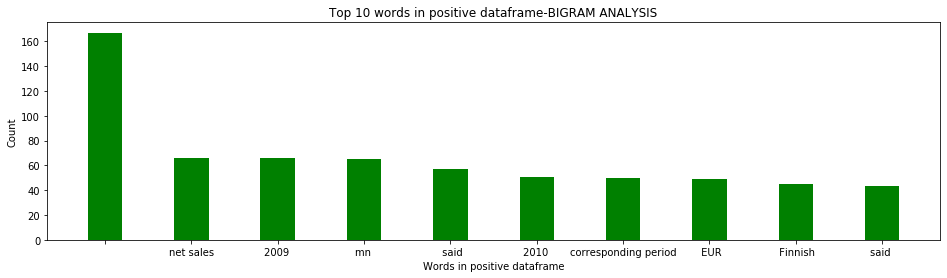

In [77]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1bi,pd2bi, color ='green',width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-BIGRAM ANALYSIS")
plt.savefig("positive-bigram.png")
plt.show()

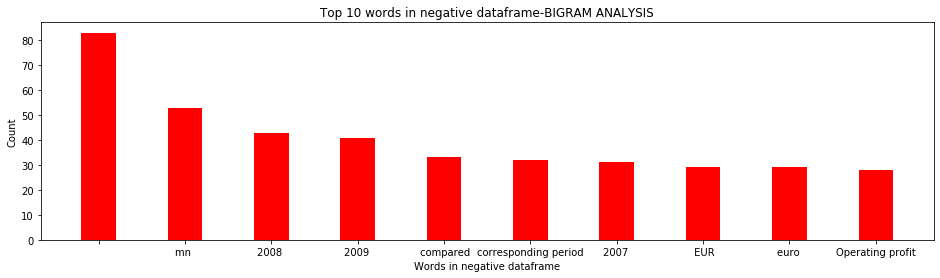

In [78]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1bi,ned2bi, color ='red',
        width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-BIGRAM ANALYSIS")
plt.savefig("negative-bigram.png")
plt.show()

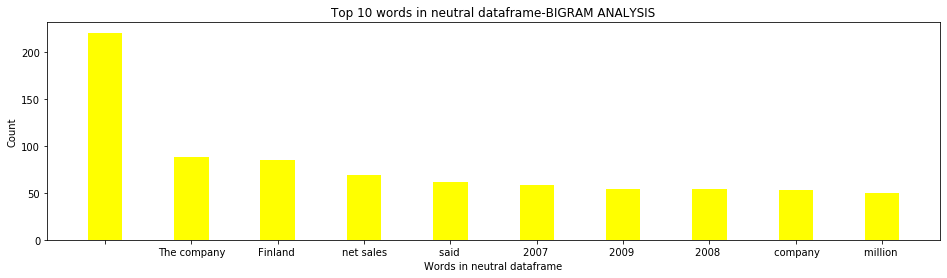

In [79]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1bi,nud2bi, color ='yellow',
        width = 0.4)
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-BIGRAM ANALYSIS")
plt.savefig("neutral-bigram.png")
plt.show()

In [80]:
positiveValues3=defaultdict(int)
negativeValues3=defaultdict(int)
neutralValues3=defaultdict(int)


In [81]:
#get the count of every word in both the columns of df_train and df_test dataframes
for text in df_train[df_train.sentiment=="positive"].news:
  for word in generate_N_grams(text,3):
    positiveValues3[word]+=1

Sentence after removing stopwords: ['Net', 'cash', 'flow', 'operations', 'expected', 'remain', 'positive', '']
Sentence after removing stopwords: ['', 'They', 'would', 'invest', 'physical', 'infrastructure', '', 'would', 'also', 'provide', 'knowhow', 'managing', 'developing', 'science', 'technology', 'parks', '', '', 'said', 'Sunrise', 'Valley', 'director', 'Andrius', 'Bagdonas', '']
Sentence after removing stopwords: ['', 'Overall', '', 'pleased', 'startup', 'curve', '', 'pleased', 'quality', 'paper', '', '', 'Stora', 'spokeswoman', 'Patricia', 'Dietz', 'said', 'Tuesday', '']
Sentence after removing stopwords: ['Both', 'net', 'sales', 'operating', 'profit', 'record', 'high', 'company', 'history', '']
Sentence after removing stopwords: ['Combining', 'deep', 'domain', 'expertise', 'Application', 'Service', 'Management', 'ASM', 'outsourcing', 'service', 'offerings', 'proved', 'winning', 'combination', '']
Sentence after removing stopwords: ['Finnish', 'KCI', 'Konecranes', 'awarded', 'ord

Sentence after removing stopwords: ['In', 'January', '', 'traffic', '', 'measured', 'revenue', 'passenger', 'kilometres', 'RPK', '', 'went', '32', '', 'capacity', '', 'measured', 'available', 'seat', 'kilometres', 'ASK', '', 'rose', '122', '', '']
Sentence after removing stopwords: ['EPS', 'continuing', 'operations', 'came', '030', 'eur', '', '017', '']
Sentence after removing stopwords: ['It', 'also', 'turned', 'earnings', 'per', 'share', '', 'EPS', '', 'EUR', '008', 'versus', 'loss', 'per', 'share', 'EUR', '004', '']
Sentence after removing stopwords: ['Key', 'shareholders', 'Finnish', 'IT', 'services', 'provider', 'TietoEnator', 'Oyj', 'Friday', 'rejected', 'hostile', 'EUR1', '08', 'billion', '', '167', 'billion', 'offer', 'buyout', 'shop', 'Nordic', 'Capital', '', 'giving', 'new', 'life', 'possible', 'counter', 'offer', 'Blackstone', 'Group', 'LP', 'Norwegian', 'telecom', 'Telenor', 'ASA', '']
Sentence after removing stopwords: ['Kesko', 'pursues', 'strategy', 'healthy', '', 'focus

Sentence after removing stopwords: ['', 'The', 'Government', 'professional', 'approach', 'assessing', 'offer', '']
Sentence after removing stopwords: ['comparable', 'operating', 'profit', 'totaled', 'EUR', '854mn', '', 'EUR', '730mn', '2004', '']
Sentence after removing stopwords: ['', 'Several', 'growth', 'initiatives', 'chosen', 'geographic', 'areas', 'already', 'ongoing', '', '', 'continued', '', 'noting', 'Lindex', 'opened', 'first', 'store', 'Czech', 'Republic', 'autumn', 'Brno', '']
Sentence after removing stopwords: ['Finnish', 'investment', 'group', 'Panostaja', 'Oyj', 'said', 'net', 'profit', 'went', '86', 'mln', 'euro', '', '114', 'mln', 'fiscal', '200506', '', 'ended', 'October', '31', '', '2006', '', '28', 'mln', 'euro', '', '37', 'mln', 'period', 'fiscal', '200405', '']
Sentence after removing stopwords: ['Performance', 'second', 'half', '2009', 'exceeded', 'expectations', '']
Sentence after removing stopwords: ['The', 'annual', 'Thesis', 'contest', 'aimed', 'enhance', 'th

Sentence after removing stopwords: ['As', 'result', '', 'Russia', 'import', 'restrictions', 'Finnish', 'dairy', 'companies', 'canceled', '6', 'August', '2010', '']
Sentence after removing stopwords: ['Both', 'operating', 'profit', 'turnover', 'threemonth', 'period', 'increased', '', 'respectively', 'EUR0', '9', 'EUR8', '3', '', 'compared', 'corresponding', 'period', '2005', '']
Sentence after removing stopwords: ['OctoberDecember', 'sales', '302', 'mln', 'eur', '', '253', 'pct', 'increase', 'year', 'year', '']
Sentence after removing stopwords: ['Poyry', 'recognized', 'one', 'world', 'leading', 'advisors', 'global', 'forestry', 'industry', '']
Sentence after removing stopwords: ['The', 'iTunesbased', 'material', 'accessible', 'Windowsbased', 'Macintosh', 'computers', 'transferable', 'portable', 'devices', '', 'including', 'Apple', 'iPods', '']
Sentence after removing stopwords: ['', 'We', 'lowest', 'bidders', 'final', 'approval', 'awaited', '', '']
Sentence after removing stopwords: ['

Sentence after removing stopwords: ['Q1', '2010', '18', 'May', '2010', '', 'Finnish', 'electrical', 'components', 'maker', 'Salcomp', 'Oy', '', 'HEL', '', 'SAL1V', '', 'said', 'today', 'turned', 'net', 'profit', 'EUR1', '6', 'first', 'quarter', '2010', 'versus', 'loss', 'EUR2m', 'corresponding', 'period', 'last', 'year', '']
Sentence after removing stopwords: ['Profit', 'per', 'share', 'EUR', '103', '', 'EUR', '087', '']
Sentence after removing stopwords: ['The', 'company', 'estimates', 'trend', 'demand', 'sports', 'equipment', 'steady', '2006', '', '', 'Amer', 'report', 'said', '']
Sentence after removing stopwords: ['Finnish', 'silicon', 'wafer', 'technology', 'company', 'Okmetic', 'Oyj', '', 'OMX', 'Helsinki', '', 'OKM1V', '', 'reported', 'Thursday', '', '7', 'August', '', 'operating', 'profit', 'EUR5', '3', 'period', 'JanuaryJune', '2008', '', 'EUR3', '3', 'corresponding', 'period', '2007', '']
Sentence after removing stopwords: ['With', 'CapMan', 'partner', '', 'able', 'develop', 

Sentence after removing stopwords: ['Under', 'contract', 'Cramo', 'Sverige', 'subcontractor', 'Brinkab', 'AB', 'provide', 'scaffolding', 'installations', 'LKAB', 'new', 'pellets', 'plant', 'Kiruna', 'northern', 'Sweden', '']
Sentence after removing stopwords: ['The', 'pipeline', 'strong', '']
Sentence after removing stopwords: ['Consumption', 'forecast', 'grow', '2', '', '']
Sentence after removing stopwords: ['The', 'negotiations', 'carried', 'constructive', 'manner', '', 'parties', 'tried', 'find', 'solution', 'situation', '']
Sentence after removing stopwords: ['Of', 'sales', 'price', '', 'sales', 'gain', '31', 'mln', 'euro', '', '', '45', 'mln', '', 'recognized', 'Incap', 'earnings', '2007', '']
Sentence after removing stopwords: ['UPMKymmene', 'generated', 'four', 'consecutive', 'quarters', 'positive', 'Free', 'Cash', 'Flow', '']
Sentence after removing stopwords: ['Kaido', 'Kaare', '', 'general', 'director', 'Atria', 'Eesti', '', 'says', 'company', 'investments', 'upgrade', 'pig'

Sentence after removing stopwords: ['Net', 'sales', 'rose', '255', '', 'yearonyear', 'EUR59', '6', '', 'number', 'chargers', 'delivered', 'went', '41', '', '659', 'million', 'pieces', '']
Sentence after removing stopwords: ['It', 'also', 'said', 'third', 'quarter', 'diluted', 'EPS', 'came', '034', 'eur', 'compared', '016', 'eur', 'quarter', 'year', 'ago', '']
Sentence after removing stopwords: ['Operating', 'profit', 'threemonth', 'period', 'increased', 'EUR1', '2', '', 'revenue', 'increased', 'EUR20', '2', '', 'compared', 'corresponding', 'period', '2005', '']
Sentence after removing stopwords: ['Kai', 'Tulonen', '', 'Chief', 'Technology', 'Officer', '', 'SysOpen', 'Digia', 'says', '', '', 'We', 'using', 'Corporate', 'Phonebook', 'inside', 'SysOpen', 'Digia', 'extensively', 'since', 'last', 'fall', '', 'satisfied', 'results', '']
Sentence after removing stopwords: ['Finnish', 'Bank', 'land', 'reports', 'operating', 'profit', 'rose', 'EUR', '213', 'mn', 'second', 'quarter', '2009', 'EU

Sentence after removing stopwords: ['Finnish', 'fibers', 'plastic', 'products', 'maker', 'Suominen', 'Corporation', 'said', 'net', 'loss', 'continuing', 'operations', 'narrowed', '18', 'mln', 'euro', '', '', '23', 'mln', '', '2006', '37', 'mln', 'euro', '', '', '48', 'mln', '', '2005', '']
Sentence after removing stopwords: ['Operating', 'profit', 'margin', 'increased', '112', '', '117', '', '']
Sentence after removing stopwords: ['In', 'recent', 'months', '', 'Capman', 'taken', 'significant', 'steps', 'simplify', 'operations', '', 'CEO', 'Lennart', 'Simonsen', 'said', '']
Sentence after removing stopwords: ['On', 'Wednesday', 'announced', 'government', 'would', 'propose', 'granting', 'licence', 'two', 'reactors', '', 'one', 'built', 'Fennovoima', '', 'TVO', '']
Sentence after removing stopwords: ['Instead', '', 'Elcoteq', 'signed', 'nonbinding', 'Letter', 'Intent', 'another', 'Asian', 'strategic', 'investor', '']
Sentence after removing stopwords: ['Profit', 'taxes', 'EUR', '01', 'mn'

Sentence after removing stopwords: ['SOUTHFIELD', '', 'Mich', '', 'Central', 'Corporate', 'Credit', 'Union', 'distribute', 'patronage', 'dividends', 'members', 'waiving', 'service', 'fees', 'incurred', 'months', 'July', 'November', '2008', '', 'tune', 'estimated', '', '1', 'million', '']
Sentence after removing stopwords: ['Kesko', 'Agro', 'Eesti', '', 'retailer', 'wholesaler', 'grain', '', 'agricultural', 'warehousing', 'machinery', 'accessories', '', 'net', 'sales', '81', 'million', 'euros', '2007', '', 'increase', 'onetenth', 'preceding', 'year', '']
Sentence after removing stopwords: ['In', 'December', 'alone', '', 'members', 'Lithuanian', 'Brewers', '', 'Association', 'sold', 'total', '203', 'million', 'liters', 'beer', '', 'increase', '19', 'percent', 'sales', '1992', 'million', 'liters', 'December', '2004', '']
Sentence after removing stopwords: ['The', '2015', 'target', 'net', 'sales', 'set', 'EUR', '1bn', 'target', 'return', 'investment', '20', '', '']
Sentence after removing 

Sentence after removing stopwords: ['Operating', 'profit', 'rose', 'EUR', '135', 'mn', 'EUR', '97', 'mn', 'corresponding', 'period', '2006', '']
Sentence after removing stopwords: ['The', 'refining', 'margin', 'year', '', '1339', '', 'bbl', '', 'compared', '', '1046', '', 'bbl', 'prior', 'year', '']
Sentence after removing stopwords: ['Finnish', 'metal', 'industry', 'solutions', 'supplier', 'Outotec', 'Oyj', 'net', 'profit', 'rose', '504', 'mln', 'euro', '', '', '725', 'mln', '', 'first', 'nine', 'months', '2007', '201', 'mln', 'euro', '', '', '289', 'mln', '', 'period', '2006', '']
Sentence after removing stopwords: ['Cash', 'flow', 'operations', 'rose', 'EUR', '527', 'mn', 'EUR', '156', 'mn', '2007', '']
Sentence after removing stopwords: ['Global', 'Banking', 'News', '', '28', 'September', '2010', 'Tieto', 'Corporation', 'Pohjola', 'Bank', '', 'PINK', '', 'POJLF', '', 'cooperate', 'SWIFT', 'services', '']
Sentence after removing stopwords: ['Ragutis', '', 'controlled', 'Finnish', 'b

Sentence after removing stopwords: ['Lithuanian', 'beer', 'makers', 'sold', '25688', 'million', 'liters', 'beer', '2005', '', 'rise', '45', 'per', 'cent', 'yearearlier', 'figure', '24592', 'million', 'liters', '']
Sentence after removing stopwords: ['', 'We', 'significant', 'experience', 'smartphone', 'functionality', '', 'development', 'mobile', 'Internet', 'services', '', 'uniting', 'two', 'smooth', 'user', 'experience', '']
Sentence after removing stopwords: ['Airvana', 'UMTS', 'Home', 'Base', 'Station', 'femto', 'cell', 'uses', 'softwarebased', 'functionality', 'offtheshelf', 'silicon', 'accelerate', 'feature', 'development', 'reduce', 'product', 'cost', '']
Sentence after removing stopwords: ['The', 'launch', 'plant', 'June', 'went', 'well', '', 'producing', 'advanced', 'fuel', 'couple', 'weeks', '']
Sentence after removing stopwords: ['', 'Very', 'recommendable', '', 'Nokian', 'Z', 'G2', 'according', '', 'ADAC', 'judgement', '', 'latest', 'summer', 'tyre', 'test', 'German', 'auto

Sentence after removing stopwords: ['Paper', 'maker', 'Stora', 'Enso', 'Oyj', 'said', 'Friday', 'acquitted', 'charges', 'participated', 'paper', 'pricefixing', 'conspiracy', 'United', 'States', '']
Sentence after removing stopwords: ['Vacon', 'cash', 'flow', 'operations', 'grew', 'EUR', '371', 'mn', 'EUR', '219', 'mn', 'year', 'ago', '']
Sentence after removing stopwords: ['Upgrades', 'include', 'five', 'megapixel', 'camera', '', 'voice', 'control', '', 'looks', 'optical', 'mouse', 'instead', 'Dpad', '', 'upgrade', 'clickhappy', 'S60', 'needed', 'forever', '']
Sentence after removing stopwords: ['', 'We', 'proud', 'contribute', 'creation', 'worldclass', 'airport', 'facility', 'KONE', 'innovative', 'People', 'Flow', 'TM', 'solutions', '']
Sentence after removing stopwords: ['', 'We', 'pleased', 'efforts', 'negotiating', 'teams', 'look', 'forward', 'productive', 'four', 'years', 'ahead', '', '']
Sentence after removing stopwords: ['The', 'world', 'biggest', 'magazine', 'paper', 'maker', 

Sentence after removing stopwords: ['Aspo', 'Plc', 'STOCK', 'EXCHANGE', 'RELEASE', 'February', '11', '', '2011', 'at8', '45', 'ESL', 'Shipping', 'Ltd', '', 'part', 'Aspo', 'Group', '', 'signed', 'new', '', 'longterm', 'contract', 'Rautaruukki', 'Corporation', 'marine', 'transport', 'raw', 'materials', 'Baltic', 'Sea', '']
Sentence after removing stopwords: ['GeoSentric', 'Oyj', 'GeoSolutions', 'Business', 'Unit', 'GyPSii', '', 'mobile', 'digital', 'lifestyle', 'application', 'geomobility', 'social', 'networking', 'platform', '', 'signed', 'agreement', 'Nanjing', 'MyNet', 'make', 'GyPSii', 'mobile', 'social', 'networking', 'platform', 'available', 'customers', 'China', 'Mobile', '']
Sentence after removing stopwords: ['The', 'seminar', 'introduced', 'modern', '', 'clean', 'technologies', 'products', '', 'financial', 'tools', 'sponsorship', 'programs', 'energy', 'environment', 'projects', 'well', 'potential', 'develop', 'clean', 'energy', 'Vietnam', '']
Sentence after removing stopwords:

Sentence after removing stopwords: ['', 'We', 'pleased', 'working', 'Fujitsu', 'NTT', 'DoCoMo', 'advance', 'progress', 'LTE', '', '', 'said', 'Juergen', 'Walter', '', 'Head', 'Converged', 'Core', '', 'Nokia', 'Siemens', 'Networks', '']
Sentence after removing stopwords: ['', 'Filippova', '', 'A', 'trilateral', 'agreement', 'investment', 'construction', 'technology', 'park', 'St', 'Petersburg', 'signed', 'course', 'forum', '', 'Days', 'Russian', 'Economy', '', 'opened', 'Helsinki', 'today', '']
Sentence after removing stopwords: ['The', 'expansion', 'includes', 'doubling', 'floor', 'space', 'addition', 'lifting', 'capacity', 'production', 'equipment', '']
Sentence after removing stopwords: ['Sales', 'came', '241', 'mln', 'eur', '', 'compared', '2114', 'mln', '', 'also', 'beating', 'consensus', 'forecasts', '235', 'mln', 'eur', '']
Sentence after removing stopwords: ['Technical', 'indicators', 'stock', 'bullish', 'SP', 'gives', 'NOK', 'positive', '4', 'STARS', '5', 'buy', 'ranking', '']


Sentence after removing stopwords: ['ADP', 'News', '', 'Nov', '18', '', '2008', '', 'Finnish', 'AC', 'drives', 'manufacturer', 'Vacon', 'Oyj', 'OMX', '', 'VAC1V', 'said', 'today', 'set', 'new', 'representative', 'offices', 'Romania', 'Ukraine', 'serve', 'growing', 'markets', 'eastern', 'southeastern', 'Europe', '']
Sentence after removing stopwords: ['Net', 'sales', 'went', '1', '', 'yearonyear', 'EUR', '29', 'million', '', 'affected', 'business', 'acquisitions', '', 'realized', 'previous', 'financial', 'period', '', 'effect', 'EUR', '51', 'million', 'review', 'period', '']
Sentence after removing stopwords: ['After', 'transaction', '', 'Alma', 'Media', 'raised', 'stake', 'Talentum', '3065', '', 'shares', '3112', '', 'voting', 'rights', '']
Sentence after removing stopwords: ['The', 'company', 'net', 'profit', 'rose', '114', '', 'year', '822', 'million', 'euros', '2005', 'sales', '6865', 'million', 'euros', '', '138', '', 'year', '', 'company', 'said', 'earlier', '']
Sentence after rem

Sentence after removing stopwords: ['', 'This', 'win', 'OEMs', 'targeting', 'develop', 'WiMAX', 'products', '']
Sentence after removing stopwords: ['Mreal', 'Corporation', 'Press', 'release', '3', 'November', '1035', 'Mreal', 'Corporation', 'second', 'best', 'company', 'materials', 'sector', 'including', 'eg', 'forest', 'industry', 'companies', 'Carbon', 'Disclosure', 'Leadership', 'Index', 'CDLI', '', 'Nordic', 'Report', '2009', '']
Sentence after removing stopwords: ['This', 'much', 'better', 'process', 'using', 'virgin', 'paper', 'requires', 'less', 'transportation', 'wood', 'pulp', 'places', 'like', 'Finland', 'Canada', '']
Sentence after removing stopwords: ['In', '2009', '', 'Fiskars', '', 'cash', 'flow', 'operating', 'activities', 'amounted', 'EUR121m', '', 'EUR97m', 'previous', 'year', '']
Sentence after removing stopwords: ['Technopolis', 'St', 'Petersburg', 'government', 'signed', 'cooperation', 'memorandum', 'October', '2005', 'set', 'technopark', 'Neudorf', 'production', 'z

Sentence after removing stopwords: ['28', 'October', '2010', '', 'Finnish', 'wood', 'products', 'technology', 'supplier', 'Raute', 'Oyj', 'HEL', '', 'RUTAV', 'said', 'today', 'swung', 'net', 'profit', 'EUR3m', 'first', 'nine', 'months', '2010', 'versus', 'net', 'loss', 'EUR5', '2', 'period', 'year', 'earlier', '']
Sentence after removing stopwords: ['Altia', 'operating', 'profit', 'jumped', 'EUR', '47', 'million', 'EUR', '66', 'million', '']
Sentence after removing stopwords: ['Operating', 'profit', 'rose', 'EUR', '47', 'mn', 'EUR', '46', 'mn', '']
Sentence after removing stopwords: ['Finland', 'leading', 'metals', 'group', 'Outokumpu', 'said', 'fourthquarter', 'net', 'profit', 'tripled', 'back', 'strong', 'global', 'demand', 'stainless', 'steel', '', 'soaring', 'base', 'metal', 'prices', 'proceeds', 'sale', 'technology', 'unit', '']
Sentence after removing stopwords: ['', 'The', 'second', 'quarter', '2010', 'firstquarter', 'growth', 'net', 'sales', 'since', 'third', 'quarter', 'of2008

Sentence after removing stopwords: ['The', 'Nokian', 'tyre', 'proves', 'high', 'safety', 'excellently', 'important', 'driving', 'qualities', 'stability', 'mark', '14', '', 'handling', '15', 'braking', 'wet', 'road', '19', '']
Sentence after removing stopwords: ['For', 'Q2', '2010', '', 'consolidated', 'earnings', 'tax', 'totaled', 'EUR4', '5', '', 'compared', 'EUR3', '9', '', 'net', 'profit', 'EUR3', '2', '', 'compared', 'EUR2', '9', 'previous', 'year', '']
Sentence after removing stopwords: ['Fiskars', '', '360yearold', 'global', 'business', 'best', 'known', 'orangehandled', 'scissors', '', 'expects', 'derive', 'synergies', 'EUR5', 'million', 'year', 'consolidating', 'certain', 'parts', 'housewares', 'division', 'two', 'compete', '']
Sentence after removing stopwords: ['', 'In', 'newly', 'formed', 'company', 'YIT', 'Stavo', 'local', 'contact', 'network', '', 'expertise', 'market', 'know', 'Euro', 'Stavokonsult', 'combined', 'YIT', 'housing', 'concept', '', '', 'said', 'Juha', 'Kostiai

Sentence after removing stopwords: ['Ragutis', '', 'controlled', 'Finnish', 'brewery', 'Olvi', '', 'achieved', '57', 'percent', 'rise', 'beer', 'sales', '226', 'million', 'liters', 'held', '1075', 'percent', 'market', 'share', '']
Sentence after removing stopwords: ['16', 'February', '2011', '', 'Finnish', 'industrial', 'machinery', 'company', 'Metso', 'Oyj', '', 'HEL', '', 'MEO1V', '', 'said', 'today', 'deliver', 'minerals', 'processing', 'equipment', 'basic', 'engineering', 'Canadian', 'miner', 'Northland', 'Resources', '', 'OSL', '', 'NAUR', '', '', 'TSE', '', 'NAU', '', '']
Sentence after removing stopwords: ['Finnish', 'consumer', 'packaging', 'manufacturer', 'Huhtamaki', 'Oyj', 'said', 'swung', 'net', 'profit', '841', 'mln', 'euro', '', '1056', 'mln', 'first', 'nine', 'months', '2006', 'net', 'loss', '26', 'mln', 'euro', '', '33', 'mln', 'period', '2005', '']
Sentence after removing stopwords: ['Precedex', 'approved', 'IV', 'sedation', 'initially', 'intubated', 'mechanically', 'v

Sentence after removing stopwords: ['However', '', 'total', 'orders', 'received', 'still', 'last', 'year', 'levels', '']
Sentence after removing stopwords: ['The', 'divestment', 'line', 'company', 'plans', 'focus', 'selected', 'growth', 'segments', 'streamline', 'corporate', 'structure', '', 'company', 'explained', '']
Sentence after removing stopwords: ['Commencing', 'construction', 'works', 'Pearl', 'Plaza', 'significant', 'step', 'Russian', 'projects', '']
Sentence after removing stopwords: ['Forestries', 'also', 'higher', '', 'driven', 'yesterday', 'bullish', 'analyst', 'comment', 'Stora', 'Enso', 'Dagens', 'Industri', '', 'dealers', 'said', '']
Sentence after removing stopwords: ['The', 'announced', 'restructuring', 'significantly', 'decrease', 'Company', 'indebtedness', '']
Sentence after removing stopwords: ['Thanks', 'wide', 'contact', 'network', 'good', 'knowledge', 'market', 'business', 'environment', '', 'give', 'great', 'contribution', 'development', 'Indian', 'operations',

Sentence after removing stopwords: ['It', 'combine', 'renew', 'contents', 'functionality', 'current', 'systems', 'funding', 'online', 'service', 'well', 'maintenance', '']
Sentence after removing stopwords: ['It', 'estimates', 'operating', 'profit', 'improve', 'third', 'quarter', '']
Sentence after removing stopwords: ['Operating', 'result', 'including', 'nonrecurring', 'items', 'rose', 'EUR', '146mn', 'loss', 'EUR', '267mn', '2009', '']
Sentence after removing stopwords: ['MD', 'Henning', 'Bahr', 'Stockmann', 'Gruppen', 'praises', 'trend', '', 'since', 'chains', 'become', 'stronger', 'decisionmaking', 'processes', 'clear', '']
Sentence after removing stopwords: ['Nokia', 'controls', '50', 'percent', 'phone', 'sales', 'India', 'Africa', '', 'strong', 'prosition', 'emerging', 'markets', '']
Sentence after removing stopwords: ['Finnish', 'Metso', 'Paper', 'order', 'supply', 'uncoated', 'fine', 'paper', 'machine', 'MCC', 'Paper', 'Yinhe', '', 'China', '']
Sentence after removing stopwords

In [82]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].news:
  for word in generate_N_grams(text,3):
    negativeValues3[word]+=1

Sentence after removing stopwords: ['Group', 'EBIT', 'first', 'half', 'EUR13', '6', 'US', '178', '', 'falling', 'short', 'EUR22', '5', 'posted', 'period', '2009', '']
Sentence after removing stopwords: ['Operating', 'profit', '', 'excluding', 'nonrecurring', 'items', '', 'totalled', 'EUR', '10', 'mn', '', 'EUR', '16', 'mn', '']
Sentence after removing stopwords: ['In', 'addition', '', '29', 'employees', 'laid', 'notice', 'whole', 'workforce', 'laid', 'short', 'periods', 'needed', '']
Sentence after removing stopwords: ['Compared', 'FTSE', '100', 'index', '', 'rose', '367', 'points', '', '06', '', '', 'day', '', 'relative', 'price', 'change', '02', '', '']
Sentence after removing stopwords: ['A', 'survey', 'conducted', 'Taloustutkimus', 'Sampo', 'Life', 'shows', 'companies', 'badly', 'prepared', 'losing', 'key', 'staff', 'members', '']
Sentence after removing stopwords: ['Cencorp', 'net', 'sales', 'first', 'quarter', 'estimated', 'EUR091', '2', '', 'compared', 'EUR4', '5', 'first', 'qua

Sentence after removing stopwords: ['Finnish', 'glass', 'technology', 'company', 'Glaston', 'Oyj', 'Abp', 'net', 'profit', 'decreased', '26', 'mln', 'euro', '', '', '38', 'mln', '', 'first', 'nine', 'months', '2007', '78', 'mln', 'euro', '', '', '114', 'mln', '', 'period', '2006', '']
Sentence after removing stopwords: ['Operating', 'profit', 'continuing', 'operations', 'fell', 'EUR', '483', 'mn', 'EUR', '724', 'mn', 'first', 'half', '2007', '']
Sentence after removing stopwords: ['In', 'JulySeptember', '2009', '', 'Konecranes', '', 'sales', 'decreased', 'EUR', '3687', 'mn', 'EUR', '5204', 'mn', 'JulySeptember', '2008', '']
Sentence after removing stopwords: ['The', 'number', 'bodily', 'injury', 'cases', 'quadrupled', '20002006', '']
Sentence after removing stopwords: ['Scanfil', '', 'systems', 'supplier', 'contract', 'manufacturer', 'communications', 'sector', '', 'start', 'personnel', 'negotiations', 'Oulu', '', 'Finland', '', 'lay', 'staff', 'temporarily', '']
Sentence after removin

Sentence after removing stopwords: ['Net', 'sales', 'Finnish', 'Sanoma', 'Learning', '', 'Literature', '', 'Finnish', 'media', 'group', 'Sanoma', '', 'decreased', '36', '', 'JanuaryJune', '2009', 'totalling', 'EUR', '1628', 'mn', '', 'EUR', '1688', 'mn', 'corresponding', 'period', '2008', '']
Sentence after removing stopwords: ['Consolidated', 'operating', 'profit', 'continuing', 'operations', 'decreased', '623', '', 'EUR', '512', 'mn', 'EUR', '1357', 'mn', '2007', '']
Sentence after removing stopwords: ['Operating', 'profit', 'totalled', 'EUR', '122', 'mn', '', 'EUR', '356', 'mn', 'first', 'quarter', '2008', '']
Sentence after removing stopwords: ['That', 'I', 'go', 'bed', 'worrying', 'every', 'night', '', '', 'said', '']
Sentence after removing stopwords: ['Small', 'investors', 'voiced', 'fears', 'shares', 'end', 'risk', 'investors', '']
Sentence after removing stopwords: ['The', 'current', 'reference', 'grade', 'instruments', 'challenging', 'operate', 'due', 'high', 'price', 'comple

Sentence after removing stopwords: ['Finnish', 'Bank', 'land', 'reports', 'operating', 'profit', 'EUR', '22', 'mn', 'first', 'quarter', '2010', '', 'EUR', '63', 'mn', 'corresponding', 'period', '2009', '']
Sentence after removing stopwords: ['Myllykoski', '', 'one', 'paper', 'plant', 'Finland', '', 'one', 'US', 'three', 'Germany', '', 'revenues', 'EUR286m', 'first', 'half', '2010', 'operating', 'loss', 'EUR12m', '', 'Reuters', 'said', '']
Sentence after removing stopwords: ['TietoEnator', '113', 'pct', '1838', '', 'extending', 'recent', 'lows', 'last', 'week', 'secondquarter', 'report', '', 'dealers', 'said', '']
Sentence after removing stopwords: ['', 'There', 'issue', 'thieves', 'stealing', 'building', 'sites', '', '', 'said', 'Mr', 'Smith', '']
Sentence after removing stopwords: ['Operating', 'profits', 'half', '', '08', '', '', '09', 'Glisten', 'invested', 'brand', 'management', 'team', '']
Sentence after removing stopwords: ['Hobby', 'Hall', 'sales', 'decrease', '26', 'pct', 'due'

Sentence after removing stopwords: ['Operating', 'profit', '12month', 'period', 'decreased', 'EUR28', '2', 'net', 'turnover', 'increased', 'EUR313', '42', '', 'compared', 'financial', 'year', '2004', '']
Sentence after removing stopwords: ['The', 'fair', 'value', 'company', 'investment', 'properties', 'went', 'EUR2', '769', 'bn', 'end', 'September', '2009', 'EUR2', '878', 'bn', 'year', 'earlier', '']
Sentence after removing stopwords: ['', 'ADP', 'News', '', '', 'Jan', '22', '', '2009', '', 'Finnish', 'mobile', 'phones', 'maker', 'Nokia', 'Oyj', '', 'OMX', '', 'NOK1V', '', 'said', 'today', 'operating', 'profit', 'decreased', 'EUR', '5', 'billion', '', 'USD', '65', 'bn', '', '2008', 'EUR', '8', 'billion', '2007', '']
Sentence after removing stopwords: ['As', 'result', '20', 'persons', 'longer', 'needed', '']
Sentence after removing stopwords: ['2009', '3', 'February', '2010', '', 'Finlandbased', 'steel', 'maker', 'Rautaruukki', 'Oyj', '', 'HEL', '', 'RTRKS', '', '', 'Ruukki', '', 'said'

Sentence after removing stopwords: ['Net', 'profit', 'three', 'months', 'March', '31', 'fell', '', '', 'x20ac', '', '103', 'million', '', 'US', '165', 'million', '', '', '', 'x20ac', '', '131', 'million', 'year', 'earlier', '', 'Finnish', 'company', 'said', '']
Sentence after removing stopwords: ['We', 'also', 'cut', 'price', 'projections', 'paper', 'packaging', '', '', 'analyst', 'Goldman', 'Sachs', 'said', 'note', 'Monday', '']
Sentence after removing stopwords: ['Operating', 'loss', 'amounted', 'EUR', '07', 'mn', 'compared', 'profit', 'EUR', '08', 'mn', 'second', 'quarter', '2005', '']
Sentence after removing stopwords: ['Danish', 'company', 'FLSmidth', 'acknowledged', 'violated', 'patent', 'held', 'Finnish', 'Metso', '']
Sentence after removing stopwords: ['The', 'company', 'said', 'comparable', 'operating', 'profit', 'JanuaryJune', 'period', 'fell', 'short', 'last', 'year', 'corresponding', 'performance', '']
Sentence after removing stopwords: ['ADPnews', '', 'Feb', '5', '', '2010

Sentence after removing stopwords: ['The', 'majority', 'company', 'personnel', 'Finland', 'temporarily', 'laid', 'one', 'six', 'weeks', 'period', 'February', 'June', '2009', 'period', '']
Sentence after removing stopwords: ['The', 'OMX', 'Nordic', '40', 'OMXN40', 'index', '', 'comprising', '40', 'traded', 'Nordic', 'stocks', 'Nasdaq', 'OMX', 'exchange', '', 'closed', '087', '', '106414', 'points', 'Thursday', '']
Sentence after removing stopwords: ['Raw', 'materials', 'prices', 'surged', 'past', 'year', '', 'fueled', 'part', 'rapid', 'industrialization', 'China', '', 'India', 'developing', 'nations', '']
Sentence after removing stopwords: ['Finnish', 'Suominen', 'Corporation', 'makes', 'wipes', '', 'nonwovens', '', 'flexible', 'packaging', '', 'expects', 'changes', 'market', 'situation', 'reduce', 'sales', 'Suominen', 'nonwovens', 'wet', 'wipes', 'previously', 'estimated', 'volumes', '']
Sentence after removing stopwords: ['Jul', '18', '', 'Police', 'looking', 'man', 'say', 'terrorized

Sentence after removing stopwords: ['Profit', 'period', 'totalled', 'EUR', '11', 'mn', '', 'EUR', '16', 'mn', 'third', 'quarter', '2008', '']
Sentence after removing stopwords: ['However', '', 'suspect', 'stole', 'burgundy', 'Nissan', 'Altima', '']
Sentence after removing stopwords: ['Layoffs', 'also', 'take', 'place', 'Suomussalmi', 'Kuhmo', 'plants', 'autumn', 'result', 'codetermination', 'negotiations', 'held', '']
Sentence after removing stopwords: ['According', 'company', '', 'staff', 'laid', 'temporarily', 'necessary', '']
Sentence after removing stopwords: ['Operating', 'profit', 'fell', 'EUR', '2326', 'mn', 'EUR', '3286', 'mn', '']
Sentence after removing stopwords: ['Finnish', 'retail', 'software', 'developer', 'Aldata', 'Solution', 'Oyj', 'reported', 'net', 'loss', '117', 'mln', 'euro', '', '172', 'mln', '2007', 'versus', 'net', 'profit', '25', 'mln', 'euro', '', '37', 'mln', '2006', '']
Sentence after removing stopwords: ['The', 'SeaWind', 'en', 'route', 'Finnish', 'port', '

Sentence after removing stopwords: ['In', 'JanuaryNovember', '2009', '', 'group', 'sales', 'totalled', 'EUR', '78017', 'mn', '', 'drop', '126', '', 'period', '2008', '']
Sentence after removing stopwords: ['UPM', 'said', 'move', 'lower', 'net', 'profit', '', 'x20ac', '385', 'million', 'US', '520', 'million', 'second', 'quarter', '', 'mainly', 'due', 'impairment', 'charges', '']
Sentence after removing stopwords: ['Loss', 'financial', 'items', 'totalled', 'EUR', '97', 'mn', '', 'compared', 'profit', 'EUR', '13', 'mn', 'corresponding', 'period', '2008', '']
Sentence after removing stopwords: ['Antti', 'Orkola', '', 'president', 'Kemira', 'GrowHow', 'Industrial', 'Solutions', 'unit', '', 'told', 'Thomson', 'Financial', 'News', 'company', 'put', 'opening', 'mine', 'prices', 'phosphate', '', 'quite', 'depressed', 'long', 'time', '', '', '']
Sentence after removing stopwords: ['Paper', 'companies', 'negative', 'territories', '', 'Stora', 'Enso', 'R', 'shedding', '162', 'pct', '1273', 'eur', 

In [83]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].news:
  for word in generate_N_grams(text,3):
    neutralValues3[word]+=1#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues

Sentence after removing stopwords: ['Metso', 'global', 'supplier', 'sustainable', 'technology', 'services', 'mining', '', 'construction', '', 'power', 'generation', '', 'automation', '', 'recycling', 'pulp', 'paper', 'industries', '']
Sentence after removing stopwords: ['Dopplr', 'members', 'share', 'personal', 'business', 'travel', 'plans', 'privately', 'networks', '', 'highlight', 'interesting', 'places', 'stay', '', 'eat', 'explore', 'cities', 'around', 'world', '']
Sentence after removing stopwords: ['ALEXANDRIA', '', 'Va', '', 'July', '11', '', 'Hannu', 'Kahonen', 'Juuka', '', 'Finland', '', 'developed', 'ornamental', 'design', 'handle', 'fire', 'pit', 'door', '', 'US', 'Patent', '', 'Trademark', 'Office', 'announced', '']
Sentence after removing stopwords: ['According', 'product', 'manager', 'Lassi', 'Hietanen', '', 'building', 'power', 'plant', 'burns', 'mixed', 'waste', 'Helsinki', 'may', 'good', 'idea', 'reduces', 'production', 'combined', 'power', 'plants', 'using', 'natural'

Sentence after removing stopwords: ['', 'I', 'trying', 'deal', 'slavery', 'different', 'perspective', 'balance', 'story', '', '', 'says', 'DeRamus', '', 'formerly', 'writer', 'Detroit', 'Free', 'Press', 'Detroit', 'News', '']
Sentence after removing stopwords: ['Aldata', 'said', 'still', 'number', 'operational', 'aspects', 'defined', 'Microsoft', 'details', 'product', 'market', 'initiatives', 'resulting', 'agreement', 'available', 'later', 'date', '']
Sentence after removing stopwords: ['GUANGDONG', '', 'October', '26', '', 'SinoCast', '', 'Nokia', 'Telecommunications', 'Dongguan', 'branch', 'entered', 'letter', 'intent', 'open', 'Nokia', 'Class', 'Qingyuan', 'Polytechnic', '', 'Qingyuan', 'City', 'Guangdong', 'Province', '']
Sentence after removing stopwords: ['In', 'end', '', 'Sanoma', 'News', 'wants', 'secure', 'foundation', 'savings', '']
Sentence after removing stopwords: ['TietoEnator', 'signed', 'agreement', 'acquire', 'Indian', 'research', 'development', '', 'RD', '', 'services

Sentence after removing stopwords: ['Around', '250', 'reductions', 'implemented', 'pension', 'arrangements', '']
Sentence after removing stopwords: ['The', 'deal', 'line', 'Etteplan', 'strategy', 'operate', 'partner', 'global', 'customers', 'provide', 'industrial', 'technology', 'design', 'services', '']
Sentence after removing stopwords: ['The', '3C', 'Expo', 'signature', 'show', 'Dongguan', '', 'supported', 'Dongguan', 'Municipal', 'Government', 'every', 'year', '', 'featuring', 'computer', 'accessories', '', 'software', '', 'communication', 'network', 'products', '']
Sentence after removing stopwords: ['Risto', 'Jalo', '', 'chief', 'executive', 'Dormus', 'Print', 'also', 'owner', 'remainder', 'company', '', 'keep', 'position', 'acquisition', '']
Sentence after removing stopwords: ['Mr', 'KR', 'Vasantha', 'appointed', 'Managing', 'Director', 'Incap', 'Contract', 'Manufacturing', 'Services', 'Pvt', 'Ltd', '']
Sentence after removing stopwords: ['', 'After', 'transaction', '', 'Tikkuri

Sentence after removing stopwords: ['The', 'guidance', 'set', '90', 'basis', 'points', 'midswaps', '', 'report', 'said', '']
Sentence after removing stopwords: ['The', 'revenues', 'business', 'reached', 'NOK', '12', 'million', '2008', '']
Sentence after removing stopwords: ['Galeria', 'Podlaska', '', 'shopping', 'mall', 'Wysockiego', 'Street', 'Bia', '', 'ystok', '', 'approximately', '60percent', 'leased', 'reserved', '']
Sentence after removing stopwords: ['Target', 'company', '', 'Tieto', 'Corporation', '', 'Business', 'Identity', 'Code', '', '01011385', 'Date', 'change', 'holding', '', '22', 'January', '2010', 'Portion', 'shares', 'votes', '', 'The', 'current', 'group', 'holding', 'OPPohjola', 'Group', 'Central', 'Cooperative', '', 'OPK', '', '2982', '587', 'shares', '', 'represents', '414', '', 'shares', 'voting', 'rights', '']
Sentence after removing stopwords: ['Competition', 'authorities', 'approve', 'deal', 'finalized', '']
Sentence after removing stopwords: ['KONE', 'listed', 

Sentence after removing stopwords: ['The', 'first', 'stage', 'contract', 'covers', '133', 'stores', '600', 'cash', 'registers', '']
Sentence after removing stopwords: ['In', '2008', '', 'steel', 'industry', 'accounted', '64', 'percent', 'cargo', 'volumes', 'transported', '', 'whereas', 'energy', 'industry', 'accounted', '28', 'percent', 'industries', '8', 'percent', '']
Sentence after removing stopwords: ['Finnish', 'forestry', 'company', 'UPMKymmene', 'waste', 'management', 'company', 'Lassila', '', 'Tikanoja', 'said', 'Jan', '30', 'planning', 'produce', 'ethanol', 'energy', 'commercial', 'industrial', 'waste', '']
Sentence after removing stopwords: ['He', 'report', 'CapMan', 'Plc', 'CEO', 'Heikki', 'Westerlund', '']
Sentence after removing stopwords: ['Approval', 'shareholders', 'Cencorp', 'accordance', 'Finnish', 'law', '']
Sentence after removing stopwords: ['This', 'organization', 'assume', 'responsibility', 'operations', 'Russia', '']
Sentence after removing stopwords: ['The', 'd

Sentence after removing stopwords: ['The', 'expansion', 'finalized', 'autumn', '2009', '']
Sentence after removing stopwords: ['The', 'desk', 'reach', 'full', 'planned', 'strength', 'ten', 'persons', 'autumn', '2007', '']
Sentence after removing stopwords: ['The', '10000odd', 'square', 'metre', 'plot', 'Stockmann', 'bought', 'Nevsky', 'Center', 'shopping', 'center', 'located', 'Nevsky', 'Prospect', '', 'St', 'Petersburg', 'high', 'street', '', 'next', 'Vosstaniya', 'Square', 'underground', 'station', '', 'immediate', 'vicinity', 'Moscow', 'Station', '']
Sentence after removing stopwords: ['schwalm', '', '', 'outoteccom', 'Eila', 'Paatela', '', 'Vice', 'President', '', 'Corporate', 'Communications', 'tel', '358', '20', '529', '2004', '', 'mobile', '358', '400', '817198', 'email', 'eila', '']
Sentence after removing stopwords: ['The', 'maximum', 'number', 'new', 'shares', 'offered', '22', 'million', '']
Sentence after removing stopwords: ['The', 'turbines', 'expected', 'launched', 'end',

Sentence after removing stopwords: ['6', 'October', '2010', '', 'Finnish', 'paints', 'coatings', 'company', 'Tikkurila', 'Oyj', 'HEL', '', 'TIK1V', 'announced', 'today', 'launch', 'Tikkurila', 'ProHouse', 'method', 'protection', 'wooden', 'surfaces', 'via', 'treatment', 'Ultra', 'Pro', 'waterborne', 'products', '']
Sentence after removing stopwords: ['Swedish', '', 'Finnish', 'Danish', 'listed', 'companies', 'organized', 'three', 'market', 'cap', 'segments', '', 'Nordic', 'Large', 'Cap', '', 'Mid', 'Cap', 'Small', 'Cap', '']
Sentence after removing stopwords: ['The', 'executive', 'said', 'countries', 'Brazil', '', 'Chile', '', 'Argentina', 'Mexico', 'lead', 'adoption', 'business', 'Ethernet', 'services', 'segment', '', 'Brazil', 'Mexico', 'early', 'adopters', 'carrier', 'Ethernet', 'mobile', 'backhaul', '']
Sentence after removing stopwords: ['The', 'Financial', 'Statements', 'Interim', 'Reports', 'released', 'around', '900', '', 'Finnish', 'time', '', 'given', 'dates', '']
Sentence af

Sentence after removing stopwords: ['Nokia', 'Messaging', '11', 'enables', 'customers', 'receive', 'emails', '10', 'email', 'accounts', 'mobile', 'phone', 'supporting', 'POP', 'IMAP', 'email', 'services', '']
Sentence after removing stopwords: ['The', 'order', 'includes', 'log', 'handling', 'line', '', 'peeling', 'line', 'drying', 'line', 'production', 'parquet', 'base', 'layer', 'veneer', 'Plyfa', 'Hassela', 'mill', '', 'central', 'Sweden', '']
Sentence after removing stopwords: ['Maggie', 'Ramsey', 'wait', '', 'thousands', 'Oregon', 'Washington', 'guides', '', 'anglers', 'others', 'flock', 'frequent', 'seminars', '', 'nearly', '']
Sentence after removing stopwords: ['The', 'event', 'also', 'viewed', 'live', 'webcast', 'wwwcargoteccom', '']
Sentence after removing stopwords: ['Name', 'Company', 'holdings', 'acquired', '', 'Citycon', 'Oyj', '2', '']
Sentence after removing stopwords: ['Finnish', 'Raute', 'Precision', 'supplies', 'weighing', 'dosing', 'systems', 'plants', 'changing', 'n

Sentence after removing stopwords: ['We', 'made', 'longterm', 'investments', 'developing', 'system', 'implementation', 'model', '']
Sentence after removing stopwords: ['', 'They', 'already', 'allocated', 'money', 'inventory', '']
Sentence after removing stopwords: ['This', 'wood', 'lacquered', 'clock', 'comes', 'stripy', 'handcrocheted', 'cover', '']
Sentence after removing stopwords: ['Barclays', 'Plc', '', 'LSE', '', 'BARC', '', '', 'NYSE', '', 'BCS', '', '', 'Credit', 'Agricole', 'SA', '', 'EPA', '', 'ACA', '', '', 'CAGR', '']
Sentence after removing stopwords: ['Marathon', 'estimates', 'value', 'remaining', 'stake', 'Protalix', '', '27', 'million', '']
Sentence after removing stopwords: ['There', 'currently', 'ten', 'shops', 'selling', 'Tikkurila', 'paints', 'Kazakhstan', '', 'shops', 'opened', 'continuously', '']
Sentence after removing stopwords: ['In', 'August', '', 'Latvijas', 'Finieris', 'ordered', 'production', 'lines', 'new', 'green', 'veneer', 'mill', 'built', 'Ukmerge', ''

Sentence after removing stopwords: ['Finnish', 'Civil', 'Aviation', 'Administration', 'decided', 'temporarily', 'reopen', 'Finnish', 'capital', 'Helsinki', 'airport', 'since', '3', 'pm', '11', 'pm', 'Monday', 'local', 'time', '']
Sentence after removing stopwords: ['UPMKymmene', 'wwwupmkymmenecom', 'produces', 'magazine', 'papers', 'newsprint', '', 'well', 'fine', 'specialty', 'papers', '', 'converting', 'materials', 'wood', 'products', '']
Sentence after removing stopwords: ['Lï¿½nnen', 'Tehtaat', 'Food', 'Division', 'reorganised', 'two', 'strategic', 'business', 'units', '', 'Apetit', 'Frozen', 'Foods', 'Jams', '', 'Apetit', 'Fish']
Sentence after removing stopwords: ['Under', 'changes', 'envisaged', '', 'HK', 'Ruokatalo', 'would', 'reduce', 'number', 'industrial', 'places', 'business', 'Finland', 'eight', 'six', '']
Sentence after removing stopwords: ['Any', 'investment', 'investment', 'activity', 'communication', 'relates', 'available', 'relevant', 'persons', 'engaged', 'relevant',

Sentence after removing stopwords: ['Operating', 'profit', 'sixmonth', 'period', 'decreased', 'EUR111', '9', '', 'sales', 'increased', 'EUR1', '275', '', 'compared', 'corresponding', 'period', '2006', '']
Sentence after removing stopwords: ['The', 'total', 'value', 'contract', 'EUR', '8', 'million', '']
Sentence after removing stopwords: ['Private', 'equity', 'investor', 'CapMan', '', 'owner', 'Finnish', 'Lumene', 'cosmetics', 'company', '', 'planning', 'list', 'Lumene', '']
Sentence after removing stopwords: ['', 'It', 'testament', 'quality', 'LTE', 'solution', 'commitment', 'Japanese', 'market', '', '', 'added', '']
Sentence after removing stopwords: ['Boomerang', 'Boats', 'net', 'sales', 'EUR', '41', 'mn', 'made', 'operating', 'profit', 'EUR', '04', 'mn', '2006', '']
Sentence after removing stopwords: ['Member', 'HK', 'Ruokatalo', 'Group', 'Finland', '', 'Scan', '', 'launching', 'joint', 'venture', 'slaughterhouse', 'Team', 'Ugglarp', 'Skne', '', 'southern', 'Sweden', '']
Sentence a

Sentence after removing stopwords: ['The', 'contract', 'also', 'includes', 'cutting', 'edging', 'wagon', 'parts', 'Ruukki', 'steel', 'service', 'centres', 'Seinajoki', 'Raahe', '', 'southwestern', 'Finland', '', 'delivered', 'VR', 'welding', 'assembly', '']
Sentence after removing stopwords: ['It', 'also', 'recovers', 'valuable', 'raw', 'material', 'Kemira', 'water', 'chemical', 'production', '']
Sentence after removing stopwords: ['According', 'Chairman', 'Michael', 'Hornborg', '', 'organizations', 'merely', 'criticised', 'Raisio', 'weak', 'performance', '']
Sentence after removing stopwords: ['The', 'new', 'system', '', 'include', '60', 'MC3090', 'PDAs', 'Motorola', '', 'used', '60', 'Poundstretcher', 'operatives', 'across', '3', 'shifts', '', 'integrate', 'realtime', 'company', 'existing', 'Warehouse', 'Management', 'System', '', 'Aldata', 'GOLD', 'Stock', '', 'went', 'live', 'May', '2008', '']
Sentence after removing stopwords: ['The', 'result', 'taxes', 'loss', '250', 'million', '

Sentence after removing stopwords: ['In', 'Finland', '', 'Martela', 'offers', 'comprehensive', 'service', 'cover', 'entire', 'process', 'change', 'initial', 'inventory', 'design', 'removal', 'maintenance', '']
Sentence after removing stopwords: ['Around', '50', 'percent', 'world', 'roro', 'fleet', '25', 'years', 'old', 'needs', 'scrapped', 'environmental', 'reasons', '']
Sentence after removing stopwords: ['Finnish', 'publisher', 'Alma', 'Media', '', 'HEL', '', 'ALN1V', '', 'said', 'Wednesday', 'decided', 'extend', 'EUR1', '85', '', 'USD2', '75', '', 'apiece', 'mandatory', 'tender', 'offer', 'media', 'group', 'Talentum', '', 'HEL', '', 'TTM1V', '', '', 'started', '19', 'August', '', '16', 'November', '']
Sentence after removing stopwords: ['Finnish', 'energy', 'company', 'Fortum', 'set', 'new', 'stricter', 'target', 'limits', 'shortterm', 'carbon', 'dioxide', 'emissions', 'heat', 'electricity', 'production', '']
Sentence after removing stopwords: ['The', 'Division', 'also', 'includes',

Sentence after removing stopwords: ['facades', 'Riga', '8', 'March', '2010', '', 'Finnish', 'construction', 'company', 'YIT', 'Oyj', 'HEL', '', 'YTY1V', 'said', 'today', 'build', 'frame', 'facades', 'tower', 'construction', 'project', 'Riga', '']
Sentence after removing stopwords: ['The', 'fouryear', 'contract', 'bank', 'Ski', 'Sport', 'Finland', 'bring', 'bank', 'advertisements', 'skiers', 'helmets', 'caps', '']
Sentence after removing stopwords: ['Operating', 'profit', 'quarter', 'AprilJune', '2006', 'amounted', 'EUR42', '9', 'net', 'sales', 'EUR156', '3']
Sentence after removing stopwords: ['The', 'company', '120', 'employees', 'annual', 'sales', 'approximately', 'EUR16m', '']
Sentence after removing stopwords: ['The', 'Group', 'brand', 'portfolio', 'includes', 'leading', 'brand', 'industry', '', 'Rapala', '', 'global', 'brands', 'like', 'VMC', '', 'Storm', '', 'Blue', 'Fox', '', 'Luhr', 'Jensen', '', 'Williamson', '', 'Marttiini', 'Sufix', '']
Sentence after removing stopwords: ['A

Sentence after removing stopwords: ['The', 'objective', 'trading', 'shares', 'commence', 'May', '2', '', '2007', '']
Sentence after removing stopwords: ['Capman', '', 'Finnish', 'alternative', 'asset', 'manager', '', 'made', 'acquisition', 'Helsinkifocused', 'vehicle', '', 'Real', 'Estate', 'Fund', 'I', 'The', 'fund', 'bought', 'sevenstory', 'office', 'built', '1973', 'underwent', 'refurbishment', 'end', '1990s', '']
Sentence after removing stopwords: ['As', 'part', 'agreement', '10', 'employees', 'John', 'Deere', 'Forestry', 'documentation', 'functions', 'transfer', 'DokuMentori', 'Oy', '']
Sentence after removing stopwords: ['Risto', 'Raty', '', 'Tekla', 'executive', 'vice', 'president', '', 'said', 'Tekla', 'Structures', 'ArchiCAD', 'cover', 'entire', 'design', 'documentation', 'workflow', 'throughout', 'construction', 'project', '']
Sentence after removing stopwords: ['The', 'value', 'order', 'nearly', 'EUR400m', '']
Sentence after removing stopwords: ['These', 'sections', 'put', '

Sentence after removing stopwords: ['Russia', 'wants', 'utilise', 'huge', 'forest', 'reserves', 'different', 'way', 'done', 'far', '']
Sentence after removing stopwords: ['The', 'forecast', '2012', '33', '', '']
Sentence after removing stopwords: ['Tulikivi', 'manufactures', 'heatretaining', '', 'soapstone', 'ceramic', 'fireplaces', '', 'well', 'natural', 'stone', 'products', 'utility', 'ceramics', '']
Sentence after removing stopwords: ['About', '36', '', 'came', 'Aspo', 'Chemicals', '', '39', '', 'Aspo', 'Shipping', '25', '', 'Aspo', 'Systems', '']
Sentence after removing stopwords: ['The', 'company', 'pledged', 'new', 'software', 'would', 'render', 'emails', 'documents', 'much', 'appear', 'desktop', 'computers', '']
Sentence after removing stopwords: ['The', 'dividend', 'paid', 'April', '15', '', '2008', 'shareholders', 'record', 'date', 'April', '8', '', '2008', 'entered', 'list', 'shareholders', 'kept', 'Finnish', 'Central', 'Securities', 'Depository', 'Ltd', '']
Sentence after re

Sentence after removing stopwords: ['The', 'manufacture', 'CPPs', 'undertaken', 'existing', 'Export', 'Oriented', 'Unit', 'EOU', 'Wartsila', 'factory', 'Khopoli', '', 'near', 'Mumbai', '']
Sentence after removing stopwords: ['The', 'Group', 'business', 'sectors', 'Building', 'Construction', '', 'Infrastructure', 'Construction', '', 'Technical', 'Building', 'Services', '', 'Building', 'Products', '']
Sentence after removing stopwords: ['SDM', 'offers', 'general', 'rental', 'equipment', '', 'aluminium', 'scaffolding', '', 'power', 'generator', 'hoists', 'customers', 'construction', 'sector', '']
Sentence after removing stopwords: ['Previously', '', 'company', 'expected', '2008', 'financial', 'performance', 'remain', 'level', '2008', '']
Sentence after removing stopwords: ['In', 'volume', '', 'focus', 'already', 'outside', 'Finland', '', '60', '', 'group', 'products', 'made', 'Poland', 'Baltic', 'countries', '']
Sentence after removing stopwords: ['The', 'method', 'utilises', 'waterborne'

Sentence after removing stopwords: ['The', 'firm', 'services', 'include', 'copying', '', 'printing', '', 'CADmodelling', '', 'digital', 'printing', '', 'scanning', '', 'SokoPro', 'project', 'bank', 'courier', 'services', '']
Sentence after removing stopwords: ['The', 'contract', 'includes', 'software', 'licences', '', 'application', 'maintenance', 'training', '']
Sentence after removing stopwords: ['The', 'total', 'value', 'project', 'EUR53m', '', 'including', 'plots', 'transferred', 'Atria', '']
Sentence after removing stopwords: ['Iso', 'Omena', 'based', 'Matinkyla', 'district', 'southern', 'part', 'city', 'Espoo', '', 'southern', 'Finland', '']
Sentence after removing stopwords: ['The', 'share', 'subscription', 'period', 'stock', 'options', '2007A', '1', 'April', '2010', '31', 'March', '2012', '']
Sentence after removing stopwords: ['Cargotec', 'sales', 'totalled', 'EUR', '34', 'billion', '2008', 'employs', 'approximately', '10500', 'people', '']
Sentence after removing stopwords: [

Sentence after removing stopwords: ['Simultaneously', 'merger', 'plan', 'another', 'merger', 'plan', 'signed', '', 'according', 'Suomen', 'Projektivuokraus', 'Oy', '', 'subsidiary', 'VTMRakennuskonevuokraamo', 'Oy', '', 'would', 'merged', 'VTMRakennuskonevuokraamo', 'Oy', '']
Sentence after removing stopwords: ['', 'Our', 'aim', 'understand', 'different', 'traffic', 'patterns', 'based', 'use', 'building', '']
Sentence after removing stopwords: ['Protalix', 'closed', '', '1071', 'Friday', 'American', 'Stock', 'Exchange', '', 'giving', 'market', 'cap', '', '827', 'million', '']
Sentence after removing stopwords: ['ALEXANDRIA', '', 'Va', '', 'May', '16', '', 'Kenneth', 'Bower', 'Vista', '', 'Calif', '', 'developed', 'ornamental', 'design', 'handset', '', 'US', 'Patent', '', 'Trademark', 'Office', 'announced', '']
Sentence after removing stopwords: ['The', 'expanded', 'plant', 'scheduled', 'operational', 'middle', 'October', '2009', '']
Sentence after removing stopwords: ['The', 'passenger

Sentence after removing stopwords: ['It', 'expected', 'online', '2011', '']
Sentence after removing stopwords: ['During', 'rally', '', 'authorized', 'city', 'administration', '', 'consulate', 'official', 'came', 'workers', '', 'spoke', 'took', 'letter', '']
Sentence after removing stopwords: ['Central', 'Europe', 'important', 'market', 'area', 'Honka', '']
Sentence after removing stopwords: ['The', 'total', 'investment', '2006', '2007', 'expected', 'amount', 'EUR75m', '']
Sentence after removing stopwords: ['Cargotec', 'share', 'capital', 'increase', 'totals', 'EUR', '64299180', '']
Sentence after removing stopwords: ['', 'It', 'wo', 'nt', 'happen', 'overnight', '']
Sentence after removing stopwords: ['RAPALA', 'TOURNAMENT', 'FISHING', '', 'With', 'major', 'titles', 'already', 'holidays', '', 'bargainpriced', 'games', 'Rapala', 'aim', 'smaller', 'audience', '']
Sentence after removing stopwords: ['The', 'Oxyview', 'Pulse', 'Oximeter', 'common', 'device', 'check', 'patient', 'bloodoxyge

Sentence after removing stopwords: ['Ahlstrom', '5800', 'employees', 'serve', 'customers', 'via', 'sales', 'offices', 'production', 'facilities', '20', 'countries', 'six', 'continents', '']
Sentence after removing stopwords: ['', 'People', 'enjoy', 'mobile', 'games', 'often', 'customers', 'enjoy', 'experimenting', 'new', 'mobile', 'services', 'content', '']
Sentence after removing stopwords: ['So', 'far', 'known', '', 'sell', 'shares', 'owns', 'personally', '']
Sentence after removing stopwords: ['POYRY', 'PLC', 'Additional', 'information', '', 'Martin', 'Kuzaj', '', 'President', '', 'Industry', 'Business', 'Group', '', 'Finland', 'Tel', '358', '10', '33', '21179', 'Sanna', 'Paivaniemi', '', 'Director', '', 'Investor', 'Relations', '', 'Poyry', 'PLC', '', 'Finland', 'Tel', '358', '10', '33', '23002', 'Poyry', 'global', 'consulting', 'engineering', 'company', 'dedicated', 'balanced', 'sustainability', '']
Sentence after removing stopwords: ['Amer', 'Sports', 'divests', 'industrial', 'si

Sentence after removing stopwords: ['The', 'company', 'plans', 'increase', 'unit', 'specialist', 'staff', 'several', 'dozen', '', 'depending', 'market', 'situation', '2010', '']
Sentence after removing stopwords: ['City24', 'users', 'search', 'homes', 'properties', 'areas', 'City24', 'active', '', 'even', 'outside', 'country', '']
Sentence after removing stopwords: ['The', 'reductions', 'implemented', 'mainly', 'course', 'first', 'half', '2009', '']
Sentence after removing stopwords: ['Following', 'increase', 'Huhtamaki', 'registered', 'share', 'capital', 'EUR360', '62', 'number', 'shares', 'outstanding', '106063320', '']
Sentence after removing stopwords: ['The', 'dollar', 'bounced', 'back', 'hitting', 'another', 'record', 'low', 'euro', '', 'reached', '', '141', 'first', 'time', '']
Sentence after removing stopwords: ['According', 'company', '', 'layoffs', 'temporary', '']
Sentence after removing stopwords: ['The', 'construction', 'large', 'woodworking', 'facility', 'Sheksna', 'distr

Sentence after removing stopwords: ['Finnish', 'newspaper', 'publisher', 'Sanoma', '', 'media', 'group', 'SanomaWSOY', '', 'merging', 'free', 'sheets', 'Uutislehti', '100', 'Metro', 'midSeptember', '2008', 'form', 'new', 'free', 'sheet', 'named', 'Metro', '']
Sentence after removing stopwords: ['The', 'Annual', 'General', 'Meeting', 'approved', 'yearly', 'remuneration', 'members', 'Board', 'Directors', 'shall', 'remain', 'EUR', '40000', 'Chairman', 'Board', '', 'EUR', '30000', 'Deputy', 'Chairman', 'Board', 'EUR', '20000', 'members', 'Board', '']
Sentence after removing stopwords: ['Look', 'vintage', 'fabric', 'cushion', 'covers', '', '70s', 'coffee', 'pots', '', 'ceramic', 'serving', 'dishes', '', 'cocktail', 'glasses', '', 'stainless', 'steel', 'party', 'dishes', '']
Sentence after removing stopwords: ['Shareholder', 'full', 'name', 'ID', 'code', '', '', 'Petri', 'Ailus', '', 'born', '1591966', 'For', 'information', '', 'please', 'contact', 'Isto', 'Hantila', '', 'CEO', '', 'tel', '3

Sentence after removing stopwords: ['Addus', '', 'services', 'include', 'personal', 'care', 'assistance', 'activities', 'daily', 'living', '', 'skilled', 'nursing', 'rehabilitative', 'therapies', '', 'adult', 'day', 'care', '']
Sentence after removing stopwords: ['At', '337', 'pm', 'Eastern', 'time', '', 'block', '2400', 'contracts', 'changed', 'hands', 'bid', 'price', '', '045', '']
Sentence after removing stopwords: ['The', 'number', 'customers', 'one', 'important', 'parameters', 'determining', 'price', 'electricity', 'networks', '']
Sentence after removing stopwords: ['The', 'machinery', 'ordered', 'placed', 'new', 'mill', 'annual', 'production', 'capacity', '40', '000', 'm3', 'overlaid', 'birch', 'plywood', '']
Sentence after removing stopwords: ['No', 'pricing', 'details', 'disclosed', '']
Sentence after removing stopwords: ['Kirsi', 'Rantanen', 'previously', 'development', 'director', 'HK', 'Ruokatalo', 'poultry', 'business', '']
Sentence after removing stopwords: ['Elcoteq', 'gl

Sentence after removing stopwords: ['Elcoteq', 'SE', 'listed', 'Nasdaq', 'OMX', 'Helsinki', 'Ltd', '']
Sentence after removing stopwords: ['As', 'result', 'merger', '', 'largest', 'professional', 'electronics', 'telecommunications', 'technology', 'contract', 'manufacturing', 'center', 'Finland', 'formed', 'Sievi', '']
Sentence after removing stopwords: ['It', 'even', 'little', 'bit', 'higher', 'Yara', 'multiples', '', '', 'analyst', 'Helsinki', 'said', '']
Sentence after removing stopwords: ['The', 'company', 'said', 'focus', 'resources', 'clinical', 'research', '']
Sentence after removing stopwords: ['Deliveries', 'start', 'later', '2010', '', 'volume', 'increase', 'years', '20112012', '']
Sentence after removing stopwords: ['The', 'Group', 'consolidated', 'net', 'sales', '2008', 'totaled', '34', 'billion', 'euros', 'employs', 'approximately', '13000', 'persons', '']
Sentence after removing stopwords: ['New', 'Delhi', '', 'July', '17', '', 'Sahlberg', 'Teppo', '', 'Kallio', 'Timo', 'M

Sentence after removing stopwords: ['The', 'company', 'continuous', 'need', 'alloys', 'nickel', '', 'ferrochrome', '', 'molybdenum', 'manganese', 'production', '', 'said', 'Talvivaara', '']
Sentence after removing stopwords: ['South', 'America', 'Asia', 'promising', 'markets', '']
Sentence after removing stopwords: ['ABN', 'Amro', 'Capital', 'agreed', 'sell', 'Helsinkibased', 'designer', 'homeware', 'producer', '', 'Iittala', 'Oyj', '', 'crosstown', 'consumer', 'products', 'group', 'Fiskars', 'Corp', '', 'EUR230', 'million', 'EUR235', 'million', '', '', '310', 'million', '', '316', 'million', '', '']
Sentence after removing stopwords: ['Entire', 'paper', 'mills', 'may', 'set', '', 'especially', 'new', 'EU', 'member', 'states', '']
Sentence after removing stopwords: ['The', 'new', 'company', 'buy', 'Baltic', 'Pearl', 'CJSC', 'lease', 'right', '81', 'hectares', 'construction', 'mall', 'gross', 'area', '140000', 'sq', '15', 'million', 'sq', 'ft', '']
Sentence after removing stopwords: ['K

Sentence after removing stopwords: ['The', 'divested', 'stake', 'represented', '27', 'shares', 'Okmetic', 'capital', '']
Sentence after removing stopwords: ['Proline', 'Plus', 'mechanical', 'liquid', 'handling', 'device', 'robust', 'design', 'suitable', 'types', 'applications', '']
Sentence after removing stopwords: ['Finnish', 'Componenta', 'published', 'new', 'longterm', 'strategy', 'period', '20112015', 'aim', 'growing', 'together', 'customers', '']
Sentence after removing stopwords: ['Tekla', 'software', 'solutions', 'make', 'customers', '', 'core', 'processes', 'effective', 'building', 'construction', '', 'energy', 'distribution', '', 'infrastructure', 'management', 'water', 'supply', '']
Sentence after removing stopwords: ['Also', '', 'sixyear', 'historic', 'analysis', 'provided', 'market', '']
Sentence after removing stopwords: ['Lieksaare', 'Oy', 'earlier', 'regarded', 'control', 'Saarelainen', 'Oy', 'individual', 'shareholders', 'shareholder', 'agreement', '']
Sentence after r

Sentence after removing stopwords: ['In', 'third', 'quarter', '2007', '', 'net', 'sales', 'totaled', 'EUR', '2595', 'mn', '', 'operating', 'profit', 'EUR', '388', 'mn', '']
Sentence after removing stopwords: ['Compared', 'FTSE', '100', 'index', '', 'fell', '352', 'points', '', '06', '', '', 'day', '', 'relative', 'price', 'change', '06', '', '']
Sentence after removing stopwords: ['BasWare', 'Order', 'Matching', 'automatically', 'matches', 'purchase', 'invoices', 'approved', 'purchase', 'orders', '']
Sentence after removing stopwords: ['', 'The', 'summer', 'collection', '2008', 'joyfully', 'fresh', 'like', 'vitamin', 'injection', '', '', 'said', 'HM', 'head', 'design', 'Margareta', 'van', 'den', 'Bosch', '']
Sentence after removing stopwords: ['He', 'member', 'Board', 'numerous', 'companies', 'shareholder', 'Boardman', 'Ltd', 'board', 'specialist', 'network', '']
Sentence after removing stopwords: ['No', 'service', 'pricing', 'details', 'disclosed', '']
Sentence after removing stopword

Sentence after removing stopwords: ['Finnish', 'Rautaruukki', 'selling', 'precision', 'tube', 'automotive', 'component', 'processing', 'unit', 'Carl', 'Froh', 'Germany', 'German', 'Arques', 'Industries', '']
Sentence after removing stopwords: ['The', 'business', 'units', 'InvestLesProm', 'Group', 'cover', 'full', 'forest', 'industry', 'chain', '', 'Group', 'owns', 'forests', '', 'sawmills', '', 'paper', 'pulp', 'mills', '', 'processing', 'plants', '']
Sentence after removing stopwords: ['Under', 'terms', 'agreement', '', 'Bunge', 'acquire', 'Raisio', 'Keiju', '', 'Makuisa', 'Pyszny', 'Duet', 'brands', 'manufacturing', 'plants', 'Finland', 'Poland', '']
Sentence after removing stopwords: ['Both', 'Mr', 'Walden', 'Mr', 'Ignatius', 'responsible', 'also', 'newspapers', '', 'business', 'result', '']
Sentence after removing stopwords: ['Terms', 'acquisition', 'disclosed', '']
Sentence after removing stopwords: ['It', 'report', 'fullyear', 'results', 'August', '22', '']
Sentence after removin

Sentence after removing stopwords: ['The', 'Court', 'decision', 'also', 'promote', 'genuine', 'competition', 'services']
Sentence after removing stopwords: ['On', 'preliminary', 'estimate', '', 'hotel', 'operate', 'brand', 'Novotel', '']
Sentence after removing stopwords: ['Wellness', 'services', 'important', 'future', '']
Sentence after removing stopwords: ['Underground', 'parking', 'facilities', 'also', 'built', 'basement', 'floor', '']
Sentence after removing stopwords: ['It', 'includes', 'company', 'new', '', 'highly', 'powerful', '', 'compact', 'scalable', 'Flexi', 'Multiradio', '10', 'Base', 'Station', '']
Sentence after removing stopwords: ['Mr', 'Skogster', 'currently', 'serves', 'manager', 'responsible', 'ABB', 'Oy', 'system', 'modules', 'low', 'voltage', 'drives', '']
Sentence after removing stopwords: ['The', 'plant', 'go', 'stream', 'November', '2008', 'estimated', 'daily', 'production', '120000', 'litres', 'bioethanol', '']
Sentence after removing stopwords: ['The', 'order

Sentence after removing stopwords: ['Componenta', 'also', 'offer', 'fiveyear', 'subordinated', 'loan', 'subscription', 'public', '']
Sentence after removing stopwords: ['Grounds', 'notification', '', 'Tiimari', 'Plc', '12302010', 'issued', 'Capital', 'Convertible', 'Loan', 'allocation', 'decision', 'Board', '01312011', '']
Sentence after removing stopwords: ['Helsinkibased', 'Componenta', 'bought', 'Turkish', 'listed', 'company', 'Doktas', 'October', '2006', '89', 'million', 'euros', '', 'making', 'largest', 'Finnish', 'investment', 'Turkey', 'date', '']
Sentence after removing stopwords: ['The', 'category', 'marked', 'maturity', 'recession', '']
Sentence after removing stopwords: ['Closing', 'transaction', 'took', 'place', 'today', '']
Sentence after removing stopwords: ['As', 'stakeholders', '', 'COMPTEL', 'involved', 'workshops', '', 'meetings', 'filed', 'comments', 'issues', 'greatest', 'importance', 'competitive', 'sector', 'industry', '']
Sentence after removing stopwords: ['Capi

Sentence after removing stopwords: ['Los', 'Angelesbased', 'Pacific', 'Office', 'Properties', 'Trust', 'acquires', '', 'owns', '', 'operates', 'office', 'properties', 'western', 'US', '', 'focusing', 'initially', 'markets', 'Honolulu', '', 'San', 'Diego', '', 'Los', 'Angeles', '', 'Phoenix', '']
Sentence after removing stopwords: ['On', 'route', 'Helsinki', 'Finland', 'Tallinn', 'Estonia', '', 'cargo', 'volumes', 'increased', '36', '', '', 'cargo', 'volumes', 'Finland', 'Sweden', 'fell', '9', '', '']
Sentence after removing stopwords: ['3', 'January', '2011', '', 'Scandinavian', 'lenders', 'Sampo', 'Bank', '', 'HEL', '', 'SAMAS', '', '', 'Pohjola', 'Bank', '', 'HEL', '', 'POH1S', '', 'Svenska', 'Handelsbanken', '', 'STO', '', 'SHB', 'A', '', 'provided', 'EUR160m', '', 'USD213m', '', 'line', 'credit', 'Lemminkainen', 'Oyj', '', 'HEL', '', 'LEM1S', '', '', 'Finnish', 'construction', 'firm', 'said', 'Friday', '']
Sentence after removing stopwords: ['The', 'value', 'order', 'EUR', '700000'

Sentence after removing stopwords: ['ALEXANDRIA', '', 'Va', '', 'Dec', '17', '', 'Reijo', 'Salovaara', '', 'Nastola', '', 'Finland', '', 'developed', 'veneer', 'cutter', '']
Sentence after removing stopwords: ['NetCom', 'expects', 'complete', 'Turbo', '3G', 'deployment', 'areas', 'year', '']
Sentence after removing stopwords: ['There', 'substitutes', 'AC', 'drives', '']
Sentence after removing stopwords: ['The', 'subsidiary', 'setting', 'facility', 'manufacturing', 'highdensity', 'interconnection', 'printed', 'circuit', 'boards', 'PCBs', 'Nokia', 'special', 'economic', 'zone', 'Sriperumbudur', 'near', 'Chennai', '']
Sentence after removing stopwords: ['The', 'total', 'investment', 'company', 'EUR58m', '', 'Wartsila', 'share', 'EUR29m', '']
Sentence after removing stopwords: ['TVO', 'twounit', '1740', 'MW', 'Olkiluoto', 'plant', 'generated', '142', 'TWh', 'operating', 'ratio', 'across', 'reactors', '935', '', '', 'company', 'described', '', 'high', 'international', 'standards', '', '']


Sentence after removing stopwords: ['The', 'port', 'operator', '', 'however', '', 'favors', 'retaining', 'port', 'fees', '2010', '', 'citing', 'owner', '', 'governemtn', 'Estonia', '', 'commiting', 'port', 'pay', 'EEK', '400mn', '', 'EUR', '2556', 'mn', 'USD', '3644', 'mn', '', 'dividends', 'state', '2009', 'another', 'EEK', '300mn', '2010', '']
Sentence after removing stopwords: ['Exel', 'headquartered', 'Mantyharju', 'Finland', '']
Sentence after removing stopwords: ['The', 'new', 'facility', '', 'known', 'Technopolis', 'Pulkovo', '', 'introduce', 'Russian', 'market', 'entirely', 'new', 'concept', 'creating', '', 'operating', 'growing', 'commerciallyfunded', 'science', 'technology', 'park', 'support', 'growth', 'knowledgeintensive', 'companies', '']
Sentence after removing stopwords: ['Latvia', 'Stockmann', 'shopping', 'mall', 'subsidiary', 'Finland', 'Stockmann', 'Plc', '']
Sentence after removing stopwords: ['UPM', 'biggest', 'producer', 'magazine', 'paper', 'Europe', '', 'market',

Sentence after removing stopwords: ['This', 'company', 'first', 'contract', 'abroad', '']
Sentence after removing stopwords: ['Finnish', 'property', 'investment', 'company', 'Citycon', 'plans', 'issue', 'directed', 'subordinated', 'convertible', 'bonds', 'institutional', 'investors', '']
Sentence after removing stopwords: ['Yakima', 'created', 'position', 'emerging', 'economic', 'downturns', '']
Sentence after removing stopwords: ['NASDAQ', 'OMX', '', 'GEO1V', '', 'GyPSii', 'business', 'unit', '', 'developers', 'awardwinning', 'GyPSii', 'mobile', 'social', 'networking', 'application', '', 'today', 'announced', 'availability', 'free', 'download', 'via', 'Samsung', 'Mobile', 'Applications', 'Store', '']
Sentence after removing stopwords: ['Pentikï¿½inen', 'emphasises', 'internet', 'contents', 'media', 'houses', 'provide', 'free', 'forever']
Sentence after removing stopwords: ['The', 'important', 'thing', 'keep', 'bank', 'existing', '15000', 'customers', '']
Sentence after removing stopwo

Sentence after removing stopwords: ['Profit', 'taxes', 'totaled', 'EUR', '121', 'mn', '']
Sentence after removing stopwords: ['The', 'sale', 'price', 'disclosed', '']
Sentence after removing stopwords: ['Absolut', 'Bank', 'exploring', 'possibility', 'borrowing', '']
Sentence after removing stopwords: ['Some', '38', 'mln', 'euro', '', '', '52', 'mln', '', 'base', 'acquisition', 'price', 'paid', 'cash', 'rest', 'subscription', 'offering', 'total', '850000', 'new', 'Ixonos', 'shares', '']
Sentence after removing stopwords: ['The', 'report', 'profiles', '614', 'companies', 'including', 'many', 'key', 'niche', 'players', 'worldwide', 'Black', '', 'Decker', 'Corporation', '', 'Fiskars', 'Corporation', '', 'Fiskars', 'Brands', '', 'Inc', '', 'Husqvarna', 'Outdoor', 'Products', 'Inc', '', 'KS', 'Group', '', 'Ryobi', 'Technologies', '', 'Inc', '', 'The', 'Scotts', 'MiracleGro', 'Company', '', 'Van', 'Group', '', 'Inc', '']
Sentence after removing stopwords: ['The', 'EBRD', 'using', 'funds', 'pr

Sentence after removing stopwords: ['If', 'employee', 'leaves', 'company', 'within', 'duration', 'cover', '', 'money', 'invested', 'ensure', 'commitment', 'returned', 'company', '']
Sentence after removing stopwords: ['I', 'thank', 'Jarmo', 'Ukonaho', 'warmly', 'contribution', 'wish', 'best', 'future', 'challenges', '', '']
Sentence after removing stopwords: ['We', 'went', 'market', 'yield', 'guidance', '725', '', 'area', '', 'gave', 'us', 'flexibility', 'go', '18th', '']
Sentence after removing stopwords: ['The', 'share', 'sale', '', 'foreign', 'Finnish', 'investors', '', 'expected', 'raise', 'euro300', 'million', '', 'US', '380', 'million', '', '']
Sentence after removing stopwords: ['China', 'Unicom', '', 'NYSE', '', 'CHU', '', 'HKSE', '', '0762', '', 'SHSE', '', '600050', '', 'second', 'largest', 'mobile', 'carrier', 'country', '']
Sentence after removing stopwords: ['According', 'Scanfil', 'President', 'Harri', 'Takanen', '', 'Scanfil', 'investment', 'activity', 'proceeded', 'acco

Sentence after removing stopwords: ['A', 'data', 'processing', 'unit', 'collects', 'data', '', 'calculates', 'RVR', 'values', 'provides', 'data', 'users', 'via', 'various', 'interfaces', '']
Sentence after removing stopwords: ['The', 'tower', 'engineers', 'created', '18', 'degree', 'westward', 'lean', '', 'four', 'times', 'inclination', 'Leaning', 'Tower', 'Pisa', '', 'using', 'diagrid', 'structures', 'aligned', 'geometrically', 'using', 'Tekla', 'Structures', 'BIM', '', 'Building', 'Information', 'Modeling', '', 'software', '']
Sentence after removing stopwords: ['The', 'casing', 'comprises', 'first', 'side', 'casing', 'member', 'provided', 'first', 'side', 'vat', 'segment', 'second', 'side', 'casing', 'member', 'provided', 'second', 'side', 'vat', 'segment', '', 'least', 'first', 'side', 'casing', 'member', 'pivotable', 'rotation', 'axis', '']
Sentence after removing stopwords: ['The', 'bridge', 'built', 'south', 'existing', 'bridge', 'spanning', 'strait', '']
Sentence after removing

Sentence after removing stopwords: ['The', 'companies', 'aim', 'close', 'deal', 'end', 'year', '']
Sentence after removing stopwords: ['The', 'facility', 'used', 'refinance', 'Citycon', 'existing', 'credit', 'facility', '', 'company', 'said', '']
Sentence after removing stopwords: ['Through', 'Nordic', 'Exchange', '', 'OMX', 'offers', 'access', 'approximately', '80', 'percent', 'Nordic', 'Baltic', 'securities', 'market', '']
Sentence after removing stopwords: ['TN', 'means', 'handset', 'supports', 'TeliaSonera', 'Telia', 'Navigator', 'global', 'positioning', 'system', 'service', '']
Sentence after removing stopwords: ['ALEXANDRIA', '', 'Va', '', 'Oct', '3', '', 'Markka', 'A', 'Oksanen', 'Harald', 'Kaaja', '', 'Helsinki', '', 'Finland', '', 'Juha', 'Salokannel', 'Kangasala', '', 'Finland', '', 'Arto', 'Palin', 'Viiala', '', 'Finland', '', 'developed', 'system', 'providing', 'communications', 'security', '']
Sentence after removing stopwords: ['Vaisala', '', 'headquartered', 'Helsinki', 

Sentence after removing stopwords: ['Finnish', 'house', 'manufacturers', 'targeting', 'strongly', 'growing', 'onefamily', 'house', 'market', 'Russia', '']
Sentence after removing stopwords: ['The', 'paper', 'industry', 'deinking', 'sludge', '', 'produced', 'mills', 'use', 'recycled', 'fiber', 'printing', 'ink', 'removed', 'recovered', 'paper', '', 'also', 'suitable', 'raw', 'material', '']
Sentence after removing stopwords: ['LSC', '30', 'employees', 'move', 'Ixonos', 'existing', 'status', 'benefits', '']
Sentence after removing stopwords: ['According', 'Finnish', 'financial', 'services', 'group', 'Sampo', 'CEO', '', 'Bjï¿½rn', 'Wahlroos', '', 'Danish', 'Danske', 'Bank', 'acquisition', 'Sampo', 'Bank', 'EUR', '4bn', 'largest', 'cash', 'deal', 'Finland', 'economic', 'history']
Sentence after removing stopwords: ['The', 'Board', 'Directors', 'proposed', 'Extraordinary', 'General', 'Meeting', 'authorise', 'Board', 'decide', 'issuance', 'maximum', '30mn', 'new', 'shares', 'one', 'share', '

In [69]:
df_positive3=pd.DataFrame(sorted(positiveValues3.items(),key=lambda x:x[1],reverse=True))
df_negative3=pd.DataFrame(sorted(negativeValues3.items(),key=lambda x:x[1],reverse=True))
df_neutral3=pd.DataFrame(sorted(neutralValues3.items(),key=lambda x:x[1],reverse=True))

In [70]:
pd1tri=df_positive3[0][:10]
pd2tri=df_positive3[1][:10]

In [71]:
ned1tri=df_negative3[0][:10]
ned2tri=df_negative3[1][:10]

In [85]:
nud1tri=df_neutral3[0][:10]
nud2tri=df_neutral3[1][:10]

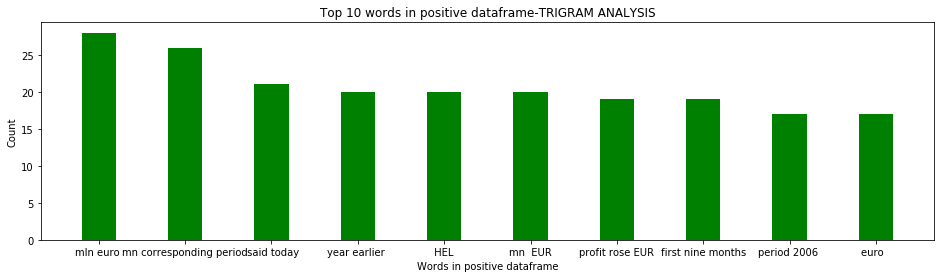

In [86]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1tri,pd2tri, color ='green',
        width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-TRIGRAM ANALYSIS")
plt.savefig("positive-trigram.png")
plt.show()

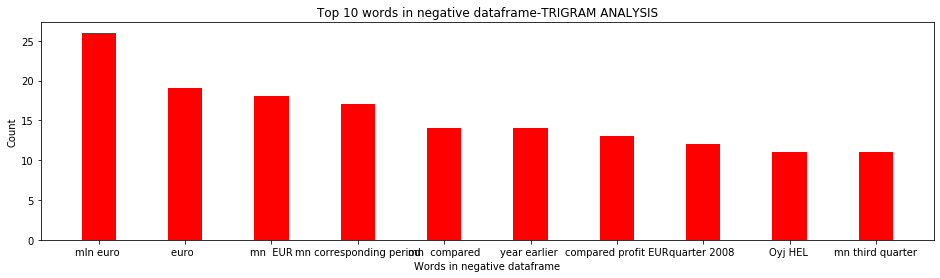

In [87]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1tri,ned2tri, color ='red',
        width = 0.4) 
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-TRIGRAM ANALYSIS")
plt.savefig("negative-trigram.png")
plt.show()

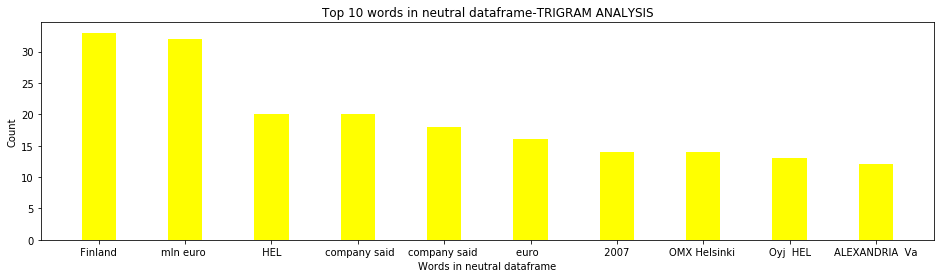

In [88]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1tri,nud2tri, color ='yellow',
        width = 0.4) 
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-TRIGRAM ANALYSIS")
plt.savefig("neutral-trigram.png")
plt.show()